In [1]:
#Import all the libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from functools import reduce
import math
import urllib
import difflib 
import seaborn as sns
import sklearn.model_selection
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import cross_val_score

# Step One
First we will need to understand the structure of the data. The data is sorted into two shees, successful and unsuccessful companies. Each excel sheet is then sorted into 4 different books. Now there is a discrepancy between the names on each list, we will need to look for matching pairs and collate them.

In [2]:
xls_Successful_Companies= pd.ExcelFile('Data\Moneyball, Successful Companies (Internship data).xlsx')
xls_Successful_Companies_Sheet_Names = xls_Successful_Companies.sheet_names
print(xls_Successful_Companies_Sheet_Names)


#xls_Unsuccessful_Companies= pd.ExcelFile('Data\Moneyball, Unsuccessful Companies (Intership data).xlsx')
xls_Unsuccessful_Companies= pd.ExcelFile('Data\[Enriched] Moneyball, Unsuccessful Companies (Intership data).xlsx')
xls_Unsuccessful_Companies_Sheet_Names = xls_Successful_Companies.sheet_names
print(xls_Unsuccessful_Companies_Sheet_Names)

['List', 'Academic', 'Work', 'Investor', 'Description']
['List', 'Academic', 'Work', 'Investor', 'Description']


In [3]:
#Importing all of the excel sheets and removing the last 2 rows that have unnecessary information
df_SuccessfulCompanies = [pd.read_excel (r'Data\Moneyball, Successful Companies (Internship data).xlsx',
                                         sheet_name= sheetname) for sheetname in xls_Successful_Companies_Sheet_Names]
df_SuccessfulCompanies[1].drop(index = [503, 504], inplace=True)
df_SuccessfulCompanies[2].drop(index = [573, 574], inplace=True)
df_SuccessfulCompanies[3].drop(index = [522, 523], inplace=True)

#Importing all of the excel sheets and removing the last 2 rows that have unnecessary information
df_UnsuccessfulCompanies = [pd.read_excel (r'Data\[Enriched] Moneyball, Unsuccessful Companies (Intership data).xlsx',
                                         sheet_name= sheetname) for sheetname in xls_Unsuccessful_Companies_Sheet_Names]
print(df_UnsuccessfulCompanies[0])

                       name  founded_year country_code            city  \
0                 BitMethod          2009          USA      Des Moines   
1             Eliason Media          2009          USA      Des Moines   
2                    Jounce          2009          USA  Salt Lake City   
3      Convo Communications          2009          USA          Austin   
4            MyMedLeads.com          2009          USA          Austin   
...                     ...           ...          ...             ...   
42967               Citibot          2016          USA      Charleston   
42968           Permits.com          2016          USA    Myrtle Beach   
42969              Preclose          2016          USA      Charleston   
42970            TerrorMate          2016          USA          Easley   
42971            Live Chair          2016          USA      Washington   

                                           category_list  \
0                                     Android,iOS,M

In [4]:
#The difference between different sheets
df_SuccessfulCompanies_Company_Names = [set(df_SuccessfulCompanies[i]['name'].tolist()) 
                                        for i in range(len(df_SuccessfulCompanies))]
print(len(df_SuccessfulCompanies_Company_Names[1] - df_SuccessfulCompanies_Company_Names[0]))
print(len(df_SuccessfulCompanies_Company_Names[2] - df_SuccessfulCompanies_Company_Names[0]))
print(len(df_SuccessfulCompanies_Company_Names[3] - df_SuccessfulCompanies_Company_Names[0]))
print(len(df_SuccessfulCompanies_Company_Names[0] - df_SuccessfulCompanies_Company_Names[1]))
print(len(df_SuccessfulCompanies_Company_Names[0] - df_SuccessfulCompanies_Company_Names[2]))
print(len(df_SuccessfulCompanies_Company_Names[0] - df_SuccessfulCompanies_Company_Names[3]))

df_UnsuccessfulCompanies_Company_Names = [set(df_UnsuccessfulCompanies[i]['name'].tolist()) 
                                        for i in range(len(df_UnsuccessfulCompanies))]
print(len(df_UnsuccessfulCompanies_Company_Names[1] - df_UnsuccessfulCompanies_Company_Names[0]))
print(len(df_UnsuccessfulCompanies_Company_Names[2] - df_UnsuccessfulCompanies_Company_Names[0]))
print(len(df_UnsuccessfulCompanies_Company_Names[3] - df_UnsuccessfulCompanies_Company_Names[0]))
print(len(df_UnsuccessfulCompanies_Company_Names[0] - df_UnsuccessfulCompanies_Company_Names[1]))
print(len(df_UnsuccessfulCompanies_Company_Names[0] - df_UnsuccessfulCompanies_Company_Names[2]))
print(len(df_UnsuccessfulCompanies_Company_Names[0] - df_UnsuccessfulCompanies_Company_Names[3]))

17
24
13
134
71
111
0
0
0
33076
23298
35292


In [5]:
#Merging all of the data into one dataframe
df_SuccessfulCompanies_merged = reduce(lambda  left,right: pd.merge(left,right,on=['name'],how='outer'),
                                       df_SuccessfulCompanies)
df_SuccessfulCompanies_merged['success_flag']  = 1
#Merging all of the data into one dataframe
df_UnsuccessfulCompanies_merged = reduce(lambda  left,right: pd.merge(left,right,on=['name'],how='outer'),
                                       df_UnsuccessfulCompanies)
df_UnsuccessfulCompanies_merged['success_flag']  = 0

In [6]:
df_All_Companies_merged = pd.concat([df_SuccessfulCompanies_merged, df_UnsuccessfulCompanies_merged], ignore_index=True, sort=False)
df_All_Companies_merged

,name,founded_year,country_code,city,category_list,category_groups_list,universities_of_founders,degrees_of_founders,subject_degrees_of_founders,gender_of_founders,city_of_founders,prev_companies_of_founders,prev_title_of_founders,investor_name,short_description,description,success_flag
0,AEDAN Financial Corp,2014.0,USA,San Francisco,"Cloud Management,Information Technology,Networ...","Information Technology,Internet Services,Priva...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Financial Technology Investment Institution,Aedan Financial Corp is the world’s first Cryp...,1
1,Uber,2009.0,USA,San Francisco,"Mobile Apps,Public Transportation,Ride Sharing...","Apps,Mobile,Software,Transportation","Télécom ParisTech,University of Calgary,Univer...","BS,BSc,M.Sc.,MS,MS,Ph.D","Computer Engineering, Business Economics,Elect...","male,male,male,male,male,male","New York,New York,New York,San Francisco,San F...","10100 fund,Aira,Akamai Technologies,Behance,Ca...","Advisor,Advisor,Board Advisor,Board Member,Boa...","A-Grade Investments,AFSquare,Adam Leber,Alfred...","Uber develops, markets, and operates a ride-sh...","Uber develops, markets, and operates a ridesha...",1
2,Life360,2008.0,USA,San Francisco,"Android,Apps,Family,Mobile,Mobile Apps","Apps,Mobile,Platforms,Software","University of California, Berkeley",BS,unknown,male,Berkeley,"Life360,Life360,Life360,Life360,mymoneykarma","Board Member,Board Member,Co-CTO & Co-Founder,...","500 Startups,Band of Angels,Bessemer Venture P...",Life360 creates a mobile app for families that...,Life360 is a platform for today’s busy familie...,1
3,QTS Realty Trust,2005.0,USA,Overland Park,"Cloud Computing,Cloud Infrastructure,Web Hosting","Hardware,Internet Services,Software",NaN,NaN,NaN,NaN,NaN,QTS Realty Trust,Founder,NaN,QTS Realty Trust is a technology infrastructur...,QTS Realty Trust operates as a technology inf...,1
4,SailPoint Technologies,2005.0,USA,Austin,"Enterprise Software,Identity Management,Risk M...","Information Technology,Privacy and Security,So...","Point Loma Nazarene University,Susquehanna Uni...","BA,BS,MBA,unknown","Computer Science,Economics,unknown,unknown","male,male,male,male","Austin,Austin,Austin,Austin","Conformity,SailPoint Technologies,SailPoint Te...","Advisor,Director, Product marketing,Founder & ...","Austin Ventures,Lightspeed Venture Partners,Or...",NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43986,Citibot,2016.0,USA,Charleston,"GovTech,Information Technology,Software","Government and Military,Information Technology...",NaN,NaN,NaN,NaN,NaN,Citibot,Founder and CEO,CivStart,Citibot builds trust between governments and r...,Citibot provides tools for citizens and their ...,0
43987,Permits.com,2016.0,USA,Myrtle Beach,"Compliance,Construction,Enterprise Software,Go...","Government and Military,Information Technology...","Coastal Carolina University,East Carolina Univ...",BFA,"Accounting and Finance,Interior Design","female,male",NaN,"DigitalOcean,Permits.com,Permits.com,Permits.c...","Co-Founder,Co-Founder,Co-founder,Developer,Ope...",NaN,NaN,NaN,0
43988,Preclose,2016.0,USA,Charleston,"Apps,Real Estate,Service Industry","Apps,Other,Real Estate,Software",NaN,NaN,NaN,NaN,NaN,Preclose,Founder and CEO,NaN,Preclose is a modern closing experience for ev...,"Preclose is that crazy, chaotic period during ...",0
43989,TerrorMate,2016.0,USA,Easley,"Information Technology,iOS,Location Based Serv...","Data and Analytics,Information Technology,Inte...","American Military University,American Military...","BS,BS,Under Graduate","Counterintelligence,Intelligence/Counter-Intel...","male,male,male,male","Los Angeles,Los Angeles,Los Angeles,Los Angeles","Club Feast,StackCommerce,TerrorMate,TerrorMate","Co-Founder,Co-Founder,Vice President Of Busine...",NaN,World's First Terror Alert app,TerrorMate is the world's first terror alert a...,0


In [7]:
df_company_names_and_vectors = pd.read_excel (r"Data\company_names_and_vectors.xlsx")
df_All_Companies_merged = df_All_Companies_merged.merge(df_company_names_and_vectors,on=['name'],how='outer')

In [8]:
#Importing importing university ranking data
df_Stock_Market = pd.read_csv(r'Data\nasdaq_screener _data.csv')
#df_Stock_Market.drop(index = [0], inplace=True)
df_Stock_Market

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,A,Agilent Technologies Inc. Common Stock,$156.26,1.65,1.067%,4.730344e+10,United States,1999.0,1463448,Capital Goods,Electrical Products
1,AA,Alcoa Corporation Common Stock,$48.80,-1.18,-2.361%,9.130634e+09,NaN,2016.0,5524945,Basic Industries,Metal Fabrications
2,AAC,Ares Acquisition Corporation Class A Ordinary ...,$9.79,0.01,0.102%,1.223750e+09,NaN,2021.0,10091,Finance,Business Services
3,AACG,ATA Creativity Global American Depositary Shares,$1.57,0.00,0.00%,4.926176e+07,China,NaN,10430,Miscellaneous,Service to the Health Industry
4,AACI,Armada Acquisition Corp. I Common Stock,$9.76,0.00,0.00%,2.021247e+08,United States,2021.0,29211,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8242,ZWS,Zurn Water Solutions Corporation Common Stock,$37.47,0.53,1.435%,4.546966e+09,United States,2012.0,517233,Public Utilities,Water Supply
8243,ZY,Zymergen Inc. Common Stock,$8.15,-0.18,-2.161%,8.345665e+08,United States,2021.0,850637,Basic Industries,Industrial Specialties
8244,ZYME,Zymeworks Inc. Common Shares,$16.07,-0.05,-0.31%,7.481222e+08,Canada,2017.0,1499555,NaN,NaN
8245,ZYNE,Zynerba Pharmaceuticals Inc. Common Stock,$3.32,-0.13,-3.768%,1.368422e+08,United States,2015.0,462809,Health Care,Biotechnology: Pharmaceutical Preparations


In [9]:
list_of_allpublically_listed_companies = [x.upper() for x in list(set(df_Stock_Market['Name'].values[:].tolist()))]
list_of_allpublically_listed_companies

['ZIONS BANCORPORATION N.A. COMMON STOCK',
 'ELBIT SYSTEMS LTD. ORDINARY SHARES',
 'COMPANHIA DE SANEAMENTO BASICO DO ESTADO DE SAO PAULO - SABESP AMERICAN DEPOSITARY SHARES (EACH REPSTG 250 COMMON SHARES)',
 'FORTIVE CORPORATION COMMON STOCK ',
 'STEALTH BIOTHERAPEUTICS CORP. ADS',
 'NEW ENGLAND REALTY ASSOCIATES LIMITED PARTNERSHIP CLASS A DEPOSITARY RECEIPTS EVIDENCING UNITS OF LIMITED PARTNERSHIP',
 'STRYVE FOODS INC. WARRANT',
 'CIT GROUP INC (DEL) COMMON STOCK',
 'HECLA MINING COMPANY PREFERRED STOCK',
 'ELDORADO GOLD CORPORATION ORDINARY SHARES',
 'NOVUS CAPITAL CORPORATION II CLASS A COMMON STOCK',
 '3M COMPANY COMMON STOCK',
 'NUCANA PLC AMERICAN DEPOSITARY SHARE',
 'KOPIN CORPORATION COMMON STOCK',
 'STATE STREET CORPORATION DEPOSITARY SHARES EACH REPRESENTING A 1/4000TH OWNERSHIP INTEREST IN A SHARE OF FIXED-TO-FLOATING RATE NON-CUMULATIVE',
 'HERSHA HOSPITALITY TRUST CLASS A COMMON SHARES OF BENEFICIAL INTEREST',
 'ELI LILLY AND COMPANY COMMON STOCK',
 'AARONS HOLDINGS COMP

In [10]:
#List of all investor names
temp = df_All_Companies_merged['investor_name'].values[:].tolist()
list_all_investor_names_unfiltered = [x.split(',') for x in temp if isinstance(x, str)]
list_all_investor_names_unfiltered = reduce(lambda x,y :x+y ,list_all_investor_names_unfiltered)
list_all_investor_names = list(set(list_all_investor_names_unfiltered))
#print(list_all_investor_names)

In [11]:
list_all_investor_names_and_count = [[0,x] for x in list_all_investor_names]
for x in list_all_investor_names_unfiltered:
    idx = list_all_investor_names.index(x)
    list_all_investor_names_and_count[idx][0] += 1

list_all_investor_names_and_count.sort(reverse=True)
list_all_investor_names_and_count

[[1177, 'Y Combinator'],
 [631, 'First Round Capital'],
 [572, 'Techstars'],
 [570, 'Betaworks'],
 [523, 'Halogen Ventures'],
 [505, '500 Startups'],
 [416, 'Lerer Hippeau'],
 [392, 'Precursor Ventures'],
 [336, 'Tuesday Capital'],
 [326, 'SV Angel'],
 [298, 'Harrison Metal'],
 [294, 'Brainchild Holdings'],
 [290, 'Newark Venture Partners'],
 [272, 'RiverPark Ventures'],
 [263, 'NewDo Venture'],
 [260, 'Day One Ventures'],
 [260, 'BBG Ventures'],
 [259, 'Basis Set Ventures'],
 [257, 'January Ventures'],
 [257, 'Dream Maker Ventures (DMV)'],
 [256, 'Vivek Kumar'],
 [256, 'Sebastian Gil'],
 [256, 'New Voices Fund'],
 [256, 'Gina Bianchini'],
 [256, 'Cypher Capital'],
 [256, 'Alpha Bridge Ventures'],
 [217, 'Right Side Capital Management'],
 [214, 'Dreamit Ventures'],
 [165, 'Social Starts'],
 [164, 'Plug and Play Tech Center'],
 [164, 'Andreessen Horowitz'],
 [163, 'Alchemist Accelerator'],
 [156, 'GV'],
 [145, 'Innovation Works'],
 [138, 'Slow Ventures'],
 [133, 'Kima Ventures'],
 [125,

In [12]:
#List of all universities names
temp = df_All_Companies_merged['universities_of_founders'].values[:].tolist()
list_all_universities_of_founders = [x.split(',') for x in temp if isinstance(x, str)]
list_all_universities_of_founders = reduce(lambda x,y :x+y ,list_all_universities_of_founders)
list_all_universities_of_founders = list(set(list_all_universities_of_founders))

In [13]:
#List of all degrees names
temp = df_All_Companies_merged['degrees_of_founders'].values[:].tolist()
list_all_degrees_of_founders = [x.split(',') for x in temp if isinstance(x, str)]
list_all_degrees_of_founders = reduce(lambda x,y :x+y ,list_all_degrees_of_founders)
list_all_degrees_of_founders = list(set(list_all_degrees_of_founders))
#df_all_degrees_of_founders = pd.DataFrame(list_all_degrees_of_founders, columns =['degrees'])
#writer = pd.ExcelWriter("Data\degrees of founders (unedited).xlsx", engine='xlsxwriter')
#df_all_degrees_of_founders.to_excel(writer,sheet_name = 'degrees', index=False)
#writer.save() 

In [14]:
#List of all subject degrees names
temp = df_All_Companies_merged['subject_degrees_of_founders'].values[:].tolist()
list_all_subject_degrees_of_founders = [x.split(',') for x in temp if isinstance(x, str)]
list_all_subject_degrees_of_founders = reduce(lambda x,y :x+y ,list_all_subject_degrees_of_founders)
list_all_subject_degrees_of_founders = list(set(list_all_subject_degrees_of_founders))
#print(list_all_subject_degrees_of_founders)

In [15]:
#List of all previous titles of founders
temp = df_All_Companies_merged['prev_title_of_founders'].values[:].tolist()
list_all_prev_title_of_founders = [x.split(',') for x in temp if isinstance(x, str)]
list_all_prev_title_of_founders = reduce(lambda x,y :x+y ,list_all_prev_title_of_founders)
list_all_prev_title_of_founders = list(set(list_all_prev_title_of_founders))
#print(len(list_all_prev_title_of_founders))

In [16]:
#List of all categories
temp = df_All_Companies_merged['category_list'].values[:].tolist()
list_all_categories_unfiltered = [x.split(',') for x in temp if isinstance(x, str)]
list_all_categories_unfiltered = reduce(lambda x,y :x+y ,list_all_categories_unfiltered)
list_all_categories = list(set(list_all_categories_unfiltered))
list_all_categories_and_count = [[0,x] for x in list_all_categories]

In [17]:
for x in list_all_categories_unfiltered:
    idx = list_all_categories.index(x)
    list_all_categories_and_count[idx][0] += 1

list_all_categories_and_count.sort(reverse=True)
list_all_categories_and_count

[[24635, 'Software'],
 [10279, 'Information Technology'],
 [6018, 'Apps'],
 [5077, 'Mobile'],
 [4450, 'SaaS'],
 [4141, 'Internet'],
 [4113, 'Mobile Apps'],
 [3409, 'Web Development'],
 [3384, 'Enterprise Software'],
 [2796, 'Consulting'],
 [2782, 'Analytics'],
 [2757, 'E-Commerce'],
 [2736, 'iOS'],
 [2704, 'Artificial Intelligence'],
 [2526, 'Advertising'],
 [2298, 'Education'],
 [2250, 'Health Care'],
 [2026, 'Web Design'],
 [2000, 'Social Media'],
 [1942, 'Machine Learning'],
 [1758, 'Cloud Computing'],
 [1708, 'Marketing'],
 [1598, 'Computer'],
 [1551, 'Big Data'],
 [1482, 'CRM'],
 [1235, 'Robotics'],
 [1235, 'Financial Services'],
 [1212, 'Android'],
 [1129, 'Hardware'],
 [1126, 'Internet of Things'],
 [1112, 'Information Services'],
 [976, 'E-Learning'],
 [959, 'Video'],
 [937, 'Digital Marketing'],
 [935, 'EdTech'],
 [934, 'FinTech'],
 [855, 'SEO'],
 [782, 'Cyber Security'],
 [774, 'Messaging'],
 [766, 'Human Resources'],
 [762, 'Security'],
 [752, 'Virtual Reality'],
 [699, 'Bus

In [18]:
#List of all category groups
temp = df_All_Companies_merged['category_groups_list'].values[:].tolist()
list_all_category_groups_unfiltered = [x.split(',') for x in temp if isinstance(x, str)]
list_all_category_groups_unfiltered = reduce(lambda x,y :x+y ,list_all_category_groups_unfiltered)
list_all_category_groups = list(set(list_all_category_groups_unfiltered))
print(list_all_category_groups)

['Sports', 'Media and Entertainment', 'Video', 'Sales and Marketing', 'Professional Services', 'Artificial Intelligence', 'Gaming', 'Travel and Tourism', 'Apps', 'Food and Beverage', 'Hardware', 'Messaging and Telecommunications', 'Real Estate', 'Consumer Goods', 'Platforms', 'Science and Engineering', 'Advertising', 'Biotechnology', 'Payments', 'Government and Military', 'Sustainability', 'Mobile', 'Clothing and Apparel', 'Commerce and Shopping', 'Agriculture and Farming', 'Navigation and Mapping', 'Data and Analytics', 'Events', 'Internet Services', 'Community and Lifestyle', 'Transportation', 'Natural Resources', 'Energy', 'Administrative Services', 'Information Technology', 'Music and Audio', 'Consumer Electronics', 'Content and Publishing', 'Privacy and Security', 'Financial Services', 'Software', 'Design', 'Health Care', 'Education', 'Lending and Investments', 'Manufacturing', 'Other']


In [19]:
list_all_category_groups_and_count = [[0,x] for x in list_all_category_groups]
for x in list_all_category_groups_unfiltered:
    idx = list_all_category_groups.index(x)
    list_all_category_groups_and_count[idx][0] += 1

list_all_category_groups_and_count.sort(reverse=True)
list_all_category_groups_and_count

[[46208, 'Software'],
 [15324, 'Information Technology'],
 [12328, 'Internet Services'],
 [10138, 'Mobile'],
 [9876, 'Apps'],
 [8387, 'Data and Analytics'],
 [7760, 'Hardware'],
 [7025, 'Sales and Marketing'],
 [6291, 'Media and Entertainment'],
 [5487, 'Professional Services'],
 [5169, 'Other'],
 [4972, 'Science and Engineering'],
 [4028, 'Commerce and Shopping'],
 [3858, 'Design'],
 [3793, 'Financial Services'],
 [3789, 'Artificial Intelligence'],
 [3311, 'Education'],
 [3099, 'Platforms'],
 [3011, 'Health Care'],
 [2913, 'Consumer Electronics'],
 [2802, 'Advertising'],
 [1944, 'Privacy and Security'],
 [1920, 'Content and Publishing'],
 [1776, 'Administrative Services'],
 [1692, 'Community and Lifestyle'],
 [1595, 'Payments'],
 [1492, 'Transportation'],
 [1403, 'Messaging and Telecommunications'],
 [1379, 'Video'],
 [1292, 'Real Estate'],
 [1062, 'Sports'],
 [1029, 'Gaming'],
 [869, 'Manufacturing'],
 [796, 'Navigation and Mapping'],
 [765, 'Lending and Investments'],
 [737, 'Food a

In [20]:
#List of previous companies of founders
temp = df_All_Companies_merged['prev_companies_of_founders'].values[:].tolist()
list_all_prev_companies_of_founders_unfiltered = [x.split(',') for x in temp if isinstance(x, str)]
list_all_prev_companies_of_founders_unfiltered = reduce(lambda x,y :x+y ,list_all_prev_companies_of_founders_unfiltered)
list_all_prev_companies_of_founders = list(set(list_all_prev_companies_of_founders_unfiltered))
print(list_all_prev_companies_of_founders)

['', 'JazzHR', 'iDebate.it', 'QUT Bluebox', 'Jaypore', 'Allinio', 'Genius Blends', 'Inworld AI', 'Voteraide', 'CharacterIQ', 'Metricom', 'Legent Corporation', 'Perceptiv Labs', 'Yazamiyot', 'CoolGraphicStuff.com', 'Blockchain.io', 'MyAlerts', 'Wired Magazine', 'Vee', 'Clear Choice Prep', 'ICED(AI)', 'PurpleCloud Technologies', 'Classform', 'Digital Evolution', 'SLS Insights', 'AccuChain Inc.', 'AKoin', 'Backstage', 'PortAuthority Technologies', 'Augmate', 'Altshuler Shaham', 'LiveVox', 'Rekindle', 'TSD Global', 'Algoryx', 'Rebuy Engine', 'Dynamic Ideas', 'GroupAhead', 'Nucleus Security', 'Leanplum', 'Ralli', 'Data & Society Research Institute', 'Agronomic Technology', 'BMWBLOG', 'Camilla Olson LLC', 'mTelligence.co', 'Embodied Labs', 'Bright Mango', 'MightyTV', 'Leesfer', 'Resoomay', 'Technicolor Ventures', 'Forbes San Francisco Business Council', 'Ansa', 'LoHi Labs', 'BitInstant', 'Skydera', 'Defined Clarity', 'Integrum Technologies', 'Torch 3D', 'Holy Seed Beverage Co.', 'RediMinds',

In [21]:
list_all_prev_companies_of_founders_and_count = [[0,x] for x in list_all_prev_companies_of_founders]
for x in list_all_prev_companies_of_founders_unfiltered:
    idx = list_all_prev_companies_of_founders.index(x)
    list_all_prev_companies_of_founders_and_count[idx][0] += 1

list_all_prev_companies_of_founders_and_count.sort(reverse=True)
list_all_prev_companies_of_founders_and_count

[[2561, 'Squad'],
 [1502, ' Inc.'],
 [1062, 'AT&T'],
 [1045, 'Google'],
 [1025, 'Cardinal Health'],
 [648, 'Knack'],
 [513, 'Symphony Technology Group'],
 [513, 'RDX'],
 [513, 'Peoplefluent'],
 [513, 'Bregal Investments'],
 [512, 'TradeGlobal'],
 [512, 'Firm58'],
 [512, 'Findly'],
 [512, 'Bregal Sagemount'],
 [459, 'Microsoft'],
 [407, 'Baton'],
 [362, 'Apple'],
 [357, ' LLC'],
 [349, 'Uber'],
 [324, 'Spotlight'],
 [324, 'Cape'],
 [269, 'Yext'],
 [262, 'OAuth'],
 [262, 'Flexport'],
 [261, 'Handshake'],
 [260, 'Tattle'],
 [260, 'Sama'],
 [260, 'OpenID Foundation'],
 [259, 'Flock'],
 [259, 'Constant Contact'],
 [258, 'Techstars'],
 [258, 'Simplifeye'],
 [258, 'Secret'],
 [258, 'Next Glass'],
 [258, 'Electric'],
 [257, 'VIVE Style'],
 [257, 'SinglePlatform'],
 [257, 'Open Web Foundation'],
 [257, 'CareGuardian'],
 [256, 'Zoomer'],
 [256, 'Vidoop'],
 [256, 'Seated'],
 [256, 'Sawyer'],
 [256, 'Rockpaper'],
 [256, 'PhoneWagon'],
 [256, 'OpenReel'],
 [256, 'Negotiatus'],
 [256, 'MealPal'],
 [

In [22]:
#Importing importing university ranking data
df_University_Rankings = pd.read_excel(r'Data\2022_QS_World_University_Rankings_Results_public_version_modified.xlsx')
#df_University_Rankings.drop(index = [0], inplace=True)
df_University_Rankings

,RANK_2022,Institution_Name,CODE,COUNTRY / TERRITORY,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,Overall
0,1,Massachusetts Institute of Technology (MIT),US,United States,100.0,100.0,100.0,100.0,100.0,91.4,100.0
1,2,University of Oxford,UK,United Kingdom,100.0,100.0,100.0,96.0,99.5,98.5,99.5
2,3,Stanford University,US,United States,100.0,100.0,100.0,99.9,99.8,67.0,98.7
3,4,University of Cambridge,UK,United Kingdom,100.0,100.0,100.0,92.1,100.0,97.7,98.7
4,5,Harvard University,US,United States,100.0,100.0,99.1,100.0,84.2,70.1,98.0
...,...,...,...,...,...,...,...,...,...,...,...
1295,1296,University POLITEHNICA of Bucharest,RO,Romania,6.4,5.6,4.8,7.0,1.1,3.2,20.0
1296,1297,"University Politehnica of Timisoara, UPT",RO,Romania,3.3,2.9,10.6,3.9,1.0,2.1,20.0
1297,1298,Yarmouk University,JO,Jordan,9.3,10.2,1.9,2.2,1.2,11.0,20.0
1298,1299,Yildiz Technical University,TR,Turkey,5.6,10.5,6.1,5.4,1.1,8.9,20.0


##  Data Aggregations
We will want to count
1. The nummber of total founders
2. The number of male founders
3. The number of female founders
4. The percentage of male founders
5. The number of investors
6. The success rate of investors
7. TBC....


In [92]:
#Gender Aggregation
temp = df_All_Companies_merged['gender_of_founders'].values[:].tolist()
print(type(temp[0]))
df_All_Companies_merged['number_of_founders'] = float('nan')
df_All_Companies_merged.at[idx, 'number_of_male_founders'] = float('nan')
df_All_Companies_merged.at[idx, 'number_of_female_founders'] = float('nan')
df_All_Companies_merged.at[idx, 'percentage_of_male_founders'] = float('nan')

for idx in range(len(temp)):
    if not isinstance(temp[idx], str):
        if math.isnan(temp[idx]):
            continue
    temp2 = temp[idx].count(',') + 1
    df_All_Companies_merged.at[idx, 'number_of_founders'] = temp2
    df_All_Companies_merged.at[idx, 'number_of_male_founders'] = temp2 - temp[idx].count('female')
    df_All_Companies_merged.at[idx, 'number_of_female_founders'] = temp[idx].count('female')
    df_All_Companies_merged.at[idx, 'percentage_of_male_founders'] = (temp2 - temp[idx].count('female')) / (temp[idx].count(',') + 1)

df_All_Companies_merged[['gender_of_founders','number_of_founders', 'number_of_male_founders','number_of_female_founders', 'percentage_of_male_founders']]

In [24]:
#Investor Aggregation
temp = df_All_Companies_merged['investor_name'].values[:].tolist()
print(type(temp[0]))
df_All_Companies_merged['number_of_investors'] = float('nan')

for idx in range(len(temp)):
    if not isinstance(temp[idx], str):
        if math.isnan(temp[idx]):
            continue
    temp2 = temp[idx].count(',') + 1
    df_All_Companies_merged.at[idx, 'number_of_investors'] = temp[idx].count(',') + 1

df_All_Companies_merged[['investor_name','number_of_investors']]

<class 'float'>


,investor_name,number_of_investors
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,"A-Grade Investments,AFSquare,Adam Leber,Alfred...",39.0
...,...,...
46342,CivStart,1.0
46343,NaN,NaN
46344,NaN,NaN
46345,NaN,NaN


In [25]:
#Investor Success Metric
list_all_investor_names_and_successes = [[x,0,0,0] for x in list_all_investor_names]
temp = df_All_Companies_merged['investor_name'].values[:].tolist()
df_All_Companies_merged['average_investor_success'] = float('nan')

for idx in range(len(temp)):
    if not isinstance(temp[idx], str): continue
    temp2 = temp[idx].split(',')
    for x in temp2:
        idx2 = list_all_investor_names.index(x)
        if df_All_Companies_merged.at[idx, 'success_flag'] == 1: list_all_investor_names_and_successes[idx2][1] += 1
        if df_All_Companies_merged.at[idx, 'success_flag'] == 0: list_all_investor_names_and_successes[idx2][2] += 1

for x in list_all_investor_names_and_successes: x[3] = x[1] / (x[1] + x[2])

for idx in range(len(temp)):
    if not isinstance(temp[idx], str): continue
    temp2 = temp[idx].split(',')
    count = len(temp2)
    running_sum = 0
    for x in temp2:
        idx2 = list_all_investor_names.index(x)
        running_sum += list_all_investor_names_and_successes[idx2][3]
    df_All_Companies_merged.at[idx, 'average_investor_success'] = running_sum / count
    
df_All_Companies_merged[['investor_name','average_investor_success']]

,investor_name,average_investor_success
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,"A-Grade Investments,AFSquare,Adam Leber,Alfred...",0.422099
...,...,...
46342,CivStart,0.000000
46343,NaN,NaN
46344,NaN,NaN
46345,NaN,NaN


<AxesSubplot:xlabel='success_flag', ylabel='average_investor_success'>

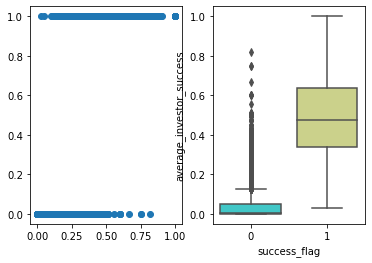

In [26]:
var1 = df_All_Companies_merged['average_investor_success'][(np.isnan(df_All_Companies_merged['average_investor_success']) == False)] 
var2 = df_All_Companies_merged['success_flag'][(np.isnan(df_All_Companies_merged['average_investor_success']) == False)] 
var1.corr(var2)

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.scatter(var1, var2, marker='o')
sns.boxplot(x='success_flag',y='average_investor_success',data=df_All_Companies_merged, palette='rainbow')

<AxesSubplot:xlabel='success_flag', ylabel='percentage_of_male_founders'>

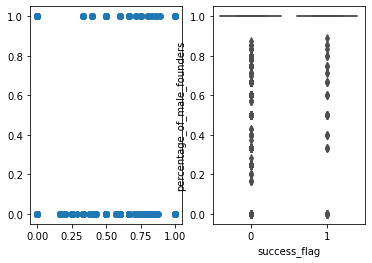

In [27]:
var1 = df_All_Companies_merged['percentage_of_male_founders'][(np.isnan(df_All_Companies_merged['percentage_of_male_founders']) == False)] 
var2 = df_All_Companies_merged['success_flag'][(np.isnan(df_All_Companies_merged['percentage_of_male_founders']) == False)] 
var1.corr(var2)

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.scatter(var1, var2, marker='o')
sns.boxplot(x='success_flag',y='percentage_of_male_founders',data=df_All_Companies_merged, palette='rainbow')

<AxesSubplot:xlabel='success_flag', ylabel='number_of_founders'>

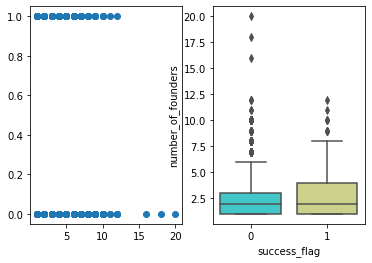

In [28]:
var1 = df_All_Companies_merged['number_of_founders'][(np.isnan(df_All_Companies_merged['number_of_founders']) == False)] 
var2 = df_All_Companies_merged['success_flag'][(np.isnan(df_All_Companies_merged['number_of_founders']) == False)] 
var1.corr(var2)
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.scatter(var1, var2, marker='o');
sns.boxplot(x='success_flag',y='number_of_founders',data=df_All_Companies_merged, palette='rainbow')

<AxesSubplot:xlabel='success_flag', ylabel='number_of_investors'>

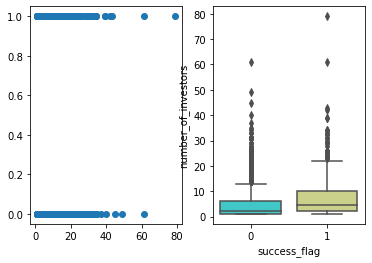

In [29]:
var1 = df_All_Companies_merged['number_of_investors'][(np.isnan(df_All_Companies_merged['number_of_investors']) == False)] 
var2 = df_All_Companies_merged['success_flag'][(np.isnan(df_All_Companies_merged['number_of_investors']) == False)] 
var1.corr(var2)
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.scatter(var1, var2, marker='o');
sns.boxplot(x='success_flag',y='number_of_investors',data=df_All_Companies_merged, palette='rainbow')

In [30]:
default_value = -1
minumum_overall_score = 20
minumum_rank = 1300
list_all_universities_of_founders_rankings = [[x, default_value,default_value] for x in list_all_universities_of_founders]

#Most Accurate Matching
for idx1 in range(len(list_all_universities_of_founders)):
    for idx2 in range(len(df_University_Rankings['Institution_Name'].values[:])):
        if list_all_universities_of_founders[idx1] in df_University_Rankings['Institution_Name'].values[idx2]:
            list_all_universities_of_founders_rankings[idx1][1] = df_University_Rankings.at[idx2, 'RANK_2022']
            list_all_universities_of_founders_rankings[idx1][2] = df_University_Rankings.at[idx2, 'Overall']
         

removal_strings = ['','university', 'University', 'university of', 'University of', 'University Of']

for name in removal_strings:
    for idx1 in range(len(df_University_Rankings['Institution_Name'].values[:])):
        for idx2 in range(len(list_all_universities_of_founders)):        
            if df_University_Rankings['Institution_Name'].values[idx1].replace(name,'').strip() in list_all_universities_of_founders[idx2] and list_all_universities_of_founders_rankings[idx2][1] != default_value:
                list_all_universities_of_founders_rankings[idx2][1] = df_University_Rankings.at[idx1, 'RANK_2022']
                list_all_universities_of_founders_rankings[idx2][2] = df_University_Rankings.at[idx1, 'Overall']

for idx1 in range(len(list_all_universities_of_founders)):
    temp = difflib.get_close_matches(list_all_universities_of_founders[idx1],df_University_Rankings['Institution_Name'].values[:])
    if temp and list_all_universities_of_founders_rankings[idx2][1] != default_value:
        list_all_universities_of_founders_rankings[idx1][1] = df_University_Rankings.loc[df_University_Rankings['Institution_Name'] == temp[0], 'RANK_2022'].values[0]
        list_all_universities_of_founders_rankings[idx1][2] = df_University_Rankings.loc[df_University_Rankings['Institution_Name'] == temp[0], 'Overall'].values[0]

for name in removal_strings:
    for idx1 in range(len(df_University_Rankings['Institution_Name'].values[:])):
        temp = difflib.get_close_matches(df_University_Rankings['Institution_Name'].values[idx1].replace(name,'').strip(),list_all_universities_of_founders)
        for elem in temp: 
            idx2 = list_all_universities_of_founders.index(elem)
            if list_all_universities_of_founders_rankings[idx2][1] != default_value:
                list_all_universities_of_founders_rankings[idx1][1] = df_University_Rankings.at[idx1, 'RANK_2022']
                list_all_universities_of_founders_rankings[idx1][2] = df_University_Rankings.at[idx1, 'Overall']

for x in list_all_universities_of_founders_rankings:
    if x[1] == -1: 
        x[1] = minumum_rank
        x[2] = minumum_overall_score

In [31]:
#Average University Ranking and Score

temp = df_All_Companies_merged['universities_of_founders'].values[:]

df_All_Companies_merged['universities_of_founders_rankings'] = float('nan')
df_All_Companies_merged['universities_of_founders_rankings']  = df_All_Companies_merged['universities_of_founders_rankings'] .astype(object)
df_All_Companies_merged['best_ranking_universities_of_founders'] = float('nan')
df_All_Companies_merged['worse_ranking_university_of_founders'] = float('nan')
df_All_Companies_merged['average_ranking_university_of_founders'] = float('nan')
df_All_Companies_merged['percentage_of_founders_attended_university'] = float('nan')

df_All_Companies_merged['universities_of_founders_scores'] = float('nan')
df_All_Companies_merged['universities_of_founders_scores']  = df_All_Companies_merged['universities_of_founders_scores'] .astype(object)

df_All_Companies_merged['best_score_universities_of_founders'] = float('nan')
df_All_Companies_merged['worse_score_university_of_founders'] = float('nan')
df_All_Companies_merged['average_score_university_of_founders'] = float('nan')


for idx in range(len(temp)):
    if not isinstance(temp[idx], str):
        if math.isnan(temp[idx]):
            continue
    temp_university_names = temp[idx].split(',')
    number_of_universities = len(temp_university_names)
    temp_university_rankings = []
    temp_university_scores = []
    
    for university_name in temp_university_names:
        idx2 = list_all_universities_of_founders.index(university_name)
        temp_university_rankings.append(list_all_universities_of_founders_rankings[idx2][1])
        temp_university_scores.append(list_all_universities_of_founders_rankings[idx2][2])
    
    df_All_Companies_merged.at[idx, 'universities_of_founders_rankings'] = ','.join([str(elem) for elem in temp_university_rankings])
    df_All_Companies_merged.at[idx, 'best_ranking_universities_of_founders'] = np.min(np.array(temp_university_rankings))
    df_All_Companies_merged.at[idx, 'worse_ranking_university_of_founders'] = np.max(np.array(temp_university_rankings))
    df_All_Companies_merged.at[idx, 'average_ranking_university_of_founders'] = np.average(np.array(temp_university_rankings))
    
    df_All_Companies_merged.at[idx, 'percentage_of_founders_attended_university'] = number_of_universities / df_All_Companies_merged.at[idx, 'number_of_founders']
    
    df_All_Companies_merged.at[idx, 'universities_of_founders_scores'] = ','.join([str(elem) for elem in temp_university_scores])
    df_All_Companies_merged.at[idx, 'best_score_universities_of_founders'] = np.max(np.array(temp_university_scores))
    df_All_Companies_merged.at[idx, 'worse_score_university_of_founders'] = np.min(np.array(temp_university_scores))
    df_All_Companies_merged.at[idx, 'average_score_university_of_founders'] = np.average(np.array(temp_university_scores))
    
df_All_Companies_merged[['universities_of_founders_rankings','best_ranking_universities_of_founders',
                         'worse_ranking_university_of_founders','average_ranking_university_of_founders',
                         'percentage_of_founders_attended_university','universities_of_founders_scores',
                         'best_score_universities_of_founders','worse_score_university_of_founders',
                         'average_score_university_of_founders']]

,universities_of_founders_rankings,best_ranking_universities_of_founders,worse_ranking_university_of_founders,average_ranking_university_of_founders,percentage_of_founders_attended_university,universities_of_founders_scores,best_score_universities_of_founders,worse_score_university_of_founders,average_score_university_of_founders
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"908,278,278,278,782,9,1300",9.0,1300.0,547.571429,1.166667,"20.0,36.5,36.5,36.5,20.0,95.4,20",95.4,20.0,37.842857
...,...,...,...,...,...,...,...,...,...
46342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46343,"696,554",554.0,696.0,625.000000,1.000000,"20.0,20.0",20.0,20.0,20.000000
46344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46345,"1300,1300,1300,628",628.0,1300.0,1132.000000,1.000000,"20,20,20,20.0",20.0,20.0,20.000000


The correlation between Success and best_ranking_universities_of_founders: -0.04018959618248534
The correlation between Success and worse_ranking_university_of_founders: 0.03113190026331988
The correlation between Success and average_ranking_university_of_founders: -0.002971113585873308
The correlation between Success and percentage_of_founders_attended_university: 0.0159953344509324
The correlation between Success and best_score_universities_of_founders: 0.031827275492003405
The correlation between Success and worse_score_university_of_founders: -0.026444670479868856
The correlation between Success and average_score_university_of_founders: -0.005154979075986531


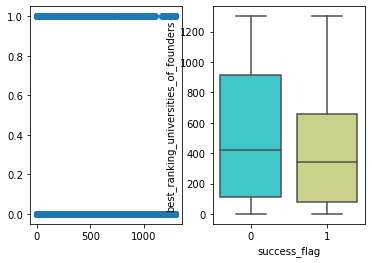

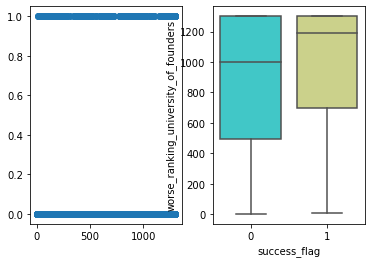

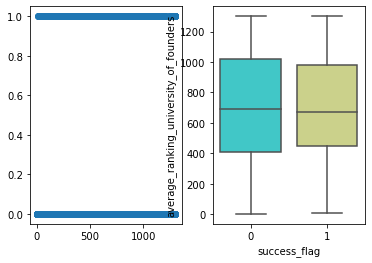

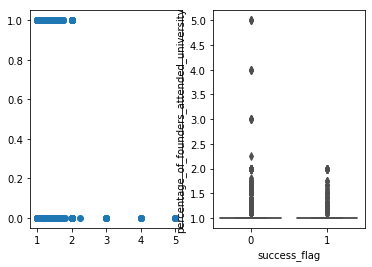

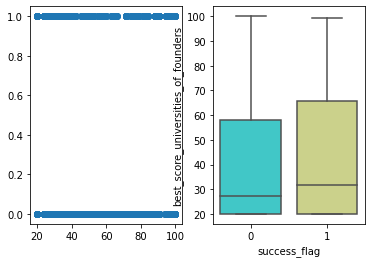

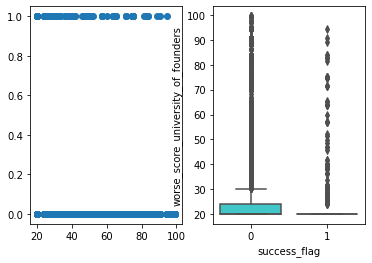

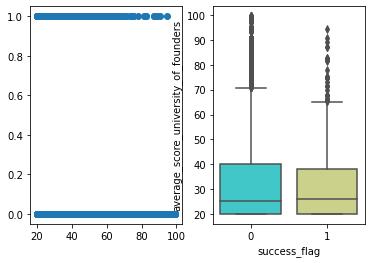

In [32]:
corr_params = ['best_ranking_universities_of_founders',
                         'worse_ranking_university_of_founders','average_ranking_university_of_founders',
                         'percentage_of_founders_attended_university',
                         'best_score_universities_of_founders','worse_score_university_of_founders',
                         'average_score_university_of_founders']
for param in corr_params:
    var1 = df_All_Companies_merged[param][(np.isnan(df_All_Companies_merged[param]) == False)] 
    var2 = df_All_Companies_merged['success_flag'][(np.isnan(df_All_Companies_merged[param]) == False)] 
    print('The correlation between {} and {}: {}'.format('Success',param,var1.corr(var2)))
    fig, (ax1, ax2) = plt.subplots(1,2)
    ax1.scatter(var1, var2, marker='o');
    sns.boxplot(x='success_flag',y=param,data=df_All_Companies_merged, palette='rainbow')

In [33]:
len(df_All_Companies_merged[(df_All_Companies_merged['best_ranking_universities_of_founders'] <= 10 ) & (df_All_Companies_merged['success_flag'] == 0)])

500

In [34]:
df_highest_education_map = pd.read_excel (r'Data\degrees of founders (unedited).xlsx')
df_highest_education_map.drop(index = [0], inplace=True)
standardised_degree_list = ['Doctorate', 'Masters', 'Unknown', 'Associate', 'Bachelors', 'DroppedOut', 'HS']
standardised_degree_list_and_values = [['Doctorate', 4],
                                       ['Masters',2],
                                       ['Unknown', 0],
                                       ['Associate', 0.5],
                                       ['Bachelors', 1],
                                       ['DroppedOut', 0],
                                       ['HS', 0]]

#Average Education Ranking

temp = df_All_Companies_merged['degrees_of_founders'].values[:].tolist()

df_All_Companies_merged['degrees_of_founders_standardised'] = float('nan')
df_All_Companies_merged['degrees_of_founders_standardised']  = df_All_Companies_merged['degrees_of_founders_standardised'] .astype(object)
df_All_Companies_merged['degrees_of_founders_standardised_numbers'] = float('nan')
df_All_Companies_merged['degrees_of_founders_standardised_numbers']  = df_All_Companies_merged['degrees_of_founders_standardised_numbers'] .astype(object)
df_All_Companies_merged['best_degree_of_founders'] = float('nan')
df_All_Companies_merged['worse_degree_of_founders'] = float('nan')
df_All_Companies_merged['average_degree_of_founders'] = float('nan')
df_All_Companies_merged['percentage_of_founders_with_a_degree'] = float('nan')

exceptional_degree_names = ['','N/A','NA']

for idx in range(len(temp)):
    if not isinstance(temp[idx], str):
        if math.isnan(temp[idx]):
            continue
    temp_degree_names = temp[idx].split(',')
    number_of_degrees = len(temp_degree_names)
    temp_degree_standardised = []
    temp_degree_standardised_score = []
    for degree_name in temp_degree_names:
        if degree_name in exceptional_degree_names:
            temporary = 'Unknown'
        else:
            temporary = df_highest_education_map.loc[df_highest_education_map['degrees'] == degree_name, 'degrees_standardised'].values[0]
        idx2 = standardised_degree_list.index(temporary)
        temp_degree_standardised.append(standardised_degree_list_and_values[idx2][0])
        temp_degree_standardised_score.append(standardised_degree_list_and_values[idx2][1])
    
    df_All_Companies_merged.at[idx, 'degrees_of_founders_standardised'] = ','.join([str(elem) for elem in temp_degree_standardised])
    df_All_Companies_merged.at[idx, 'degrees_of_founders_standardised_numbers'] = ','.join([str(elem) for elem in temp_degree_standardised_score])
    df_All_Companies_merged.at[idx, 'best_degree_of_founders'] = np.min(np.array(temp_degree_standardised_score))
    df_All_Companies_merged.at[idx, 'worse_degree_of_founders'] = np.max(np.array(temp_degree_standardised_score))
    df_All_Companies_merged.at[idx, 'average_degree_of_founders'] = np.average(np.array(temp_degree_standardised_score))
    
    df_All_Companies_merged.at[idx, 'percentage_of_founders_with_a_degree'] = number_of_degrees / df_All_Companies_merged.at[idx, 'number_of_founders']
    
df_All_Companies_merged[['degrees_of_founders_standardised','degrees_of_founders_standardised_numbers',
                         'best_degree_of_founders','worse_degree_of_founders',
                         'average_degree_of_founders','percentage_of_founders_with_a_degree']]

,degrees_of_founders_standardised,degrees_of_founders_standardised_numbers,best_degree_of_founders,worse_degree_of_founders,average_degree_of_founders,percentage_of_founders_with_a_degree
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,"Bachelors,Bachelors,Masters,Masters,Masters,Do...","1,1,2,2,2,4",1.0,4.0,2.0,1.00
...,...,...,...,...,...,...
46342,NaN,NaN,NaN,NaN,NaN,NaN
46343,Bachelors,1,1.0,1.0,1.0,0.50
46344,NaN,NaN,NaN,NaN,NaN,NaN
46345,"Bachelors,Bachelors,Bachelors","1,1,1",1.0,1.0,1.0,0.75


The correlation between Success and best_degree_of_founders: -0.005936297441946738
The correlation between Success and worse_degree_of_founders: 0.07861722158821943
The correlation between Success and average_degree_of_founders: 0.04550810040886302
The correlation between Success and percentage_of_founders_with_a_degree: -0.014182831082629544


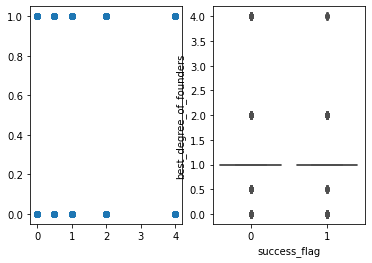

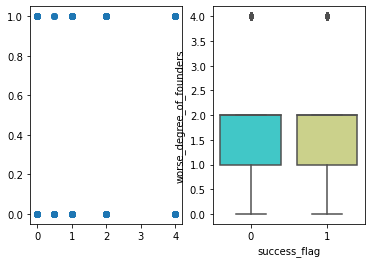

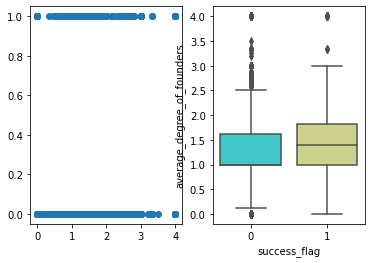

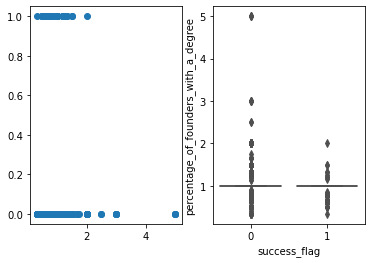

In [35]:
corr_params = ['best_degree_of_founders','worse_degree_of_founders',
                         'average_degree_of_founders','percentage_of_founders_with_a_degree']
for param in corr_params:
    var1 = df_All_Companies_merged[param][(np.isnan(df_All_Companies_merged[param]) == False)] 
    var2 = df_All_Companies_merged['success_flag'][(np.isnan(df_All_Companies_merged[param]) == False)] 
    print('The correlation between {} and {}: {}'.format('Success',param,var1.corr(var2)))
    fig, (ax1, ax2) = plt.subplots(1,2)
    ax1.scatter(var1, var2, marker='o');
    sns.boxplot(x='success_flag',y=param,data=df_All_Companies_merged, palette='rainbow')

The correlation between Success and best_ranking_universities_of_founders with bound 10: -0.04544761850310691
The correlation between Success and best_ranking_universities_of_founders with bound 25: 0.0019444905400819166
The correlation between Success and best_ranking_universities_of_founders with bound 50: -0.058611968188893145
The correlation between Success and best_ranking_universities_of_founders with bound 100: -0.021751905066691387
The correlation between Success and average_ranking_university_of_founders with bound 10: 0.13216822448998108
The correlation between Success and average_ranking_university_of_founders with bound 25: -0.01048146650627293
The correlation between Success and average_ranking_university_of_founders with bound 50: 0.029335060747702986
The correlation between Success and average_ranking_university_of_founders with bound 100: 0.0491728395392959


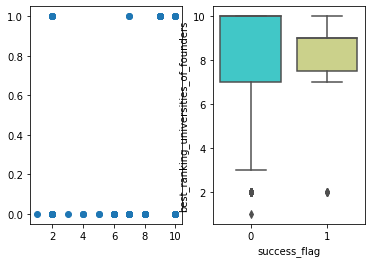

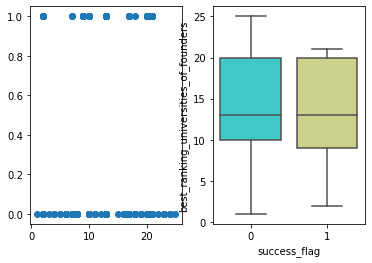

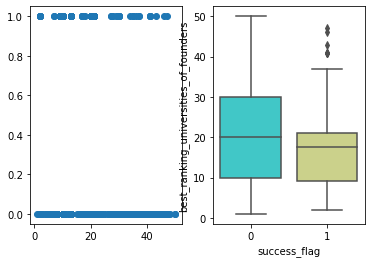

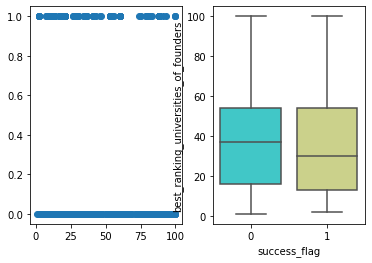

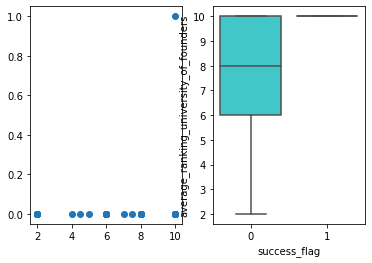

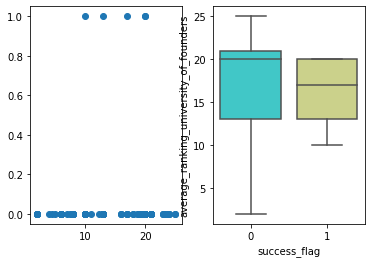

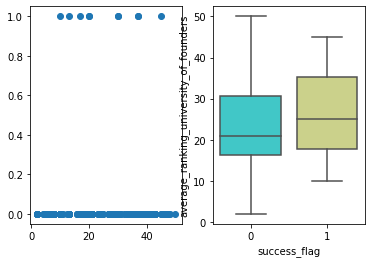

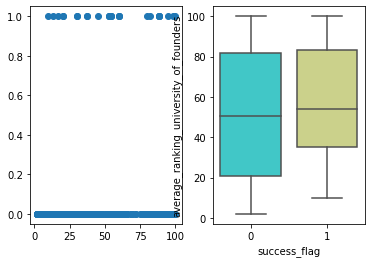

In [36]:
corr_params = ['best_ranking_universities_of_founders','average_ranking_university_of_founders']

boundaries = [10, 25, 50, 100]

for param in corr_params:
    for bound in boundaries:
        var1 = df_All_Companies_merged[param][(np.isnan(df_All_Companies_merged[param]) == False) & (df_All_Companies_merged[param] <= bound)] 
        var2 = df_All_Companies_merged['success_flag'][(np.isnan(df_All_Companies_merged[param]) == False) & (df_All_Companies_merged[param] <= bound)] 
        print('The correlation between {} and {} with bound {}: {}'.format('Success',param,bound,var1.corr(var2)))
        fig, (ax1, ax2) = plt.subplots(1,2)
        ax1.scatter(var1, var2, marker='o');
        sns.boxplot(x='success_flag',y=param,data=df_All_Companies_merged[(np.isnan(df_All_Companies_merged[param]) == False) & (df_All_Companies_merged[param] <= bound)] 
        , palette='rainbow')

In [37]:
len(df_All_Companies_merged[(df_All_Companies_merged['best_degree_of_founders'] >=2 ) & (df_All_Companies_merged['success_flag'] == 0)])

1659

In [38]:
#Data preparation for percentage in Managerial positions


#Connectedness i.e same university, previous companies

#df_all_prev_title_of_founders = pd.DataFrame(list_all_prev_title_of_founders, columns =['prev_title_of_founders'])
#writer = pd.ExcelWriter("Data\prev_title_of_founders (unedited).xlsx", engine='xlsxwriter')
#df_all_prev_title_of_founders.to_excel(writer,sheet_name = 'degrees', index=False)
#writer.save() 

'''
list_of_managerial_titles = ['chief','chief executive officer',
                             'CEO', 'C.E.O', 'C.E.O.', 
                             'chief financial officer',
                             'CFO','C.F.O','C.F.O.',
                             'chief operating officer',
                             'COO','C.O.O','C.O.O.',
                             'chief information officer',
                             'CIO','C.I.O','C.I.O.',
                             'Chief Compliance Officer',
                             'CCO','C.C.O','C.C.O.',
                             'Chief Human Resources Manager',
                             'CHRM','C.H.R.M','C.H.R.M.',
                             'Chief Security Officer',
                             'CSO','C.S.O','C.S.O.',
                             'Chief Green Officer',
                             'CGO','C.G.O.','C.G.O',
                             'Chief Analytics Officer',
                             'CAO','C.A.O','C.A.O.',
                             'Chief Marketing Officer',
                             'CMO','C.M.O','C.M.O.',
                             'Chief Data Officer',
                             'CDO','C.D.O','C.D.O.',
                             'chief technology officer',
                             'cto', 'c.t.o', 'c.t.o.',
                             'manage', 'managing','manager',
                             'exec.', 'executive',
                             'founder','cofounder','co-founder',
                             'board', 'director', 'MD','M.D.',
                             'head', 'lead', 'leader','VP','V.P','V.P.', 'president']

df_all_prev_title_of_founders = pd.read_excel (r'Data\prev_title_of_founders (unedited).xlsx')
df_all_prev_title_of_founders['prev_title_of_founders_flag'] = np.nan

temp = df_all_prev_title_of_founders['prev_title_of_founders'].values
for idx in range(len(temp)):
    if not isinstance(temp[idx], str):
        if math.isnan(temp[idx]):
            continue
    for key_title in list_of_managerial_titles:
        if key_title.upper() in temp[idx].upper():
            df_all_prev_title_of_founders.at[idx, 'prev_title_of_founders_flag'] = 1

            
#writer = pd.ExcelWriter("Data\prev_title_of_founders (unedited).xlsx", engine='xlsxwriter')
#df_all_prev_title_of_founders.to_excel(writer,sheet_name = 'degrees', index=False)
#writer.save() 
'''

'\nlist_of_managerial_titles = [\'chief\',\'chief executive officer\',\n                             \'CEO\', \'C.E.O\', \'C.E.O.\', \n                             \'chief financial officer\',\n                             \'CFO\',\'C.F.O\',\'C.F.O.\',\n                             \'chief operating officer\',\n                             \'COO\',\'C.O.O\',\'C.O.O.\',\n                             \'chief information officer\',\n                             \'CIO\',\'C.I.O\',\'C.I.O.\',\n                             \'Chief Compliance Officer\',\n                             \'CCO\',\'C.C.O\',\'C.C.O.\',\n                             \'Chief Human Resources Manager\',\n                             \'CHRM\',\'C.H.R.M\',\'C.H.R.M.\',\n                             \'Chief Security Officer\',\n                             \'CSO\',\'C.S.O\',\'C.S.O.\',\n                             \'Chief Green Officer\',\n                             \'CGO\',\'C.G.O.\',\'C.G.O\',\n                       

In [39]:
#len(df_all_prev_title_of_founders[df_all_prev_title_of_founders['prev_title_of_founders_flag'] != 1])

In [40]:
df_all_prev_title_of_founders = pd.read_excel (r'Data\prev_title_of_founders (edited).xlsx')
df_All_Companies_merged.at[idx, 'number_of_founders']

nan

In [41]:
# previous job title data collation

temp = df_All_Companies_merged['prev_title_of_founders'].values[:].tolist()

df_All_Companies_merged['prev_title_of_founders_managerial_flag_collated'] = float('nan')
df_All_Companies_merged['prev_title_of_founders_managerial_flag_collated']  = df_All_Companies_merged['prev_title_of_founders_managerial_flag_collated'] .astype(object)
df_All_Companies_merged['number_of_prev_title_of_founders'] = float('nan')
df_All_Companies_merged['managerial_flag_number_of_prev_title_of_founders'] = float('nan')
df_All_Companies_merged['number_of_prev_title_of_founders_per_founder'] = float('nan')
df_All_Companies_merged['managerial_flag_number_of_prev_title_of_founders_per_founder'] = float('nan')


exceptional_prev_title_names = ['','N/A','NA', 'n/a']

for idx in range(len(temp)):
    if not isinstance(temp[idx], str):
        if math.isnan(temp[idx]):
            continue
    temp_prev_title_names = temp[idx].split(',')
    temp_prev_title_names = [x for x in temp_prev_title_names if not(x in exceptional_prev_title_names)]
    #print(temp_prev_title_names)
    
    number_of_prev_title_of_founders = len(temp_prev_title_names)
    temp_prev_title_of_founders_managerial_flag_collated = []
    
    for prev_title_names in temp_prev_title_names:
        
        try:
            temporary = df_all_prev_title_of_founders.loc[df_all_prev_title_of_founders['prev_title_of_founders'] == prev_title_names, 'prev_title_of_founders_flag'].values[0]
        except:
            print(prev_title_names)
            
        temp_prev_title_of_founders_managerial_flag_collated.append(temporary)
    
    df_All_Companies_merged.at[idx, 'prev_title_of_founders_managerial_flag_collated'] = ','.join([str(elem) for elem in temp_prev_title_of_founders_managerial_flag_collated])
    df_All_Companies_merged.at[idx, 'number_of_prev_title_of_founders'] = len([x for x in temp_prev_title_of_founders_managerial_flag_collated if x != -1])
    df_All_Companies_merged.at[idx, 'managerial_flag_number_of_prev_title_of_founders'] = len([x for x in temp_prev_title_of_founders_managerial_flag_collated if x == 1])
    df_All_Companies_merged.at[idx, 'number_of_prev_title_of_founders_per_founder'] = len([x for x in temp_prev_title_of_founders_managerial_flag_collated if x != -1]) / df_All_Companies_merged.at[idx, 'number_of_founders']
    df_All_Companies_merged.at[idx, 'managerial_flag_number_of_prev_title_of_founders_per_founder'] = len([x for x in temp_prev_title_of_founders_managerial_flag_collated if x == 1]) / df_All_Companies_merged.at[idx, 'number_of_founders']
    
df_All_Companies_merged[['prev_title_of_founders','prev_title_of_founders_managerial_flag_collated','number_of_prev_title_of_founders',
                         'managerial_flag_number_of_prev_title_of_founders','number_of_prev_title_of_founders_per_founder',
                         'managerial_flag_number_of_prev_title_of_founders_per_founder']]

,prev_title_of_founders,prev_title_of_founders_managerial_flag_collated,number_of_prev_title_of_founders,managerial_flag_number_of_prev_title_of_founders,number_of_prev_title_of_founders_per_founder,managerial_flag_number_of_prev_title_of_founders_per_founder
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,"Advisor,Advisor,Board Advisor,Board Member,Boa...","0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1....",50.0,40.0,8.333333,6.666667
...,...,...,...,...,...,...
46342,Founder and CEO,1.0,1.0,1.0,NaN,NaN
46343,"Co-Founder,Co-Founder,Co-founder,Developer,Ope...","1.0,1.0,1.0,0.0,1.0,1.0,0.0",7.0,5.0,3.500000,2.500000
46344,Founder and CEO,1.0,1.0,1.0,NaN,NaN
46345,"Co-Founder,Co-Founder,Vice President Of Busine...","1.0,1.0,1.0,1.0,0.0",5.0,4.0,1.250000,1.000000


The correlation between Success and number_of_prev_title_of_founders: 0.09062780802918616
The correlation between Success and managerial_flag_number_of_prev_title_of_founders: 0.10176025013327912
The correlation between Success and number_of_prev_title_of_founders_per_founder: 0.02216089730124435
The correlation between Success and managerial_flag_number_of_prev_title_of_founders_per_founder: 0.021475694477832482


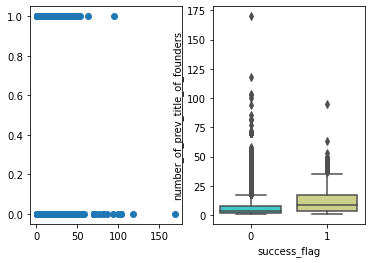

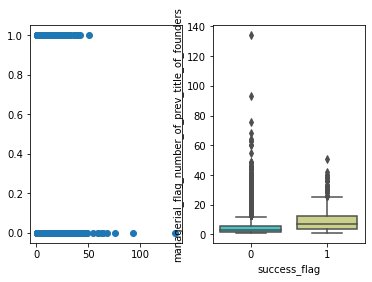

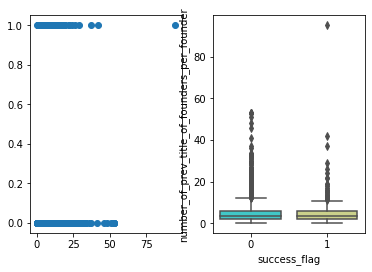

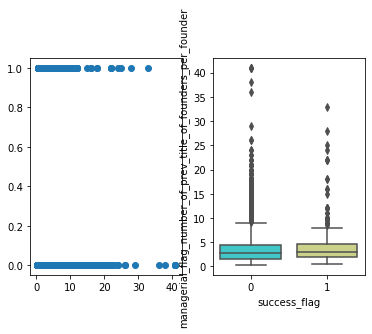

In [42]:
corr_params = ['number_of_prev_title_of_founders','managerial_flag_number_of_prev_title_of_founders',
                         'number_of_prev_title_of_founders_per_founder','managerial_flag_number_of_prev_title_of_founders_per_founder']
for param in corr_params:
    var1 = df_All_Companies_merged[param][(np.isnan(df_All_Companies_merged[param]) == False)] 
    var2 = df_All_Companies_merged['success_flag'][(np.isnan(df_All_Companies_merged[param]) == False)] 
    print('The correlation between {} and {}: {}'.format('Success',param,var1.corr(var2)))
    fig, (ax1, ax2) = plt.subplots(1,2)
    ax1.scatter(var1, var2, marker='o');
    sns.boxplot(x='success_flag',y=param,data=df_All_Companies_merged, palette='rainbow')

In [43]:
#Connectedness factor
#We will count the number of universities of the founders

temp = df_All_Companies_merged['universities_of_founders'].values[:].tolist()

df_All_Companies_merged['founders_connectedness_factor_based_on_university'] = float('nan')

exceptional_prev_university_names = ['','N/A','NA', 'n/a']

for idx in range(len(temp)):
    if not isinstance(temp[idx], str):
        if math.isnan(temp[idx]):
            continue
            
    temp_prev_university_names = temp[idx].split(',')
    temp_prev_university_names = [x.upper().strip() for x in temp_prev_university_names if not(x in exceptional_prev_university_names)]

    temp_prev_university_names_counter = [temp_prev_university_names.count(x) for x in temp_prev_university_names]
    temp_prev_university_names_counter = np.array(temp_prev_university_names_counter) - 1
    
    if (df_All_Companies_merged.at[idx, 'number_of_founders'] != 1): df_All_Companies_merged.at[idx, 'founders_connectedness_factor_based_on_university'] = np.max(temp_prev_university_names_counter) / (df_All_Companies_merged.at[idx, 'number_of_founders'] - 1) 

df_All_Companies_merged[['universities_of_founders','founders_connectedness_factor_based_on_university']]

,universities_of_founders,founders_connectedness_factor_based_on_university
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,"Télécom ParisTech,University of Calgary,Univer...",0.400000
...,...,...
46342,NaN,NaN
46343,"Coastal Carolina University,East Carolina Univ...",0.000000
46344,NaN,NaN
46345,"American Military University,American Military...",0.333333


The correlation between Success and founders_connectedness_factor_based_on_university: 0.040677285686908114


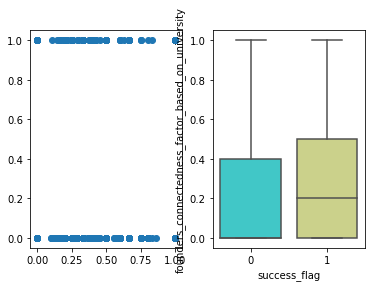

In [44]:
corr_params = ['founders_connectedness_factor_based_on_university']
for param in corr_params:
    var1 = df_All_Companies_merged[param][(np.isnan(df_All_Companies_merged[param]) == False)] 
    var2 = df_All_Companies_merged['success_flag'][(np.isnan(df_All_Companies_merged[param]) == False)] 
    print('The correlation between {} and {}: {}'.format('Success',param,var1.corr(var2)))
    fig, (ax1, ax2) = plt.subplots(1,2)
    ax1.scatter(var1, var2, marker='o');
    sns.boxplot(x='success_flag',y=param,data=df_All_Companies_merged[(np.isnan(df_All_Companies_merged[param]) == False)] , palette='rainbow')

[0.020833333333333332, 0.029585798816568046, 0.02040816326530612, 0.025, 0.034482758620689655, 0.0332409972299169, 0.04312015503875969, 0.044042728019720624]


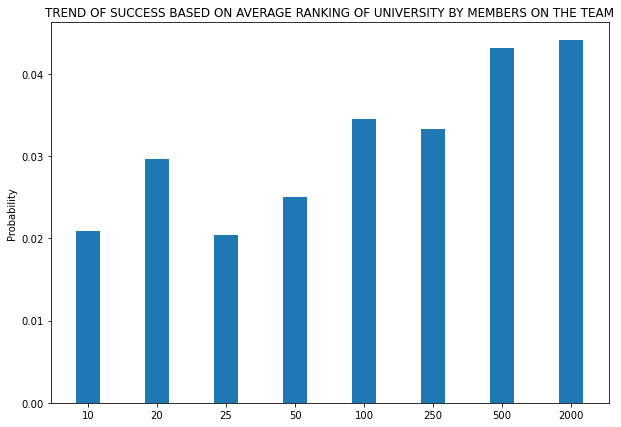

In [45]:
boundaries = [10, 20, 25, 50, 100, 250, 500, 2000]
bar_plot_data = [len(df_All_Companies_merged['average_ranking_university_of_founders'][(np.isnan(df_All_Companies_merged['average_ranking_university_of_founders']) == False) & (df_All_Companies_merged['average_ranking_university_of_founders'] <= rank) & (df_All_Companies_merged['success_flag'] == 1)])/ len(df_All_Companies_merged['average_ranking_university_of_founders'][(np.isnan(df_All_Companies_merged['average_ranking_university_of_founders']) == False) & (df_All_Companies_merged['average_ranking_university_of_founders'] <= rank)]) for rank in boundaries]
print(bar_plot_data)

ind = np.arange(len(boundaries))  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, bar_plot_data, width)
 
plt.ylabel('Probability')
plt.title('TREND OF SUCCESS BASED ON AVERAGE RANKING OF UNIVERSITY BY MEMBERS ON THE TEAM')
plt.xticks(ind, boundaries)

 
plt.show()

[530, 952, 1178, 1844, 2937, 4883, 7109, 12170]


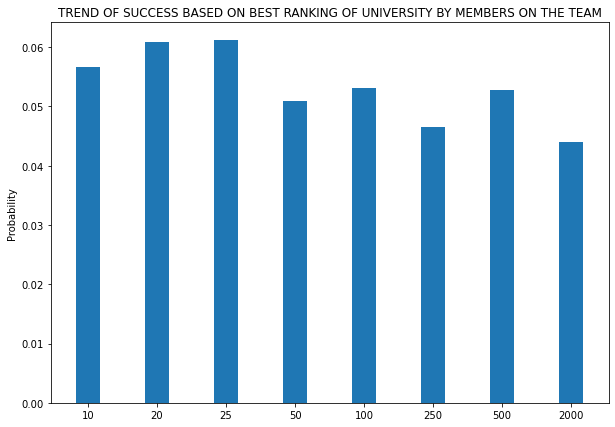

In [46]:
boundaries = [10, 20, 25, 50, 100, 250, 500, 2000]
bar_plot_data_1 = [len(df_All_Companies_merged['best_ranking_universities_of_founders'][(np.isnan(df_All_Companies_merged['best_ranking_universities_of_founders']) == False) & (df_All_Companies_merged['best_ranking_universities_of_founders'] <= rank) & (df_All_Companies_merged['success_flag'] == 1)]) for rank in boundaries]
bar_plot_data_2 = [len(df_All_Companies_merged['best_ranking_universities_of_founders'][(np.isnan(df_All_Companies_merged['best_ranking_universities_of_founders']) == False) & (df_All_Companies_merged['best_ranking_universities_of_founders'] <= rank)]) for rank in boundaries]
bar_plot_data = np.array(bar_plot_data_1)/ np.array(bar_plot_data_2)
print(bar_plot_data_2)

ind = np.arange(len(boundaries))  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, bar_plot_data, width)
 
plt.ylabel('Probability')
plt.title('TREND OF SUCCESS BASED ON BEST RANKING OF UNIVERSITY BY MEMBERS ON THE TEAM')
plt.xticks(ind, boundaries)

 
plt.show()

[11991, 9687, 1714, 268]


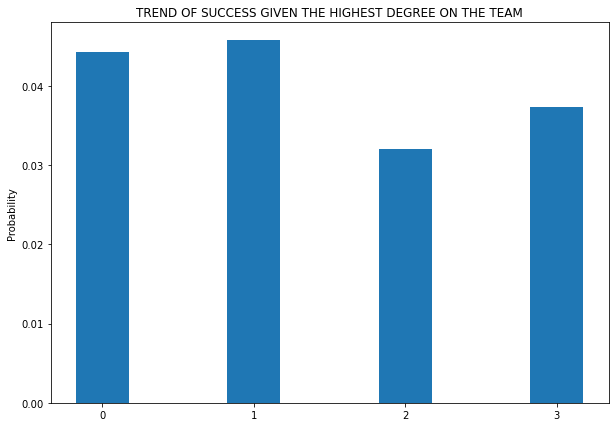

In [47]:
boundaries = [0,1,2,3]
bar_plot_data_1 = [len(df_All_Companies_merged['best_degree_of_founders'][(np.isnan(df_All_Companies_merged['best_degree_of_founders']) == False) & (df_All_Companies_merged['best_degree_of_founders'] >= rank) & (df_All_Companies_merged['success_flag'] == 1)]) for rank in boundaries]
bar_plot_data_2 = [len(df_All_Companies_merged['best_degree_of_founders'][(np.isnan(df_All_Companies_merged['best_degree_of_founders']) == False) & (df_All_Companies_merged['best_degree_of_founders'] >= rank)]) for rank in boundaries]
bar_plot_data = np.array(bar_plot_data_1)/ np.array(bar_plot_data_2)
print(bar_plot_data_2)

ind = np.arange(len(boundaries))  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, bar_plot_data, width)
 
plt.ylabel('Probability')
plt.title('TREND OF SUCCESS GIVEN THE HIGHEST DEGREE ON THE TEAM')
plt.xticks(ind, boundaries)

 
plt.show()

[0.04428321240930698, 0.04660733084505694, 0.04828118964851294, 0.05778894472361809]


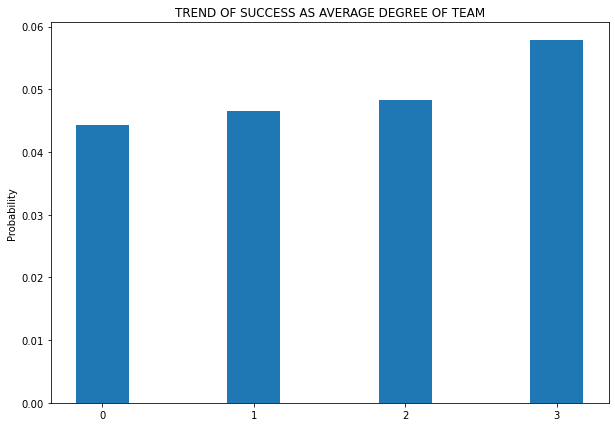

In [48]:
boundaries = [0,1,2,3]
bar_plot_data = [len(df_All_Companies_merged['average_degree_of_founders'][(np.isnan(df_All_Companies_merged['average_degree_of_founders']) == False) & (df_All_Companies_merged['average_degree_of_founders'] >= rank) & (df_All_Companies_merged['success_flag'] == 1)])/ len(df_All_Companies_merged['average_degree_of_founders'][(np.isnan(df_All_Companies_merged['average_degree_of_founders']) == False) & (df_All_Companies_merged['average_degree_of_founders'] >= rank)]) for rank in boundaries]
print(bar_plot_data)

ind = np.arange(len(boundaries))  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, bar_plot_data, width)
 
plt.ylabel('Probability')
plt.title('TREND OF SUCCESS AS AVERAGE DEGREE OF TEAM')
plt.xticks(ind, boundaries)

 
plt.show()

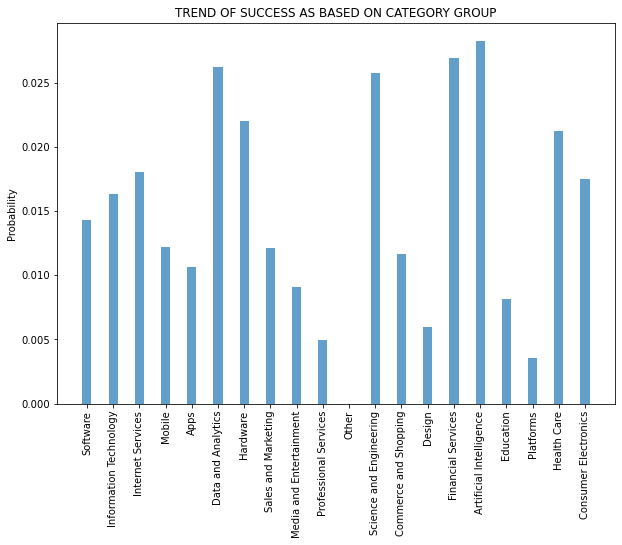

In [49]:
names = [x[1] for x in list_all_category_groups_and_count[:20]]
bar_plot_data_1 = [0 for x in list_all_category_groups_and_count[:20]]
bar_plot_data_2 = [0 for x in list_all_category_groups_and_count[:20]]

temp = df_All_Companies_merged['category_groups_list'].values[:]
list_all_category_groups_unfiltered = [x.split(',') for x in temp if isinstance(x, str)]

for idx in range(len(temp)):
    if not isinstance(temp[idx], str):
        if math.isnan(temp[idx]):
            continue
    for idx2 in range(len(names)):
        if names[idx2] in temp[idx]:
            bar_plot_data_2[idx2] += 1
            if df_All_Companies_merged.at[idx, 'success_flag'] == 1:
                bar_plot_data_1[idx2] += 1

ind = np.arange(len(names))  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, np.array(bar_plot_data_1) / np.array(bar_plot_data_2), width,alpha=0.7,)
 
plt.ylabel('Probability')
plt.title('TREND OF SUCCESS AS BASED ON CATEGORY GROUP')
plt.xticks(ind, names)
plt.xticks(rotation=90)

 
plt.show()

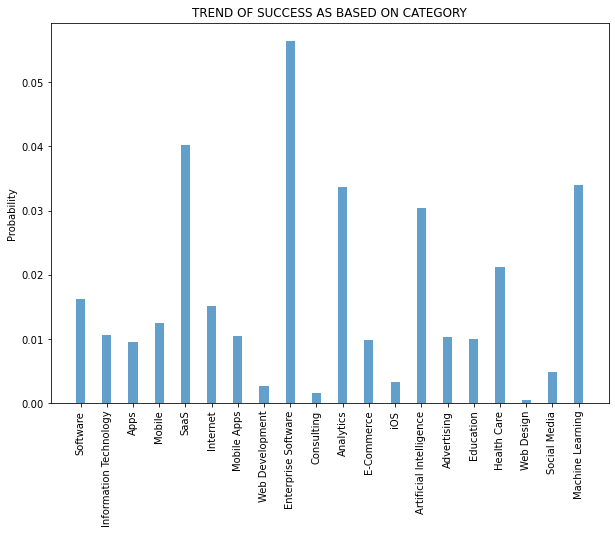

In [50]:
names = [x[1] for x in list_all_categories_and_count[:20]]
bar_plot_data_1 = [0 for x in list_all_categories_and_count[:20]]
bar_plot_data_2 = [0 for x in list_all_categories_and_count[:20]]

temp = df_All_Companies_merged['category_list'].values[:]
list_all_categories_unfiltered = [x.split(',') for x in temp if isinstance(x, str)]

for idx in range(len(temp)):
    if not isinstance(temp[idx], str):
        if math.isnan(temp[idx]):
            continue
    for idx2 in range(len(names)):
        if names[idx2] in temp[idx]:
            bar_plot_data_2[idx2] += 1
            if df_All_Companies_merged.at[idx, 'success_flag'] == 1:
                bar_plot_data_1[idx2] += 1

ind = np.arange(len(names))  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, np.array(bar_plot_data_1) / np.array(bar_plot_data_2), width,alpha=0.7,)
 
plt.ylabel('Probability')
plt.title('TREND OF SUCCESS AS BASED ON CATEGORY')
plt.xticks(ind, names)
plt.xticks(rotation=90)

 
plt.show()

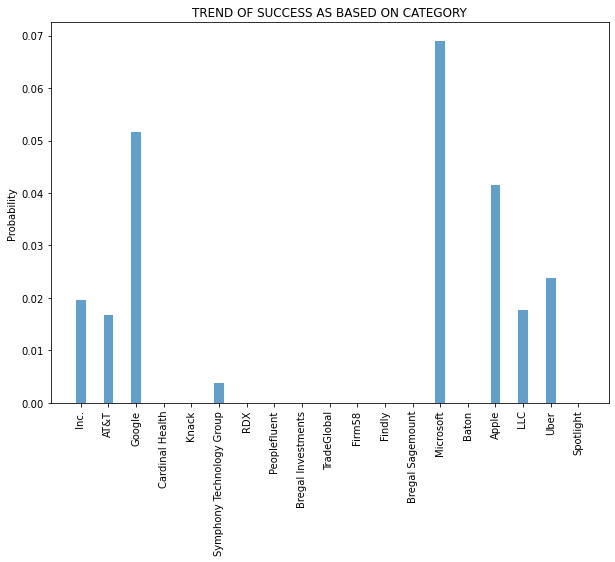

In [51]:
names = [x[1] for x in list_all_prev_companies_of_founders_and_count[1:20]]
bar_plot_data_1 = [0 for x in list_all_prev_companies_of_founders_and_count[1:20]]
bar_plot_data_2 = [0 for x in list_all_prev_companies_of_founders_and_count[1:20]]

temp = df_All_Companies_merged['prev_companies_of_founders'].values[:]
list_all_prev_companies_of_founders_unfiltered = [x.split(',') for x in temp if isinstance(x, str)]

for idx in range(len(temp)):
    if not isinstance(temp[idx], str):
        if math.isnan(temp[idx]):
            continue
    for idx2 in range(len(names)):
        if names[idx2] in str(temp[idx]):
            bar_plot_data_2[idx2] += 1
            if df_All_Companies_merged.at[idx, 'success_flag'] == 1:
                bar_plot_data_1[idx2] += 1

ind = np.arange(len(names))  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, np.array(bar_plot_data_1) / np.array(bar_plot_data_2), width,alpha=0.7,)
 
plt.ylabel('Probability')
plt.title('TREND OF SUCCESS AS BASED ON CATEGORY')
plt.xticks(ind, names)
plt.xticks(rotation=90)

 
plt.show()

In [52]:
#Previously worked at publically traded companies

temp = df_All_Companies_merged['prev_companies_of_founders'].values[:]

df_All_Companies_merged['prev_companies_of_founders_publically_traded_flags'] = float('nan')
df_All_Companies_merged['prev_companies_of_founders_publically_traded_flags']  = df_All_Companies_merged['prev_companies_of_founders_publically_traded_flags'] .astype(object)
df_All_Companies_merged['number_of_prev_companies_of_founders_publically_traded'] = float('nan')


exceptional_prev_companies_of_founders_names = ['','N/A','NA', ' Inc.']

for idx in range(len(temp)):
    if not isinstance(temp[idx], str):
        if math.isnan(temp[idx]):
            continue
    temp_prev_companies_of_founders_names = str(temp[idx]).split(',')
    temp_prev_companies_of_founders_names = [x.upper().strip().upper() for x in temp_prev_companies_of_founders_names if not(x in exceptional_prev_companies_of_founders_names)]
    
    temp_prev_companies_of_founders_is_publically_traded_flag = []
    
    for prev_companies_of_founders_name in temp_prev_companies_of_founders_names:
        if prev_companies_of_founders_name in list_of_allpublically_listed_companies:
            temp_prev_companies_of_founders_is_publically_traded_flag.append(1)
        else:
            temp_prev_companies_of_founders_is_publically_traded_flag.append(0)
    
    df_All_Companies_merged.at[idx, 'prev_companies_of_founders_publically_traded_flags'] = ','.join([str(elem) for elem in temp_prev_companies_of_founders_is_publically_traded_flag])
    df_All_Companies_merged.at[idx, 'number_of_prev_companies_of_founders_publically_traded'] = np.sum(np.array(temp_prev_companies_of_founders_is_publically_traded_flag))
    
df_All_Companies_merged[['prev_companies_of_founders_publically_traded_flags','number_of_prev_companies_of_founders_publically_traded']]

,prev_companies_of_founders_publically_traded_flags,number_of_prev_companies_of_founders_publically_traded
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",0.0
...,...,...
46342,0,0.0
46343,"0,0,0,0,0,0,0",0.0
46344,0,0.0
46345,"0,0,0,0",0.0


In [53]:
df_All_Companies_merged[['prev_companies_of_founders_publically_traded_flags','number_of_prev_companies_of_founders_publically_traded']]

,prev_companies_of_founders_publically_traded_flags,number_of_prev_companies_of_founders_publically_traded
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",0.0
...,...,...
46342,0,0.0
46343,"0,0,0,0,0,0,0",0.0
46344,0,0.0
46345,"0,0,0,0",0.0


# Grouping of Data
All of the previous analysis shows us some signals that increase the success of a company. Using these signals, we shall now aggregate the data in the following way to reduce it's dimension for better training.

1. We shall group people where atleast one of the founders that went to top 10, top 25, top 50, and rest usiversities together and give them the flags 3,2,1,0 respectively

2. We shall also have a flag if a team went to a top 10 univerisity or not. This will be denoted by a 1 or 0.

3. WE SHALL REPEAT STEP 1 AND 2 WITH NUMBER OF INVERTORS AND THE SUCCESS RATE OF THE INVESTORS

In [54]:
df_All_Companies_merged.columns

Index(['name', 'founded_year', 'country_code', 'city', 'category_list',
       'category_groups_list', 'universities_of_founders',
       'degrees_of_founders', 'subject_degrees_of_founders',
       'gender_of_founders', 'city_of_founders', 'prev_companies_of_founders',
       'prev_title_of_founders', 'investor_name', 'short_description',
       'description', 'success_flag', 'description_vectors',
       'short_description_vectors', 'number_of_founders',
       'number_of_male_founders', 'number_of_female_founders',
       'percentage_of_male_founders', 'number_of_investors',
       'average_investor_success', 'universities_of_founders_rankings',
       'best_ranking_universities_of_founders',
       'worse_ranking_university_of_founders',
       'average_ranking_university_of_founders',
       'percentage_of_founders_attended_university',
       'universities_of_founders_scores',
       'best_score_universities_of_founders',
       'worse_score_university_of_founders',
       'avera

The correlation between Success and best_ranking_universities_of_founders_grouping_scaling: 0.032462138260188886
The correlation between Success and best_ranking_universities_of_founders: -0.04018959618248534
[2409, 5389, 6152, 12170]


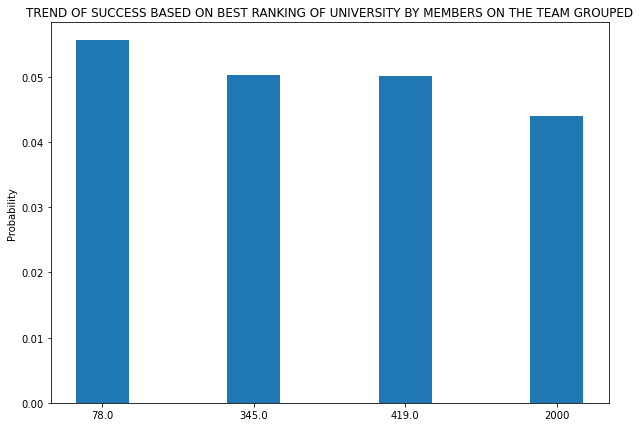

In [55]:
best_ranking_universities_of_founders_success_quantiles = (np.percentile(df_All_Companies_merged['best_ranking_universities_of_founders'][(np.isnan(df_All_Companies_merged['best_ranking_universities_of_founders']) == False) & (df_All_Companies_merged['success_flag'] == 1)] , [25, 50, 75]))
best_ranking_universities_of_founders_unsuccessful_quantiles = (np.percentile(df_All_Companies_merged['best_ranking_universities_of_founders'][(np.isnan(df_All_Companies_merged['best_ranking_universities_of_founders']) == False) & (df_All_Companies_merged['success_flag'] == 0)] , [25, 50, 75]))
df_All_Companies_merged['best_ranking_universities_of_founders_grouping_scaling'] = float('nan')

boundaries = [0, 
              best_ranking_universities_of_founders_success_quantiles[0], 
              best_ranking_universities_of_founders_success_quantiles[1], 
              best_ranking_universities_of_founders_unsuccessful_quantiles[1],
              2000]
grouping_scale = [3,2,1,0]
for idx in range(len(boundaries) - 1):
    df_All_Companies_merged.loc[ (df_All_Companies_merged['best_ranking_universities_of_founders'] <= boundaries[idx + 1]) & ( df_All_Companies_merged['best_ranking_universities_of_founders'] > boundaries[idx]) ,'best_ranking_universities_of_founders_grouping_scaling'] = grouping_scale[idx]

    
corr_params = ['best_ranking_universities_of_founders_grouping_scaling','best_ranking_universities_of_founders']
for param in corr_params:
    var1 = df_All_Companies_merged[param][(np.isnan(df_All_Companies_merged[param]) == False)] 
    var2 = df_All_Companies_merged['success_flag'][(np.isnan(df_All_Companies_merged[param]) == False)] 
    print('The correlation between {} and {}: {}'.format('Success',param,var1.corr(var2)))

bar_plot_data_1 = [len(df_All_Companies_merged['best_ranking_universities_of_founders_grouping_scaling'][(np.isnan(df_All_Companies_merged['best_ranking_universities_of_founders_grouping_scaling']) == False) & (df_All_Companies_merged['best_ranking_universities_of_founders'] <= rank) & (df_All_Companies_merged['success_flag'] == 1)]) for rank in boundaries[1:]]
bar_plot_data_2 = [len(df_All_Companies_merged['best_ranking_universities_of_founders_grouping_scaling'][(np.isnan(df_All_Companies_merged['best_ranking_universities_of_founders_grouping_scaling']) == False) & (df_All_Companies_merged['best_ranking_universities_of_founders'] <= rank)]) for rank in boundaries[1:]]
bar_plot_data = np.array(bar_plot_data_1)/ np.array(bar_plot_data_2)
print(bar_plot_data_2)

ind = np.arange(len(boundaries[1:]))  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, bar_plot_data, width)
 
plt.ylabel('Probability')
plt.title('TREND OF SUCCESS BASED ON BEST RANKING OF UNIVERSITY BY MEMBERS ON THE TEAM GROUPED')
plt.xticks(ind, boundaries[1:])

 
plt.show()

The correlation between Success and best_ranking_universities_of_founders_binary_grouping_scaling: 0.02804135063470504
The correlation between Success and best_ranking_universities_of_founders: -0.04018959618248534
[2409, 12170]


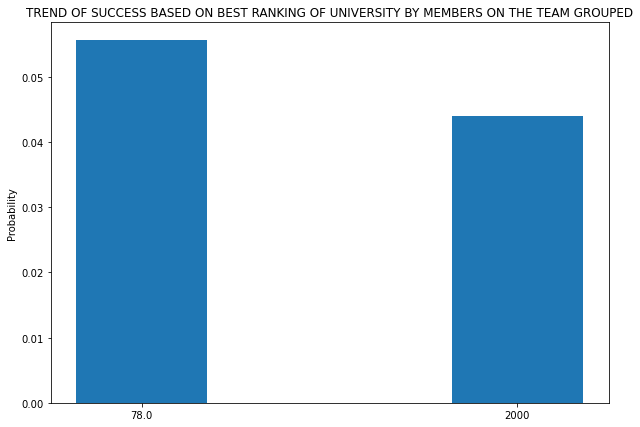

In [56]:
#Binary grouping based on best quantile of of success
best_ranking_universities_of_founders_success_quantiles = (np.percentile(df_All_Companies_merged['best_ranking_universities_of_founders'][(np.isnan(df_All_Companies_merged['best_ranking_universities_of_founders']) == False) & (df_All_Companies_merged['success_flag'] == 1)] , [25, 50, 75]))
best_ranking_universities_of_founders_unsuccessful_quantiles = (np.percentile(df_All_Companies_merged['best_ranking_universities_of_founders'][(np.isnan(df_All_Companies_merged['best_ranking_universities_of_founders']) == False) & (df_All_Companies_merged['success_flag'] == 0)] , [25, 50, 75]))

df_All_Companies_merged['best_ranking_universities_of_founders_binary_grouping_scaling'] = float('nan')

boundaries = [0, 
              best_ranking_universities_of_founders_success_quantiles[0],
              2000]
grouping_scale = [1,0]

for idx in range(len(boundaries) - 1):
    df_All_Companies_merged.loc[ (df_All_Companies_merged['best_ranking_universities_of_founders'] <= boundaries[idx + 1]) & ( df_All_Companies_merged['best_ranking_universities_of_founders'] > boundaries[idx]) ,'best_ranking_universities_of_founders_binary_grouping_scaling'] = grouping_scale[idx]


corr_params = ['best_ranking_universities_of_founders_binary_grouping_scaling','best_ranking_universities_of_founders']
for param in corr_params:
    var1 = df_All_Companies_merged[param][(np.isnan(df_All_Companies_merged[param]) == False)] 
    var2 = df_All_Companies_merged['success_flag'][(np.isnan(df_All_Companies_merged[param]) == False)] 
    print('The correlation between {} and {}: {}'.format('Success',param,var1.corr(var2)))
    
bar_plot_data_1 = [len(df_All_Companies_merged['best_ranking_universities_of_founders_binary_grouping_scaling'][(np.isnan(df_All_Companies_merged['best_ranking_universities_of_founders_binary_grouping_scaling']) == False) & (df_All_Companies_merged['best_ranking_universities_of_founders'] <= rank) & (df_All_Companies_merged['success_flag'] == 1)]) for rank in boundaries[1:]]
bar_plot_data_2 = [len(df_All_Companies_merged['best_ranking_universities_of_founders_binary_grouping_scaling'][(np.isnan(df_All_Companies_merged['best_ranking_universities_of_founders_binary_grouping_scaling']) == False) & (df_All_Companies_merged['best_ranking_universities_of_founders'] <= rank)]) for rank in boundaries[1:]]
bar_plot_data = np.array(bar_plot_data_1)/ np.array(bar_plot_data_2)
print(bar_plot_data_2)

ind = np.arange(len(boundaries[1:]))  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, bar_plot_data, width)
 
plt.ylabel('Probability')
plt.title('TREND OF SUCCESS BASED ON BEST RANKING OF UNIVERSITY BY MEMBERS ON THE TEAM GROUPED')
plt.xticks(ind, boundaries[1:])

 
plt.show()

The correlation between Success and average_degree_of_founders_grouping_scaling: 0.03757676797677113
The correlation between Success and average_degree_of_founders: 0.04550810040886302
[2622, 4970, 10449, 11991]


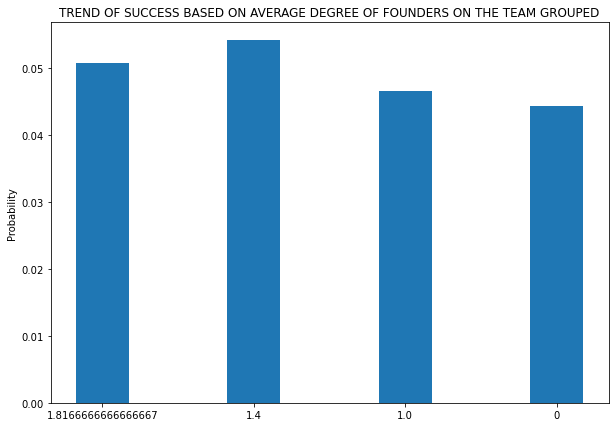

In [57]:
#Average degree of founders success
average_degree_of_founders_success_quantiles = (np.percentile(df_All_Companies_merged['average_degree_of_founders'][(np.isnan(df_All_Companies_merged['average_degree_of_founders']) == False) & (df_All_Companies_merged['success_flag'] == 1)] , [25, 50, 75]))
average_degree_of_founders_unsuccessful_quantiles = (np.percentile(df_All_Companies_merged['average_degree_of_founders'][(np.isnan(df_All_Companies_merged['average_degree_of_founders']) == False) & (df_All_Companies_merged['success_flag'] == 0)] , [25, 50, 75]))
df_All_Companies_merged['average_degree_of_founders_grouping_scaling'] = float('nan')

boundaries = [4.1, 
              average_degree_of_founders_success_quantiles[2], 
              average_degree_of_founders_success_quantiles[1], 
              average_degree_of_founders_unsuccessful_quantiles[1],
              0]
grouping_scale = [3,2,1,0]
for idx in range(len(boundaries) - 1):
    df_All_Companies_merged.loc[ (df_All_Companies_merged['average_degree_of_founders'] >= boundaries[idx + 1]) & ( df_All_Companies_merged['average_degree_of_founders'] < boundaries[idx]) ,'average_degree_of_founders_grouping_scaling'] = grouping_scale[idx]

    
corr_params = ['average_degree_of_founders_grouping_scaling','average_degree_of_founders']
for param in corr_params:
    var1 = df_All_Companies_merged[param][(np.isnan(df_All_Companies_merged[param]) == False)] 
    var2 = df_All_Companies_merged['success_flag'][(np.isnan(df_All_Companies_merged[param]) == False)] 
    print('The correlation between {} and {}: {}'.format('Success',param,var1.corr(var2)))

bar_plot_data_1 = [len(df_All_Companies_merged['average_degree_of_founders_grouping_scaling'][(np.isnan(df_All_Companies_merged['average_degree_of_founders_grouping_scaling']) == False) & (df_All_Companies_merged['average_degree_of_founders'] >= rank) & (df_All_Companies_merged['success_flag'] == 1)]) for rank in boundaries[1:]]
bar_plot_data_2 = [len(df_All_Companies_merged['average_degree_of_founders_grouping_scaling'][(np.isnan(df_All_Companies_merged['average_degree_of_founders_grouping_scaling']) == False) & (df_All_Companies_merged['average_degree_of_founders'] >= rank)]) for rank in boundaries[1:]]
bar_plot_data = np.array(bar_plot_data_1)/ np.array(bar_plot_data_2)
print(bar_plot_data_2)

ind = np.arange(len(boundaries[1:]))  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, bar_plot_data, width)
 
plt.ylabel('Probability')
plt.title('TREND OF SUCCESS BASED ON AVERAGE DEGREE OF FOUNDERS ON THE TEAM GROUPED')
plt.xticks(ind, boundaries[1:])

 
plt.show()

The correlation between Success and average_degree_of_founders_binary_grouping_scaling: 0.04024921648239941
The correlation between Success and average_degree_of_founders: 0.04550810040886302
[4970, 11991]


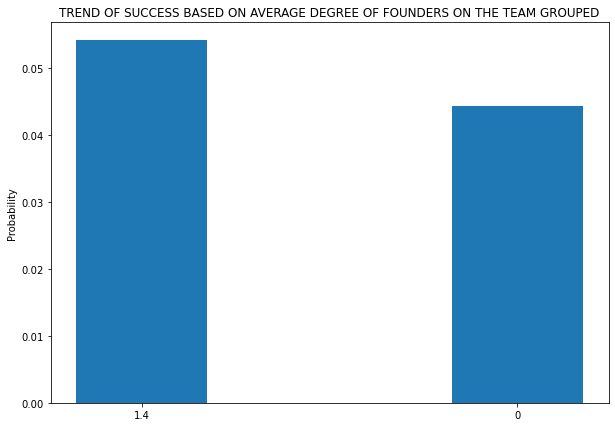

In [58]:
#BINARY GROUPING OF AVERAGE DEGREE OF FOUNDERS
average_degree_of_founders_success_quantiles = (np.percentile(df_All_Companies_merged['average_degree_of_founders'][(np.isnan(df_All_Companies_merged['average_degree_of_founders']) == False) & (df_All_Companies_merged['success_flag'] == 1)] , [25, 50, 75]))
average_degree_of_founders_unsuccessful_quantiles = (np.percentile(df_All_Companies_merged['average_degree_of_founders'][(np.isnan(df_All_Companies_merged['average_degree_of_founders']) == False) & (df_All_Companies_merged['success_flag'] == 0)] , [25, 50, 75]))
df_All_Companies_merged['average_degree_of_founders_binary_grouping_scaling'] = float('nan')

boundaries = [4.1, 
              average_degree_of_founders_success_quantiles[1], 
              0]
grouping_scale = [3,2,1,0]
for idx in range(len(boundaries) - 1):
    df_All_Companies_merged.loc[ (df_All_Companies_merged['average_degree_of_founders'] >= boundaries[idx + 1]) & ( df_All_Companies_merged['average_degree_of_founders'] < boundaries[idx]) ,'average_degree_of_founders_binary_grouping_scaling'] = grouping_scale[idx]

    
corr_params = ['average_degree_of_founders_binary_grouping_scaling','average_degree_of_founders']
for param in corr_params:
    var1 = df_All_Companies_merged[param][(np.isnan(df_All_Companies_merged[param]) == False)] 
    var2 = df_All_Companies_merged['success_flag'][(np.isnan(df_All_Companies_merged[param]) == False)] 
    print('The correlation between {} and {}: {}'.format('Success',param,var1.corr(var2)))

bar_plot_data_1 = [len(df_All_Companies_merged['average_degree_of_founders_binary_grouping_scaling'][(np.isnan(df_All_Companies_merged['average_degree_of_founders_binary_grouping_scaling']) == False) & (df_All_Companies_merged['average_degree_of_founders'] >= rank) & (df_All_Companies_merged['success_flag'] == 1)]) for rank in boundaries[1:]]
bar_plot_data_2 = [len(df_All_Companies_merged['average_degree_of_founders_binary_grouping_scaling'][(np.isnan(df_All_Companies_merged['average_degree_of_founders_binary_grouping_scaling']) == False) & (df_All_Companies_merged['average_degree_of_founders'] >= rank)]) for rank in boundaries[1:]]
bar_plot_data = np.array(bar_plot_data_1)/ np.array(bar_plot_data_2)
print(bar_plot_data_2)

ind = np.arange(len(boundaries[1:]))  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, bar_plot_data, width)
 
plt.ylabel('Probability')
plt.title('TREND OF SUCCESS BASED ON AVERAGE DEGREE OF FOUNDERS ON THE TEAM GROUPED')
plt.xticks(ind, boundaries[1:])

 
plt.show()

The correlation between Success and number_of_investors_grouping_scaling: 0.110676740882546
The correlation between Success and number_of_investors: 0.1018133121381503
[1542, 3229, 6447, 9812]


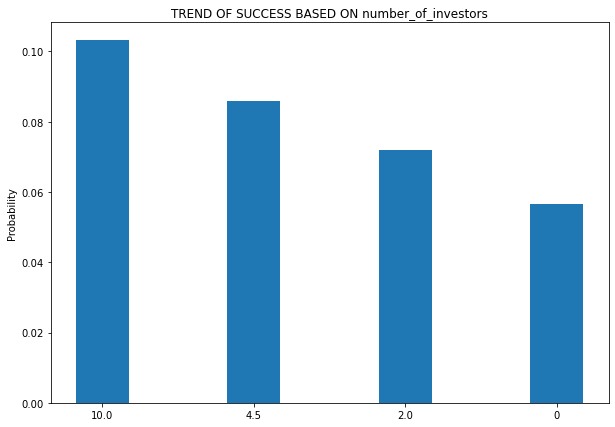

In [59]:
#Number of investors grouping
number_of_investors_success_quantiles = (np.percentile(df_All_Companies_merged['number_of_investors'][(np.isnan(df_All_Companies_merged['number_of_investors']) == False) & (df_All_Companies_merged['success_flag'] == 1)], [0, 25, 50, 75, 100]))
number_of_investors_unsuccessful_quantiles = (np.percentile(df_All_Companies_merged['number_of_investors'][(np.isnan(df_All_Companies_merged['number_of_investors']) == False) & (df_All_Companies_merged['success_flag'] == 0)], [0, 25, 50, 75, 100]))
df_All_Companies_merged['number_of_investors_grouping_scaling'] = float('nan')

boundaries = [number_of_investors_success_quantiles[4] + 1, 
              number_of_investors_success_quantiles[3], 
              number_of_investors_success_quantiles[2], 
              number_of_investors_unsuccessful_quantiles[2],
              0]
grouping_scale = [3,2,1,0]
for idx in range(len(boundaries) - 1):
    df_All_Companies_merged.loc[ (df_All_Companies_merged['number_of_investors'] >= boundaries[idx + 1]) & ( df_All_Companies_merged['number_of_investors'] < boundaries[idx]) ,'number_of_investors_grouping_scaling'] = grouping_scale[idx]

    
corr_params = ['number_of_investors_grouping_scaling','number_of_investors']
for param in corr_params:
    var1 = df_All_Companies_merged[param][(np.isnan(df_All_Companies_merged[param]) == False)] 
    var2 = df_All_Companies_merged['success_flag'][(np.isnan(df_All_Companies_merged[param]) == False)] 
    print('The correlation between {} and {}: {}'.format('Success',param,var1.corr(var2)))

bar_plot_data_1 = [len(df_All_Companies_merged['number_of_investors_grouping_scaling'][(np.isnan(df_All_Companies_merged['number_of_investors_grouping_scaling']) == False) & (df_All_Companies_merged['number_of_investors'] >= rank) & (df_All_Companies_merged['success_flag'] == 1)]) for rank in boundaries[1:]]
bar_plot_data_2 = [len(df_All_Companies_merged['number_of_investors_grouping_scaling'][(np.isnan(df_All_Companies_merged['number_of_investors_grouping_scaling']) == False) & (df_All_Companies_merged['number_of_investors'] >= rank)]) for rank in boundaries[1:]]
bar_plot_data = np.array(bar_plot_data_1)/ np.array(bar_plot_data_2)
print(bar_plot_data_2)

ind = np.arange(len(boundaries[1:]))  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, bar_plot_data, width)
 
plt.ylabel('Probability')
plt.title('TREND OF SUCCESS BASED ON number_of_investors')
plt.xticks(ind, boundaries[1:])

 
plt.show()

The correlation between Success and number_of_investors_binary_grouping_scaling: 0.08727660697858454
The correlation between Success and number_of_investors: 0.1018133121381503
[1542, 9812]


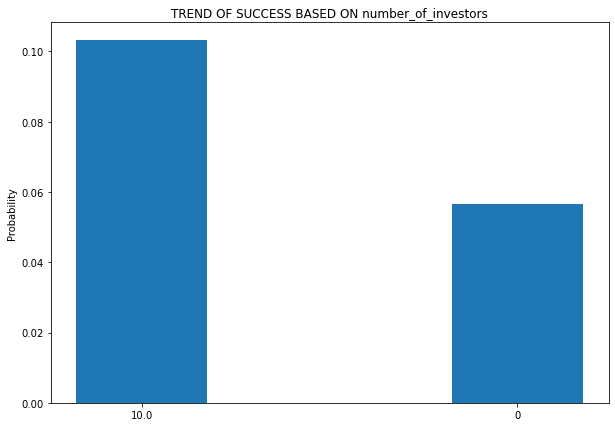

In [60]:
#Number of investors binary grouping
number_of_investors_success_quantiles = (np.percentile(df_All_Companies_merged['number_of_investors'][(np.isnan(df_All_Companies_merged['number_of_investors']) == False) & (df_All_Companies_merged['success_flag'] == 1)], [0, 25, 50, 75, 100]))
number_of_investors_unsuccessful_quantiles = (np.percentile(df_All_Companies_merged['number_of_investors'][(np.isnan(df_All_Companies_merged['number_of_investors']) == False) & (df_All_Companies_merged['success_flag'] == 0)], [0, 25, 50, 75, 100]))
df_All_Companies_merged['number_of_investors_binary_grouping_scaling'] = float('nan')

boundaries = [number_of_investors_success_quantiles[4] + 1, 
              number_of_investors_success_quantiles[3], 
              0]
grouping_scale = [1,0]
for idx in range(len(boundaries) - 1):
    df_All_Companies_merged.loc[ (df_All_Companies_merged['number_of_investors'] >= boundaries[idx + 1]) & ( df_All_Companies_merged['number_of_investors'] < boundaries[idx]) ,'number_of_investors_binary_grouping_scaling'] = grouping_scale[idx]

    
corr_params = ['number_of_investors_binary_grouping_scaling','number_of_investors']
for param in corr_params:
    var1 = df_All_Companies_merged[param][(np.isnan(df_All_Companies_merged[param]) == False)] 
    var2 = df_All_Companies_merged['success_flag'][(np.isnan(df_All_Companies_merged[param]) == False)] 
    print('The correlation between {} and {}: {}'.format('Success',param,var1.corr(var2)))

bar_plot_data_1 = [len(df_All_Companies_merged['number_of_investors_binary_grouping_scaling'][(np.isnan(df_All_Companies_merged['number_of_investors_binary_grouping_scaling']) == False) & (df_All_Companies_merged['number_of_investors'] >= rank) & (df_All_Companies_merged['success_flag'] == 1)]) for rank in boundaries[1:]]
bar_plot_data_2 = [len(df_All_Companies_merged['number_of_investors_binary_grouping_scaling'][(np.isnan(df_All_Companies_merged['number_of_investors_binary_grouping_scaling']) == False) & (df_All_Companies_merged['number_of_investors'] >= rank)]) for rank in boundaries[1:]]
bar_plot_data = np.array(bar_plot_data_1)/ np.array(bar_plot_data_2)
print(bar_plot_data_2)

ind = np.arange(len(boundaries[1:]))  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, bar_plot_data, width)
 
plt.ylabel('Probability')
plt.title('TREND OF SUCCESS BASED ON number_of_investors')
plt.xticks(ind, boundaries[1:])

 
plt.show()

The correlation between Success and number_of_founders_grouping_scaling: 0.09341058170031104
The correlation between Success and number_of_founders: 0.08579609270087267
[2089, 6997, 6997, 12158]


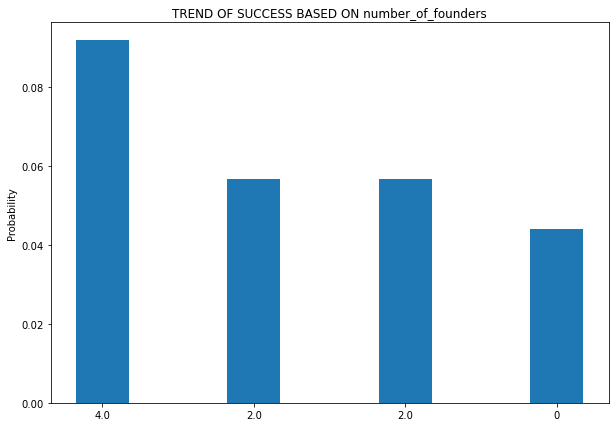

In [61]:
#Number of founders grouping
number_of_founders_success_quantiles = (np.percentile(df_All_Companies_merged['number_of_founders'][(np.isnan(df_All_Companies_merged['number_of_founders']) == False) & (df_All_Companies_merged['success_flag'] == 1)], [0, 25, 50, 75, 100]))
number_of_founders_unsuccessful_quantiles = (np.percentile(df_All_Companies_merged['number_of_founders'][(np.isnan(df_All_Companies_merged['number_of_founders']) == False) & (df_All_Companies_merged['success_flag'] == 0)], [0, 25, 50, 75, 100]))
df_All_Companies_merged['number_of_founders_grouping_scaling'] = float('nan')

boundaries = [number_of_founders_success_quantiles[4] + 1, 
              number_of_founders_success_quantiles[3], 
              number_of_founders_success_quantiles[2], 
              number_of_founders_unsuccessful_quantiles[2],
              0]
grouping_scale = [3,2,1,0]
for idx in range(len(boundaries) - 1):
    df_All_Companies_merged.loc[ (df_All_Companies_merged['number_of_founders'] >= boundaries[idx + 1]) & ( df_All_Companies_merged['number_of_founders'] < boundaries[idx]) ,'number_of_founders_grouping_scaling'] = grouping_scale[idx]

    
corr_params = ['number_of_founders_grouping_scaling','number_of_founders']
for param in corr_params:
    var1 = df_All_Companies_merged[param][(np.isnan(df_All_Companies_merged[param]) == False)] 
    var2 = df_All_Companies_merged['success_flag'][(np.isnan(df_All_Companies_merged[param]) == False)] 
    print('The correlation between {} and {}: {}'.format('Success',param,var1.corr(var2)))  

bar_plot_data_1 = [len(df_All_Companies_merged['number_of_founders_grouping_scaling'][(np.isnan(df_All_Companies_merged['number_of_founders_grouping_scaling']) == False) & (df_All_Companies_merged['number_of_founders'] >= rank) & (df_All_Companies_merged['success_flag'] == 1)]) for rank in boundaries[1:]]
bar_plot_data_2 = [len(df_All_Companies_merged['number_of_founders_grouping_scaling'][(np.isnan(df_All_Companies_merged['number_of_founders_grouping_scaling']) == False) & (df_All_Companies_merged['number_of_founders'] >= rank)]) for rank in boundaries[1:]]
bar_plot_data = np.array(bar_plot_data_1)/ np.array(bar_plot_data_2)
print(bar_plot_data_2)

ind = np.arange(len(boundaries[1:]))  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, bar_plot_data, width)
 
plt.ylabel('Probability')
plt.title('TREND OF SUCCESS BASED ON number_of_founders')
plt.xticks(ind, boundaries[1:])

 
plt.show()

The correlation between Success and number_of_founders_binary_grouping_scaling: 0.10611077776032635
The correlation between Success and number_of_founders: 0.08579609270087267
[2089, 12158]


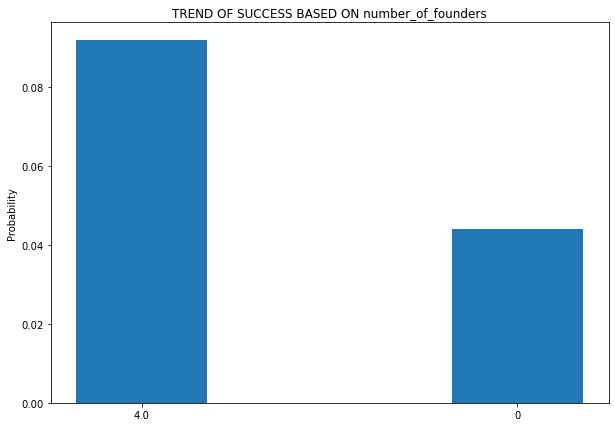

In [62]:
#Number of founders binary grouping
number_of_founders_success_quantiles = (np.percentile(df_All_Companies_merged['number_of_founders'][(np.isnan(df_All_Companies_merged['number_of_founders']) == False) & (df_All_Companies_merged['success_flag'] == 1)], [0, 25, 50, 75, 100]))
number_of_founders_unsuccessful_quantiles = (np.percentile(df_All_Companies_merged['number_of_founders'][(np.isnan(df_All_Companies_merged['number_of_founders']) == False) & (df_All_Companies_merged['success_flag'] == 0)], [0, 25, 50, 75, 100]))
df_All_Companies_merged['number_of_founders_binary_grouping_scaling'] = float('nan')

boundaries = [number_of_founders_success_quantiles[4] + 1, 
              number_of_founders_success_quantiles[3], 
              0]
grouping_scale = [3,2,1,0]
for idx in range(len(boundaries) - 1):
    df_All_Companies_merged.loc[ (df_All_Companies_merged['number_of_founders'] >= boundaries[idx + 1]) & ( df_All_Companies_merged['number_of_founders'] < boundaries[idx]) ,'number_of_founders_binary_grouping_scaling'] = grouping_scale[idx]

    
corr_params = ['number_of_founders_binary_grouping_scaling','number_of_founders']
for param in corr_params:
    var1 = df_All_Companies_merged[param][(np.isnan(df_All_Companies_merged[param]) == False)] 
    var2 = df_All_Companies_merged['success_flag'][(np.isnan(df_All_Companies_merged[param]) == False)] 
    print('The correlation between {} and {}: {}'.format('Success',param,var1.corr(var2)))

bar_plot_data_1 = [len(df_All_Companies_merged['number_of_founders_binary_grouping_scaling'][(np.isnan(df_All_Companies_merged['number_of_founders_binary_grouping_scaling']) == False) & (df_All_Companies_merged['number_of_founders'] >= rank) & (df_All_Companies_merged['success_flag'] == 1)]) for rank in boundaries[1:]]
bar_plot_data_2 = [len(df_All_Companies_merged['number_of_founders_binary_grouping_scaling'][(np.isnan(df_All_Companies_merged['number_of_founders_binary_grouping_scaling']) == False) & (df_All_Companies_merged['number_of_founders'] >= rank)]) for rank in boundaries[1:]]
bar_plot_data = np.array(bar_plot_data_1)/ np.array(bar_plot_data_2)
print(bar_plot_data_2)

ind = np.arange(len(boundaries[1:]))  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, bar_plot_data, width)
 
plt.ylabel('Probability')
plt.title('TREND OF SUCCESS BASED ON number_of_founders')
plt.xticks(ind, boundaries[1:])

 
plt.show()

The correlation between Success and number_of_prev_title_of_founders_grouping_scaling: 0.13012456183008506
The correlation between Success and number_of_prev_title_of_founders: 0.09062780802918616
[1832, 5072, 11740, 22457]


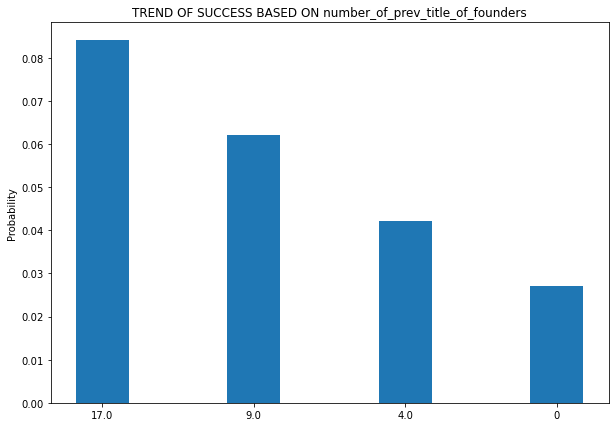

In [63]:
#Number of previous titles of founders grouping
number_of_prev_title_of_founders_success_quantiles = (np.percentile(df_All_Companies_merged['number_of_prev_title_of_founders'][(np.isnan(df_All_Companies_merged['number_of_prev_title_of_founders']) == False) & (df_All_Companies_merged['success_flag'] == 1)], [0, 25, 50, 75, 100]))
number_of_prev_title_of_founders_unsuccessful_quantiles = (np.percentile(df_All_Companies_merged['number_of_prev_title_of_founders'][(np.isnan(df_All_Companies_merged['number_of_prev_title_of_founders']) == False) & (df_All_Companies_merged['success_flag'] == 0)], [0, 25, 50, 75, 100]))
df_All_Companies_merged['number_of_prev_title_of_founders_grouping_scaling'] = float('nan')

boundaries = [number_of_prev_title_of_founders_success_quantiles[4] + 1, 
              number_of_prev_title_of_founders_success_quantiles[3], 
              number_of_prev_title_of_founders_success_quantiles[2], 
              number_of_prev_title_of_founders_unsuccessful_quantiles[2],
              0]
grouping_scale = [3,2,1,0]
for idx in range(len(boundaries) - 1):
    df_All_Companies_merged.loc[ (df_All_Companies_merged['number_of_prev_title_of_founders'] >= boundaries[idx + 1]) & ( df_All_Companies_merged['number_of_prev_title_of_founders'] < boundaries[idx]) ,'number_of_prev_title_of_founders_grouping_scaling'] = grouping_scale[idx]

    
corr_params = ['number_of_prev_title_of_founders_grouping_scaling','number_of_prev_title_of_founders']
for param in corr_params:
    var1 = df_All_Companies_merged[param][(np.isnan(df_All_Companies_merged[param]) == False)] 
    var2 = df_All_Companies_merged['success_flag'][(np.isnan(df_All_Companies_merged[param]) == False)] 
    print('The correlation between {} and {}: {}'.format('Success',param,var1.corr(var2))) 

bar_plot_data_1 = [len(df_All_Companies_merged['number_of_prev_title_of_founders_grouping_scaling'][(np.isnan(df_All_Companies_merged['number_of_prev_title_of_founders_grouping_scaling']) == False) & (df_All_Companies_merged['number_of_prev_title_of_founders'] >= rank) & (df_All_Companies_merged['success_flag'] == 1)]) for rank in boundaries[1:]]
bar_plot_data_2 = [len(df_All_Companies_merged['number_of_prev_title_of_founders_grouping_scaling'][(np.isnan(df_All_Companies_merged['number_of_prev_title_of_founders_grouping_scaling']) == False) & (df_All_Companies_merged['number_of_prev_title_of_founders'] >= rank)]) for rank in boundaries[1:]]
bar_plot_data = np.array(bar_plot_data_1)/ np.array(bar_plot_data_2)
print(bar_plot_data_2)

ind = np.arange(len(boundaries[1:]))  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, bar_plot_data, width)
 
plt.ylabel('Probability')
plt.title('TREND OF SUCCESS BASED ON number_of_prev_title_of_founders')
plt.xticks(ind, boundaries[1:])

 
plt.show()

The correlation between Success and number_of_prev_title_of_founders_binary_grouping_scaling: 0.1041522763413511
The correlation between Success and number_of_prev_title_of_founders: 0.09062780802918616
[1832, 22457]


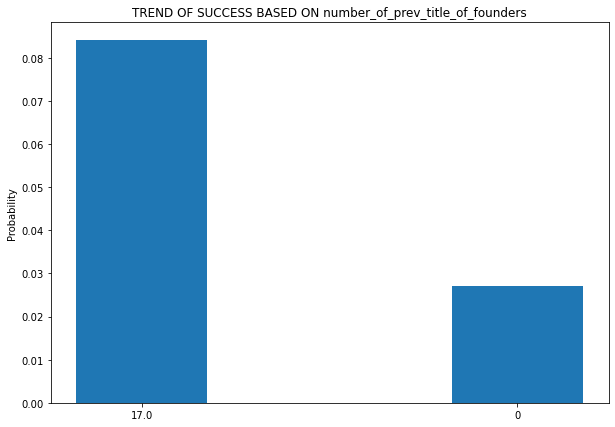

In [64]:
#Number of previous titles of founders binary grouping
number_of_prev_title_of_founders_success_quantiles = (np.percentile(df_All_Companies_merged['number_of_prev_title_of_founders'][(np.isnan(df_All_Companies_merged['number_of_prev_title_of_founders']) == False) & (df_All_Companies_merged['success_flag'] == 1)], [0, 25, 50, 75, 100]))
number_of_prev_title_of_founders_unsuccessful_quantiles = (np.percentile(df_All_Companies_merged['number_of_prev_title_of_founders'][(np.isnan(df_All_Companies_merged['number_of_prev_title_of_founders']) == False) & (df_All_Companies_merged['success_flag'] == 0)], [0, 25, 50, 75, 100]))
df_All_Companies_merged['number_of_prev_title_of_founders_binary_grouping_scaling'] = float('nan')

boundaries = [number_of_prev_title_of_founders_success_quantiles[4] + 1, 
              number_of_prev_title_of_founders_success_quantiles[3], 
              0]
grouping_scale = [1,0]
for idx in range(len(boundaries) - 1):
    df_All_Companies_merged.loc[ (df_All_Companies_merged['number_of_prev_title_of_founders'] >= boundaries[idx + 1]) & ( df_All_Companies_merged['number_of_prev_title_of_founders'] < boundaries[idx]) ,'number_of_prev_title_of_founders_binary_grouping_scaling'] = grouping_scale[idx]

    
corr_params = ['number_of_prev_title_of_founders_binary_grouping_scaling','number_of_prev_title_of_founders']
for param in corr_params:
    var1 = df_All_Companies_merged[param][(np.isnan(df_All_Companies_merged[param]) == False)] 
    var2 = df_All_Companies_merged['success_flag'][(np.isnan(df_All_Companies_merged[param]) == False)] 
    print('The correlation between {} and {}: {}'.format('Success',param,var1.corr(var2)))

bar_plot_data_1 = [len(df_All_Companies_merged['number_of_prev_title_of_founders_binary_grouping_scaling'][(np.isnan(df_All_Companies_merged['number_of_prev_title_of_founders_binary_grouping_scaling']) == False) & (df_All_Companies_merged['number_of_prev_title_of_founders'] >= rank) & (df_All_Companies_merged['success_flag'] == 1)]) for rank in boundaries[1:]]
bar_plot_data_2 = [len(df_All_Companies_merged['number_of_prev_title_of_founders_binary_grouping_scaling'][(np.isnan(df_All_Companies_merged['number_of_prev_title_of_founders_binary_grouping_scaling']) == False) & (df_All_Companies_merged['number_of_prev_title_of_founders'] >= rank)]) for rank in boundaries[1:]]
bar_plot_data = np.array(bar_plot_data_1)/ np.array(bar_plot_data_2)
print(bar_plot_data_2)

ind = np.arange(len(boundaries[1:]))  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, bar_plot_data, width)
 
plt.ylabel('Probability')
plt.title('TREND OF SUCCESS BASED ON number_of_prev_title_of_founders')
plt.xticks(ind, boundaries[1:])

 
plt.show()

The correlation between Success and managerial_flag_number_of_prev_title_of_founders_grouping_scaling: 0.12937199707172659
The correlation between Success and managerial_flag_number_of_prev_title_of_founders: 0.10176025013327912
[1729, 5314, 13215, 22452]


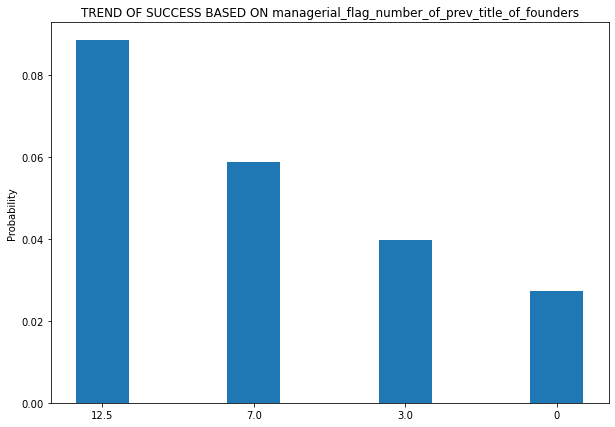

In [65]:
#Number of previous managerial titles of founders grouping
managerial_flag_number_of_prev_title_of_founders_success_quantiles = (np.percentile(df_All_Companies_merged['managerial_flag_number_of_prev_title_of_founders'][(np.isnan(df_All_Companies_merged['managerial_flag_number_of_prev_title_of_founders']) == False) & (df_All_Companies_merged['success_flag'] == 1)], [0, 25, 50, 75, 100]))
managerial_flag_number_of_prev_title_of_founders_unsuccessful_quantiles = (np.percentile(df_All_Companies_merged['managerial_flag_number_of_prev_title_of_founders'][(np.isnan(df_All_Companies_merged['managerial_flag_number_of_prev_title_of_founders']) == False) & (df_All_Companies_merged['success_flag'] == 0)], [0, 25, 50, 75, 100]))
df_All_Companies_merged['managerial_flag_number_of_prev_title_of_founders_grouping_scaling'] = float('nan')

boundaries = [managerial_flag_number_of_prev_title_of_founders_success_quantiles[4] + 1, 
              managerial_flag_number_of_prev_title_of_founders_success_quantiles[3], 
              managerial_flag_number_of_prev_title_of_founders_success_quantiles[2], 
              managerial_flag_number_of_prev_title_of_founders_unsuccessful_quantiles[2],
              0]
grouping_scale = [3,2,1,0]
for idx in range(len(boundaries) - 1):
    df_All_Companies_merged.loc[ (df_All_Companies_merged['managerial_flag_number_of_prev_title_of_founders'] >= boundaries[idx + 1]) & ( df_All_Companies_merged['managerial_flag_number_of_prev_title_of_founders'] < boundaries[idx]) ,'managerial_flag_number_of_prev_title_of_founders_grouping_scaling'] = grouping_scale[idx]

    
corr_params = ['managerial_flag_number_of_prev_title_of_founders_grouping_scaling','managerial_flag_number_of_prev_title_of_founders']
for param in corr_params:
    var1 = df_All_Companies_merged[param][(np.isnan(df_All_Companies_merged[param]) == False)] 
    var2 = df_All_Companies_merged['success_flag'][(np.isnan(df_All_Companies_merged[param]) == False)] 
    print('The correlation between {} and {}: {}'.format('Success',param,var1.corr(var2)))

bar_plot_data_1 = [len(df_All_Companies_merged['managerial_flag_number_of_prev_title_of_founders_grouping_scaling'][(np.isnan(df_All_Companies_merged['managerial_flag_number_of_prev_title_of_founders_grouping_scaling']) == False) & (df_All_Companies_merged['managerial_flag_number_of_prev_title_of_founders'] >= rank) & (df_All_Companies_merged['success_flag'] == 1)]) for rank in boundaries[1:]]
bar_plot_data_2 = [len(df_All_Companies_merged['managerial_flag_number_of_prev_title_of_founders_grouping_scaling'][(np.isnan(df_All_Companies_merged['managerial_flag_number_of_prev_title_of_founders_grouping_scaling']) == False) & (df_All_Companies_merged['managerial_flag_number_of_prev_title_of_founders'] >= rank)]) for rank in boundaries[1:]]
bar_plot_data = np.array(bar_plot_data_1)/ np.array(bar_plot_data_2)
print(bar_plot_data_2)

ind = np.arange(len(boundaries[1:]))  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, bar_plot_data, width)
 
plt.ylabel('Probability')
plt.title('TREND OF SUCCESS BASED ON managerial_flag_number_of_prev_title_of_founders')
plt.xticks(ind, boundaries[1:])

 
plt.show()

The correlation between Success and managerial_flag_number_of_prev_title_of_founders_binary_grouping_scaling: 0.10878418268613227
The correlation between Success and managerial_flag_number_of_prev_title_of_founders: 0.10176025013327912
[1729, 22452]


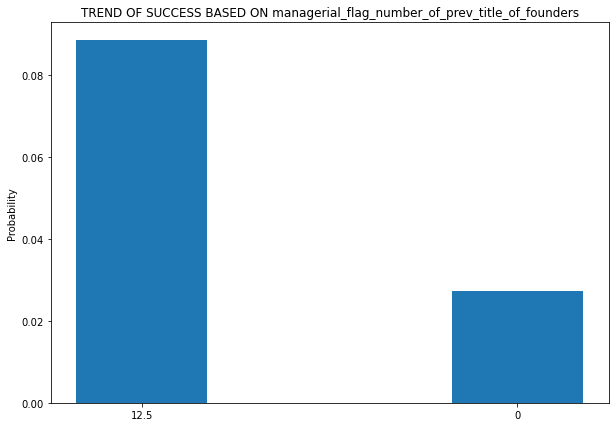

In [66]:
#Number of previous managerial titles of founders binary grouping
managerial_flag_number_of_prev_title_of_founders_success_quantiles = (np.percentile(df_All_Companies_merged['managerial_flag_number_of_prev_title_of_founders'][(np.isnan(df_All_Companies_merged['managerial_flag_number_of_prev_title_of_founders']) == False) & (df_All_Companies_merged['success_flag'] == 1)], [0, 25, 50, 75, 100]))
managerial_flag_number_of_prev_title_of_founders_unsuccessful_quantiles = (np.percentile(df_All_Companies_merged['managerial_flag_number_of_prev_title_of_founders'][(np.isnan(df_All_Companies_merged['managerial_flag_number_of_prev_title_of_founders']) == False) & (df_All_Companies_merged['success_flag'] == 0)], [0, 25, 50, 75, 100]))
df_All_Companies_merged['managerial_flag_number_of_prev_title_of_founders_binary_grouping_scaling'] = float('nan')

boundaries = [managerial_flag_number_of_prev_title_of_founders_success_quantiles[4] + 1, 
              managerial_flag_number_of_prev_title_of_founders_success_quantiles[3], 
              0]
grouping_scale = [3,2,1,0]
for idx in range(len(boundaries) - 1):
    df_All_Companies_merged.loc[ (df_All_Companies_merged['managerial_flag_number_of_prev_title_of_founders'] >= boundaries[idx + 1]) & ( df_All_Companies_merged['managerial_flag_number_of_prev_title_of_founders'] < boundaries[idx]) ,'managerial_flag_number_of_prev_title_of_founders_binary_grouping_scaling'] = grouping_scale[idx]

    
corr_params = ['managerial_flag_number_of_prev_title_of_founders_binary_grouping_scaling','managerial_flag_number_of_prev_title_of_founders']
for param in corr_params:
    var1 = df_All_Companies_merged[param][(np.isnan(df_All_Companies_merged[param]) == False)] 
    var2 = df_All_Companies_merged['success_flag'][(np.isnan(df_All_Companies_merged[param]) == False)] 
    print('The correlation between {} and {}: {}'.format('Success',param,var1.corr(var2)))


bar_plot_data_1 = [len(df_All_Companies_merged['managerial_flag_number_of_prev_title_of_founders_binary_grouping_scaling'][(np.isnan(df_All_Companies_merged['managerial_flag_number_of_prev_title_of_founders_binary_grouping_scaling']) == False) & (df_All_Companies_merged['managerial_flag_number_of_prev_title_of_founders'] >= rank) & (df_All_Companies_merged['success_flag'] == 1)]) for rank in boundaries[1:]]
bar_plot_data_2 = [len(df_All_Companies_merged['managerial_flag_number_of_prev_title_of_founders_binary_grouping_scaling'][(np.isnan(df_All_Companies_merged['managerial_flag_number_of_prev_title_of_founders_binary_grouping_scaling']) == False) & (df_All_Companies_merged['managerial_flag_number_of_prev_title_of_founders'] >= rank)]) for rank in boundaries[1:]]
bar_plot_data = np.array(bar_plot_data_1)/ np.array(bar_plot_data_2)
print(bar_plot_data_2)

ind = np.arange(len(boundaries[1:]))  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, bar_plot_data, width)
 
plt.ylabel('Probability')
plt.title('TREND OF SUCCESS BASED ON managerial_flag_number_of_prev_title_of_founders')
plt.xticks(ind, boundaries[1:])

 
plt.show()

The correlation between Success and average_investor_success_grouping_scaling: 0.4731829464171229
The correlation between Success and average_investor_success: 0.758644649921131
[143, 329, 5237, 9812]


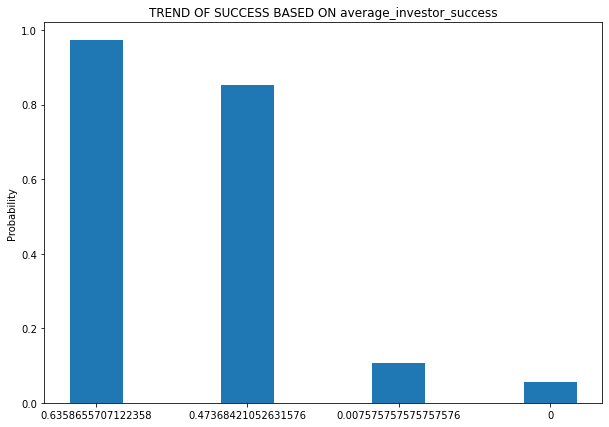

In [67]:
#average_investor_success grouping
average_investor_success_success_quantiles = (np.percentile(df_All_Companies_merged['average_investor_success'][(np.isnan(df_All_Companies_merged['average_investor_success']) == False) & (df_All_Companies_merged['success_flag'] == 1)], [0, 25, 50, 75, 100]))
average_investor_success_unsuccessful_quantiles = (np.percentile(df_All_Companies_merged['average_investor_success'][(np.isnan(df_All_Companies_merged['average_investor_success']) == False) & (df_All_Companies_merged['success_flag'] == 0)], [0, 25, 50, 75, 100]))
df_All_Companies_merged['average_investor_success_grouping_scaling'] = float('nan')

boundaries = [average_investor_success_success_quantiles[4] + 1, 
              average_investor_success_success_quantiles[3], 
              average_investor_success_success_quantiles[2], 
              average_investor_success_unsuccessful_quantiles[2],
              0]
grouping_scale = [3,2,1,0]
for idx in range(len(boundaries) - 1):
    df_All_Companies_merged.loc[ (df_All_Companies_merged['average_investor_success'] >= boundaries[idx + 1]) & ( df_All_Companies_merged['average_investor_success'] < boundaries[idx]) ,'average_investor_success_grouping_scaling'] = grouping_scale[idx]

    
corr_params = ['average_investor_success_grouping_scaling','average_investor_success']
for param in corr_params:
    var1 = df_All_Companies_merged[param][(np.isnan(df_All_Companies_merged[param]) == False)] 
    var2 = df_All_Companies_merged['success_flag'][(np.isnan(df_All_Companies_merged[param]) == False)] 
    print('The correlation between {} and {}: {}'.format('Success',param,var1.corr(var2)))

bar_plot_data_1 = [len(df_All_Companies_merged['average_investor_success_grouping_scaling'][(np.isnan(df_All_Companies_merged['average_investor_success_grouping_scaling']) == False) & (df_All_Companies_merged['average_investor_success'] >= rank) & (df_All_Companies_merged['success_flag'] == 1)]) for rank in boundaries[1:]]
bar_plot_data_2 = [len(df_All_Companies_merged['average_investor_success_grouping_scaling'][(np.isnan(df_All_Companies_merged['average_investor_success_grouping_scaling']) == False) & (df_All_Companies_merged['average_investor_success'] >= rank)]) for rank in boundaries[1:]]
bar_plot_data = np.array(bar_plot_data_1)/ np.array(bar_plot_data_2)
print(bar_plot_data_2)

ind = np.arange(len(boundaries[1:]))  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, bar_plot_data, width)
 
plt.ylabel('Probability')
plt.title('TREND OF SUCCESS BASED ON average_investor_success')
plt.xticks(ind, boundaries[1:])

 
plt.show()

The correlation between Success and average_investor_success_binary_grouping_scaling: 0.6412376147557113
The correlation between Success and average_investor_success: 0.758644649921131
[329, 9812]


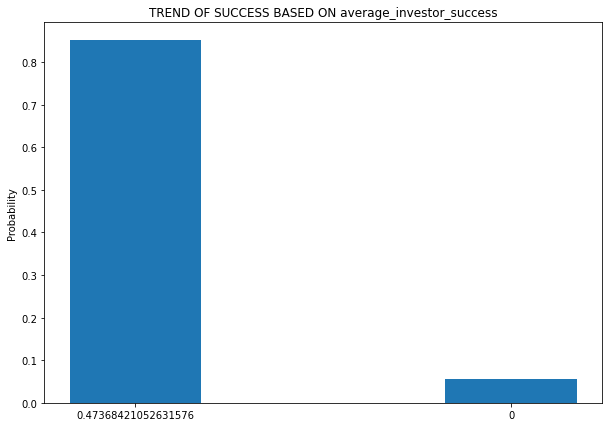

In [68]:
#average_investor_success binary grouping
average_investor_success_success_quantiles = (np.percentile(df_All_Companies_merged['average_investor_success'][(np.isnan(df_All_Companies_merged['average_investor_success']) == False) & (df_All_Companies_merged['success_flag'] == 1)], [0, 25, 50, 75, 100]))
average_investor_success_unsuccessful_quantiles = (np.percentile(df_All_Companies_merged['average_investor_success'][(np.isnan(df_All_Companies_merged['average_investor_success']) == False) & (df_All_Companies_merged['success_flag'] == 0)], [0, 25, 50, 75, 100]))
df_All_Companies_merged['average_investor_success_binary_grouping_scaling'] = float('nan')

boundaries = [average_investor_success_success_quantiles[4] + 1, 
              average_investor_success_success_quantiles[2], 
              0]
grouping_scale = [1,0]
for idx in range(len(boundaries) - 1):
    df_All_Companies_merged.loc[ (df_All_Companies_merged['average_investor_success'] >= boundaries[idx + 1]) & ( df_All_Companies_merged['average_investor_success'] < boundaries[idx]) ,'average_investor_success_binary_grouping_scaling'] = grouping_scale[idx]

    
corr_params = ['average_investor_success_binary_grouping_scaling','average_investor_success']
for param in corr_params:
    var1 = df_All_Companies_merged[param][(np.isnan(df_All_Companies_merged[param]) == False)] 
    var2 = df_All_Companies_merged['success_flag'][(np.isnan(df_All_Companies_merged[param]) == False)] 
    print('The correlation between {} and {}: {}'.format('Success',param,var1.corr(var2)))

bar_plot_data_1 = [len(df_All_Companies_merged['average_investor_success_binary_grouping_scaling'][(np.isnan(df_All_Companies_merged['average_investor_success_binary_grouping_scaling']) == False) & (df_All_Companies_merged['average_investor_success'] >= rank) & (df_All_Companies_merged['success_flag'] == 1)]) for rank in boundaries[1:]]
bar_plot_data_2 = [len(df_All_Companies_merged['average_investor_success_binary_grouping_scaling'][(np.isnan(df_All_Companies_merged['average_investor_success_binary_grouping_scaling']) == False) & (df_All_Companies_merged['average_investor_success'] >= rank)]) for rank in boundaries[1:]]
bar_plot_data = np.array(bar_plot_data_1)/ np.array(bar_plot_data_2)
print(bar_plot_data_2)

ind = np.arange(len(boundaries[1:]))  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, bar_plot_data, width)
 
plt.ylabel('Probability')
plt.title('TREND OF SUCCESS BASED ON average_investor_success')
plt.xticks(ind, boundaries[1:])

 
plt.show()

The correlation between Success and founders_connectedness_factor_based_on_university_grouping_scaling: 0.06627304611219009
The correlation between Success and founders_connectedness_factor_based_on_university: 0.040677285686908114
[1658, 2472, 7000, 7000]


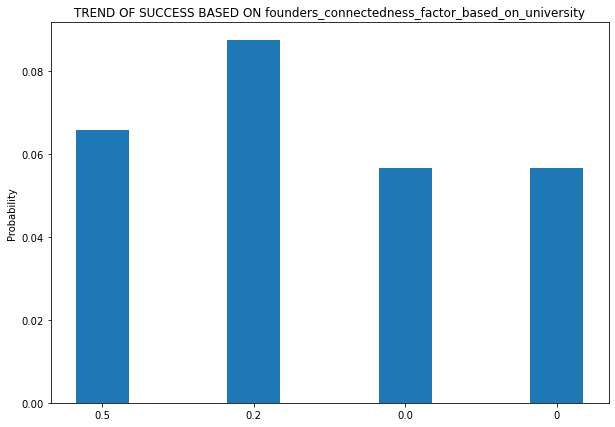

In [69]:
#founders_connectedness_factor_based_on_university grouping
founders_connectedness_factor_based_on_university_success_quantiles = (np.percentile(df_All_Companies_merged['founders_connectedness_factor_based_on_university'][(np.isnan(df_All_Companies_merged['founders_connectedness_factor_based_on_university']) == False) & (df_All_Companies_merged['success_flag'] == 1)], [0, 25, 50, 75, 100]))
founders_connectedness_factor_based_on_university_unsuccessful_quantiles = (np.percentile(df_All_Companies_merged['founders_connectedness_factor_based_on_university'][(np.isnan(df_All_Companies_merged['founders_connectedness_factor_based_on_university']) == False) & (df_All_Companies_merged['success_flag'] == 0)], [0, 25, 50, 75, 100]))
df_All_Companies_merged['founders_connectedness_factor_based_on_university_grouping_scaling'] = float('nan')

boundaries = [founders_connectedness_factor_based_on_university_success_quantiles[4] + 1, 
              founders_connectedness_factor_based_on_university_success_quantiles[3], 
              founders_connectedness_factor_based_on_university_success_quantiles[2], 
              founders_connectedness_factor_based_on_university_unsuccessful_quantiles[2],
              0]
grouping_scale = [3,2,1,0]
for idx in range(len(boundaries) - 1):
    df_All_Companies_merged.loc[ (df_All_Companies_merged['founders_connectedness_factor_based_on_university'] >= boundaries[idx + 1]) & ( df_All_Companies_merged['founders_connectedness_factor_based_on_university'] < boundaries[idx]) ,'founders_connectedness_factor_based_on_university_grouping_scaling'] = grouping_scale[idx]

    
corr_params = ['founders_connectedness_factor_based_on_university_grouping_scaling','founders_connectedness_factor_based_on_university']
for param in corr_params:
    var1 = df_All_Companies_merged[param][(np.isnan(df_All_Companies_merged[param]) == False)] 
    var2 = df_All_Companies_merged['success_flag'][(np.isnan(df_All_Companies_merged[param]) == False)] 
    print('The correlation between {} and {}: {}'.format('Success',param,var1.corr(var2)))

bar_plot_data_1 = [len(df_All_Companies_merged['founders_connectedness_factor_based_on_university_grouping_scaling'][(np.isnan(df_All_Companies_merged['founders_connectedness_factor_based_on_university_grouping_scaling']) == False) & (df_All_Companies_merged['founders_connectedness_factor_based_on_university'] >= rank) & (df_All_Companies_merged['success_flag'] == 1)]) for rank in boundaries[1:]]
bar_plot_data_2 = [len(df_All_Companies_merged['founders_connectedness_factor_based_on_university_grouping_scaling'][(np.isnan(df_All_Companies_merged['founders_connectedness_factor_based_on_university_grouping_scaling']) == False) & (df_All_Companies_merged['founders_connectedness_factor_based_on_university'] >= rank)]) for rank in boundaries[1:]]
bar_plot_data = np.array(bar_plot_data_1)/ np.array(bar_plot_data_2)
print(bar_plot_data_2)

ind = np.arange(len(boundaries[1:]))  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, bar_plot_data, width)
 
plt.ylabel('Probability')
plt.title('TREND OF SUCCESS BASED ON founders_connectedness_factor_based_on_university')
plt.xticks(ind, boundaries[1:])

 
plt.show()

The correlation between Success and founders_connectedness_factor_based_on_university_binary_grouping_scaling: 0.09795734306696716
The correlation between Success and founders_connectedness_factor_based_on_university: 0.040677285686908114
[2472, 7000]


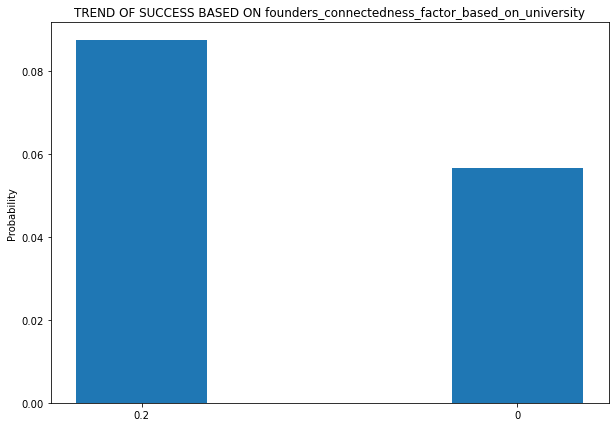

In [70]:
#founders_connectedness_factor_based_on_university binary grouping
founders_connectedness_factor_based_on_university_success_quantiles = (np.percentile(df_All_Companies_merged['founders_connectedness_factor_based_on_university'][(np.isnan(df_All_Companies_merged['founders_connectedness_factor_based_on_university']) == False) & (df_All_Companies_merged['success_flag'] == 1)], [0, 25, 50, 75, 100]))
founders_connectedness_factor_based_on_university_unsuccessful_quantiles = (np.percentile(df_All_Companies_merged['founders_connectedness_factor_based_on_university'][(np.isnan(df_All_Companies_merged['founders_connectedness_factor_based_on_university']) == False) & (df_All_Companies_merged['success_flag'] == 0)], [0, 25, 50, 75, 100]))
df_All_Companies_merged['founders_connectedness_factor_based_on_university_binary_grouping_scaling'] = float('nan')

boundaries = [founders_connectedness_factor_based_on_university_success_quantiles[4] + 1, 
              founders_connectedness_factor_based_on_university_success_quantiles[2],
              0]
grouping_scale = [1,0]
for idx in range(len(boundaries) - 1):
    df_All_Companies_merged.loc[ (df_All_Companies_merged['founders_connectedness_factor_based_on_university'] >= boundaries[idx + 1]) & ( df_All_Companies_merged['founders_connectedness_factor_based_on_university'] < boundaries[idx]) ,'founders_connectedness_factor_based_on_university_binary_grouping_scaling'] = grouping_scale[idx]

    
corr_params = ['founders_connectedness_factor_based_on_university_binary_grouping_scaling','founders_connectedness_factor_based_on_university']
for param in corr_params:
    var1 = df_All_Companies_merged[param][(np.isnan(df_All_Companies_merged[param]) == False)] 
    var2 = df_All_Companies_merged['success_flag'][(np.isnan(df_All_Companies_merged[param]) == False)] 
    print('The correlation between {} and {}: {}'.format('Success',param,var1.corr(var2)))

bar_plot_data_1 = [len(df_All_Companies_merged['founders_connectedness_factor_based_on_university_binary_grouping_scaling'][(np.isnan(df_All_Companies_merged['founders_connectedness_factor_based_on_university_binary_grouping_scaling']) == False) & (df_All_Companies_merged['founders_connectedness_factor_based_on_university'] >= rank) & (df_All_Companies_merged['success_flag'] == 1)]) for rank in boundaries[1:]]
bar_plot_data_2 = [len(df_All_Companies_merged['founders_connectedness_factor_based_on_university_binary_grouping_scaling'][(np.isnan(df_All_Companies_merged['founders_connectedness_factor_based_on_university_binary_grouping_scaling']) == False) & (df_All_Companies_merged['founders_connectedness_factor_based_on_university'] >= rank)]) for rank in boundaries[1:]]
bar_plot_data = np.array(bar_plot_data_1)/ np.array(bar_plot_data_2)
print(bar_plot_data_2)

ind = np.arange(len(boundaries[1:]))  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, bar_plot_data, width)
 
plt.ylabel('Probability')
plt.title('TREND OF SUCCESS BASED ON founders_connectedness_factor_based_on_university')
plt.xticks(ind, boundaries[1:])

 
plt.show()

The correlation between Success and best_score_universities_of_founders_grouping_scaling: 0.03242426325937218
The correlation between Success and best_score_universities_of_founders: 0.031827275492003405
[2408, 5390, 6155, 12170]


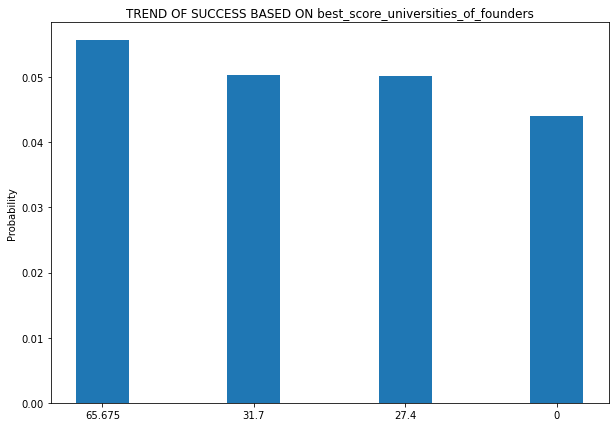

In [71]:
#founders_connectedness_factor_based_on_university grouping
best_score_universities_of_founders_success_quantiles = (np.percentile(df_All_Companies_merged['best_score_universities_of_founders'][(np.isnan(df_All_Companies_merged['best_score_universities_of_founders']) == False) & (df_All_Companies_merged['success_flag'] == 1)], [0, 25, 50, 75, 100]))
best_score_universities_of_founders_unsuccessful_quantiles = (np.percentile(df_All_Companies_merged['best_score_universities_of_founders'][(np.isnan(df_All_Companies_merged['best_score_universities_of_founders']) == False) & (df_All_Companies_merged['success_flag'] == 0)], [0, 25, 50, 75, 100]))
df_All_Companies_merged['best_score_universities_of_founders_grouping_scaling'] = float('nan')

boundaries = [best_score_universities_of_founders_success_quantiles[4] + 1, 
              best_score_universities_of_founders_success_quantiles[3], 
              best_score_universities_of_founders_success_quantiles[2], 
              best_score_universities_of_founders_unsuccessful_quantiles[2],
              0]
grouping_scale = [3,2,1,0]
for idx in range(len(boundaries) - 1):
    df_All_Companies_merged.loc[ (df_All_Companies_merged['best_score_universities_of_founders'] >= boundaries[idx + 1]) & ( df_All_Companies_merged['best_score_universities_of_founders'] < boundaries[idx]) ,'best_score_universities_of_founders_grouping_scaling'] = grouping_scale[idx]

    
corr_params = ['best_score_universities_of_founders_grouping_scaling','best_score_universities_of_founders']
for param in corr_params:
    var1 = df_All_Companies_merged[param][(np.isnan(df_All_Companies_merged[param]) == False)] 
    var2 = df_All_Companies_merged['success_flag'][(np.isnan(df_All_Companies_merged[param]) == False)] 
    print('The correlation between {} and {}: {}'.format('Success',param,var1.corr(var2)))

bar_plot_data_1 = [len(df_All_Companies_merged['best_score_universities_of_founders_grouping_scaling'][(np.isnan(df_All_Companies_merged['best_score_universities_of_founders_grouping_scaling']) == False) & (df_All_Companies_merged['best_score_universities_of_founders'] >= rank) & (df_All_Companies_merged['success_flag'] == 1)]) for rank in boundaries[1:]]
bar_plot_data_2 = [len(df_All_Companies_merged['best_score_universities_of_founders_grouping_scaling'][(np.isnan(df_All_Companies_merged['best_score_universities_of_founders_grouping_scaling']) == False) & (df_All_Companies_merged['best_score_universities_of_founders'] >= rank)]) for rank in boundaries[1:]]
bar_plot_data = np.array(bar_plot_data_1)/ np.array(bar_plot_data_2)
print(bar_plot_data_2)

ind = np.arange(len(boundaries[1:]))  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, bar_plot_data, width)
 
plt.ylabel('Probability')
plt.title('TREND OF SUCCESS BASED ON best_score_universities_of_founders')
plt.xticks(ind, boundaries[1:])

 
plt.show()

The correlation between Success and best_score_universities_of_founders_binary_grouping_scaling: 0.027095614704269005
The correlation between Success and best_score_universities_of_founders: 0.031827275492003405
[5390, 12170]


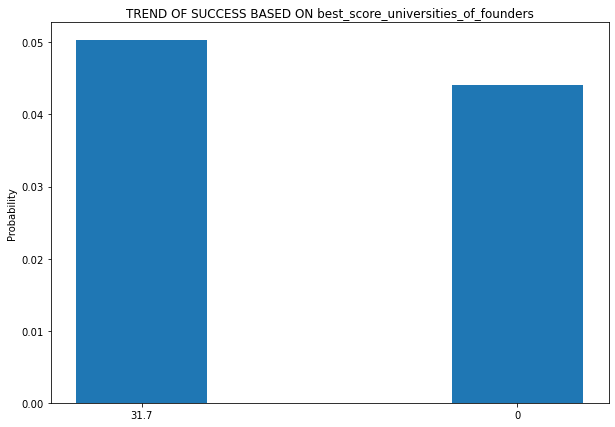

In [72]:
#founders_connectedness_factor_based_on_university grouping
best_score_universities_of_founders_success_quantiles = (np.percentile(df_All_Companies_merged['best_score_universities_of_founders'][(np.isnan(df_All_Companies_merged['best_score_universities_of_founders']) == False) & (df_All_Companies_merged['success_flag'] == 1)], [0, 25, 50, 75, 100]))
best_score_universities_of_founders_unsuccessful_quantiles = (np.percentile(df_All_Companies_merged['best_score_universities_of_founders'][(np.isnan(df_All_Companies_merged['best_score_universities_of_founders']) == False) & (df_All_Companies_merged['success_flag'] == 0)], [0, 25, 50, 75, 100]))
df_All_Companies_merged['best_score_universities_of_founders_binary_grouping_scaling'] = float('nan')

boundaries = [best_score_universities_of_founders_success_quantiles[4] + 1, 
              best_score_universities_of_founders_success_quantiles[2], 
              0]
grouping_scale = [1,0]
for idx in range(len(boundaries) - 1):
    df_All_Companies_merged.loc[ (df_All_Companies_merged['best_score_universities_of_founders'] >= boundaries[idx + 1]) & ( df_All_Companies_merged['best_score_universities_of_founders'] < boundaries[idx]) ,'best_score_universities_of_founders_binary_grouping_scaling'] = grouping_scale[idx]

    
corr_params = ['best_score_universities_of_founders_binary_grouping_scaling','best_score_universities_of_founders']
for param in corr_params:
    var1 = df_All_Companies_merged[param][(np.isnan(df_All_Companies_merged[param]) == False)] 
    var2 = df_All_Companies_merged['success_flag'][(np.isnan(df_All_Companies_merged[param]) == False)] 
    print('The correlation between {} and {}: {}'.format('Success',param,var1.corr(var2)))

bar_plot_data_1 = [len(df_All_Companies_merged['best_score_universities_of_founders_binary_grouping_scaling'][(np.isnan(df_All_Companies_merged['best_score_universities_of_founders_binary_grouping_scaling']) == False) & (df_All_Companies_merged['best_score_universities_of_founders'] >= rank) & (df_All_Companies_merged['success_flag'] == 1)]) for rank in boundaries[1:]]
bar_plot_data_2 = [len(df_All_Companies_merged['best_score_universities_of_founders_binary_grouping_scaling'][(np.isnan(df_All_Companies_merged['best_score_universities_of_founders_binary_grouping_scaling']) == False) & (df_All_Companies_merged['best_score_universities_of_founders'] >= rank)]) for rank in boundaries[1:]]
bar_plot_data = np.array(bar_plot_data_1)/ np.array(bar_plot_data_2)
print(bar_plot_data_2)

ind = np.arange(len(boundaries[1:]))  
width = 0.35 
 
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, bar_plot_data, width)
 
plt.ylabel('Probability')
plt.title('TREND OF SUCCESS BASED ON best_score_universities_of_founders')
plt.xticks(ind, boundaries[1:])

 
plt.show()

In [73]:
df_All_Companies_merged.columns

Index(['name', 'founded_year', 'country_code', 'city', 'category_list',
       'category_groups_list', 'universities_of_founders',
       'degrees_of_founders', 'subject_degrees_of_founders',
       'gender_of_founders', 'city_of_founders', 'prev_companies_of_founders',
       'prev_title_of_founders', 'investor_name', 'short_description',
       'description', 'success_flag', 'description_vectors',
       'short_description_vectors', 'number_of_founders',
       'number_of_male_founders', 'number_of_female_founders',
       'percentage_of_male_founders', 'number_of_investors',
       'average_investor_success', 'universities_of_founders_rankings',
       'best_ranking_universities_of_founders',
       'worse_ranking_university_of_founders',
       'average_ranking_university_of_founders',
       'percentage_of_founders_attended_university',
       'universities_of_founders_scores',
       'best_score_universities_of_founders',
       'worse_score_university_of_founders',
       'avera

In [74]:
top_10_categories = [x[1] for idx, x in enumerate(list_all_categories_and_count) if idx < 10]
top_10_investors = [x[1] for idx, x in enumerate(list_all_investor_names_and_count) if idx < 10]
top_10_category_groups = [x[1] for idx, x in enumerate(list_all_category_groups_and_count) if idx < 10]
top_10_previous_companies = [x[1] for idx, x in enumerate(list_all_prev_companies_of_founders_and_count) if ((idx < 11) and idx != 1)]


df_All_Companies_merged['top_10_categories_flag'] = float('nan')
df_All_Companies_merged['top_10_investors_flag'] = float('nan')
df_All_Companies_merged['top_10_category_groups_flag'] = float('nan')
df_All_Companies_merged['top_10_previous_companies_flag'] = float('nan')

columns_of_interest_names = ['category_list',
                             'investor_name',
                             'category_groups_list',
                             'prev_companies_of_founders']


columns_of_flags = ['top_10_categories_flag',
                    'top_10_investors_flag',
                    'top_10_category_groups_flag',
                    'top_10_previous_companies_flag']

for idx in range(len(df_All_Companies_merged.index)):
    for idx2, value in enumerate(columns_of_interest_names):
        if isinstance(df_All_Companies_merged.at[idx,value], str):
            flag = False
            for temp_name in top_10_categories:
                if temp_name in df_All_Companies_merged.at[idx,value]:
                    flag = True
                    break
            if flag:
                df_All_Companies_merged.at[idx, columns_of_flags[idx2]] = 1
            else: 
                df_All_Companies_merged.at[idx, columns_of_flags[idx2]] = 0

In [75]:
nan_values = [[df_All_Companies_merged[name].isna().sum() ,name] for name in df_All_Companies_merged.columns ]
nan_values.sort(reverse = True)
nan_values

[[39347, 'founders_connectedness_factor_based_on_university_grouping_scaling'],
 [39347,
  'founders_connectedness_factor_based_on_university_binary_grouping_scaling'],
 [39347, 'founders_connectedness_factor_based_on_university'],
 [36574, 'city_of_founders'],
 [36535, 'top_10_investors_flag'],
 [36535, 'number_of_investors_grouping_scaling'],
 [36535, 'number_of_investors_binary_grouping_scaling'],
 [36535, 'number_of_investors'],
 [36535, 'investor_name'],
 [36535, 'average_investor_success_grouping_scaling'],
 [36535, 'average_investor_success_binary_grouping_scaling'],
 [36535, 'average_investor_success'],
 [34651, 'subject_degrees_of_founders'],
 [34365, 'percentage_of_founders_with_a_degree'],
 [34356, 'worse_degree_of_founders'],
 [34356, 'degrees_of_founders_standardised_numbers'],
 [34356, 'degrees_of_founders_standardised'],
 [34356, 'degrees_of_founders'],
 [34356, 'best_degree_of_founders'],
 [34356, 'average_degree_of_founders_grouping_scaling'],
 [34356, 'average_degree_

In [76]:
'''
THIS WILL TRAIN A NEURAL NETWORK USING THE RAW DATA COLLATED WITH
1. UNIVERISITY RANKING SIGNAL
2. EXPERIENCE SIGNAL
3. CATEGORY OF STARTUP
'''
training_params_binary = ['number_of_founders',
                          'best_ranking_universities_of_founders',
                          'best_score_universities_of_founders',
                          'average_degree_of_founders',
                          'number_of_prev_title_of_founders',
                          'managerial_flag_number_of_prev_title_of_founders',
                          'top_10_categories_flag',
                          'top_10_category_groups_flag',
                          'top_10_previous_companies_flag',
                          'success_flag']

df_for_binary_model_training = df_All_Companies_merged[training_params_binary].copy()
df_for_binary_model_training = df_for_binary_model_training.dropna()
print('Size of data set is: ', len(df_for_binary_model_training.index))

y = df_for_binary_model_training.pop('success_flag').to_frame()
print('Size of successfulcompanies in set is: ', (np.sum(y.to_numpy())))
X = df_for_binary_model_training

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y,stratify=y, test_size=0.2)

X_train, X_test, y_train, y_test = X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()

number_of_classes = 1
number_of_features = X_train.shape[1]
model = Sequential()
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs= 500)

df_for_binary_model_training = df_All_Companies_merged[training_params_binary].copy()
df_for_binary_model_training = df_for_binary_model_training.dropna()
y = df_for_binary_model_training.pop('success_flag').to_frame()
X = df_for_binary_model_training
eval = model.evaluate(x=X.to_numpy(), y=y.to_numpy())
eval

Size of data set is:  11958
Size of successfulcompanies in set is:  507
Epoch 1/500
299/299 [==============================] - 1s 3ms/step - loss: 0.4353 - binary_accuracy: 0.9523 - val_loss: 0.1774 - val_binary_accuracy: 0.9578
Epoch 2/500
299/299 [==============================] - 1s 2ms/step - loss: 0.2070 - binary_accuracy: 0.9575 - val_loss: 0.1894 - val_binary_accuracy: 0.9578
Epoch 3/500
299/299 [==============================] - 1s 2ms/step - loss: 0.1920 - binary_accuracy: 0.9576 - val_loss: 0.1684 - val_binary_accuracy: 0.9578
Epoch 4/500
299/299 [==============================] - 1s 2ms/step - loss: 0.1809 - binary_accuracy: 0.9576 - val_loss: 0.2054 - val_binary_accuracy: 0.9578
Epoch 5/500
299/299 [==============================] - 1s 2ms/step - loss: 0.1826 - binary_accuracy: 0.9576 - val_loss: 0.1915 - val_binary_accuracy: 0.9578
Epoch 6/500
299/299 [==============================] - 1s 2ms/step - loss: 0.1816 - binary_accuracy: 0.9576 - val_loss: 0.1726 - val_binary_acc

Epoch 104/500
299/299 [==============================] - 1s 2ms/step - loss: 0.1606 - binary_accuracy: 0.9583 - val_loss: 0.1592 - val_binary_accuracy: 0.9569
Epoch 105/500
299/299 [==============================] - 1s 2ms/step - loss: 0.1627 - binary_accuracy: 0.9580 - val_loss: 0.1613 - val_binary_accuracy: 0.9578
Epoch 106/500
299/299 [==============================] - 1s 2ms/step - loss: 0.1613 - binary_accuracy: 0.9577 - val_loss: 0.1635 - val_binary_accuracy: 0.9578
Epoch 107/500
299/299 [==============================] - 1s 2ms/step - loss: 0.1611 - binary_accuracy: 0.9585 - val_loss: 0.1617 - val_binary_accuracy: 0.9578
Epoch 108/500
299/299 [==============================] - 1s 2ms/step - loss: 0.1608 - binary_accuracy: 0.9581 - val_loss: 0.1619 - val_binary_accuracy: 0.9578
Epoch 109/500
299/299 [==============================] - 1s 2ms/step - loss: 0.1604 - binary_accuracy: 0.9582 - val_loss: 0.1615 - val_binary_accuracy: 0.9578
Epoch 110/500
299/299 [=======================

299/299 [==============================] - 1s 2ms/step - loss: 0.1556 - binary_accuracy: 0.9595 - val_loss: 0.1626 - val_binary_accuracy: 0.9574
Epoch 207/500
299/299 [==============================] - 1s 2ms/step - loss: 0.1553 - binary_accuracy: 0.9596 - val_loss: 0.1629 - val_binary_accuracy: 0.9574
Epoch 208/500
299/299 [==============================] - 1s 2ms/step - loss: 0.1568 - binary_accuracy: 0.9598 - val_loss: 0.1623 - val_binary_accuracy: 0.9565
Epoch 209/500
299/299 [==============================] - 1s 2ms/step - loss: 0.1552 - binary_accuracy: 0.9594 - val_loss: 0.1660 - val_binary_accuracy: 0.9569
Epoch 210/500
299/299 [==============================] - 1s 2ms/step - loss: 0.1567 - binary_accuracy: 0.9585 - val_loss: 0.1605 - val_binary_accuracy: 0.9586
Epoch 211/500
299/299 [==============================] - 1s 2ms/step - loss: 0.1548 - binary_accuracy: 0.9598 - val_loss: 0.1661 - val_binary_accuracy: 0.9574
Epoch 212/500
299/299 [==============================] - 1s 

299/299 [==============================] - 1s 3ms/step - loss: 0.1546 - binary_accuracy: 0.9606 - val_loss: 0.1682 - val_binary_accuracy: 0.9569
Epoch 309/500
299/299 [==============================] - 1s 2ms/step - loss: 0.1503 - binary_accuracy: 0.9610 - val_loss: 0.1641 - val_binary_accuracy: 0.9582
Epoch 310/500
299/299 [==============================] - 1s 2ms/step - loss: 0.1534 - binary_accuracy: 0.9596 - val_loss: 0.1664 - val_binary_accuracy: 0.9561
Epoch 311/500
299/299 [==============================] - 1s 2ms/step - loss: 0.1530 - binary_accuracy: 0.9596 - val_loss: 0.1668 - val_binary_accuracy: 0.9590
Epoch 312/500
299/299 [==============================] - 1s 2ms/step - loss: 0.1523 - binary_accuracy: 0.9603 - val_loss: 0.1670 - val_binary_accuracy: 0.9578
Epoch 313/500
299/299 [==============================] - 1s 2ms/step - loss: 0.1511 - binary_accuracy: 0.9607 - val_loss: 0.1637 - val_binary_accuracy: 0.9586
Epoch 314/500
299/299 [==============================] - 1s 

299/299 [==============================] - 1s 2ms/step - loss: 0.1500 - binary_accuracy: 0.9610 - val_loss: 0.1676 - val_binary_accuracy: 0.9582
Epoch 411/500
299/299 [==============================] - 1s 2ms/step - loss: 0.1511 - binary_accuracy: 0.9605 - val_loss: 0.1738 - val_binary_accuracy: 0.9532
Epoch 412/500
299/299 [==============================] - 1s 2ms/step - loss: 0.1512 - binary_accuracy: 0.9602 - val_loss: 0.1657 - val_binary_accuracy: 0.9594
Epoch 413/500
299/299 [==============================] - 1s 2ms/step - loss: 0.1483 - binary_accuracy: 0.9616 - val_loss: 0.1709 - val_binary_accuracy: 0.9578
Epoch 414/500
299/299 [==============================] - 1s 2ms/step - loss: 0.1479 - binary_accuracy: 0.9610 - val_loss: 0.1833 - val_binary_accuracy: 0.9544
Epoch 415/500
299/299 [==============================] - 1s 2ms/step - loss: 0.1508 - binary_accuracy: 0.9603 - val_loss: 0.1775 - val_binary_accuracy: 0.9544
Epoch 416/500
299/299 [==============================] - 1s 

[0.15176424384117126, 0.9605284929275513]

In [77]:
'''
THIS WILL TRAIN A NEURAL NETWORK USING THE RAW DATA COLLATED WITH
1. UNIVERISITY RANKING SIGNAL
2. EXPERIENCE SIGNAL
3. CATEGORY OF STARTUP
4. NUMBER OF INVERSTORS (NOT INVESTOR SUCCESS)
'''
training_params_binary = ['number_of_founders',
                          'founders_connectedness_factor_based_on_university',
                          'best_ranking_universities_of_founders',
                          'best_score_universities_of_founders',
                          'average_degree_of_founders',
                          'number_of_prev_title_of_founders',
                          'managerial_flag_number_of_prev_title_of_founders',
                          'top_10_categories_flag',
                          'number_of_investors',
                          'top_10_category_groups_flag',
                          'top_10_previous_companies_flag',
                          'success_flag']

df_for_binary_model_training = df_All_Companies_merged[training_params_binary].copy()
df_for_binary_model_training = df_for_binary_model_training.dropna()
print('Size of data set is: ', len(df_for_binary_model_training.index))

y = df_for_binary_model_training.pop('success_flag').to_frame()
print('Size of successfulcompanies in set is: ', (np.sum(y.to_numpy())))
X = df_for_binary_model_training

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y,stratify=y, test_size=0.2)

X_train, X_test, y_train, y_test = X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()

number_of_classes = 1
number_of_features = X_train.shape[1]
model = Sequential()
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs= 500)

df_for_binary_model_training = df_All_Companies_merged[training_params_binary].copy()
df_for_binary_model_training = df_for_binary_model_training.dropna()
y = df_for_binary_model_training.pop('success_flag').to_frame()
X = df_for_binary_model_training
eval = model.evaluate(x=X.to_numpy(), y=y.to_numpy())
eval

Size of data set is:  3909
Size of data set is:  3909
Epoch 1/500
98/98 [==============================] - 1s 4ms/step - loss: 0.5531 - binary_accuracy: 0.8941 - val_loss: 0.3887 - val_binary_accuracy: 0.9028
Epoch 2/500
98/98 [==============================] - 0s 2ms/step - loss: 0.3544 - binary_accuracy: 0.9041 - val_loss: 0.3307 - val_binary_accuracy: 0.9079
Epoch 3/500
98/98 [==============================] - 0s 3ms/step - loss: 0.3577 - binary_accuracy: 0.9031 - val_loss: 0.3128 - val_binary_accuracy: 0.9092
Epoch 4/500
98/98 [==============================] - 0s 3ms/step - loss: 0.3068 - binary_accuracy: 0.9098 - val_loss: 0.2968 - val_binary_accuracy: 0.9079
Epoch 5/500
98/98 [==============================] - 0s 3ms/step - loss: 0.3088 - binary_accuracy: 0.9085 - val_loss: 0.2873 - val_binary_accuracy: 0.9105
Epoch 6/500
98/98 [==============================] - 0s 3ms/step - loss: 0.3118 - binary_accuracy: 0.9057 - val_loss: 0.2996 - val_binary_accuracy: 0.9118
Epoch 7/500
98/9

Epoch 53/500
98/98 [==============================] - 0s 2ms/step - loss: 0.2549 - binary_accuracy: 0.9114 - val_loss: 0.2989 - val_binary_accuracy: 0.9041
Epoch 54/500
98/98 [==============================] - 0s 2ms/step - loss: 0.2512 - binary_accuracy: 0.9156 - val_loss: 0.2856 - val_binary_accuracy: 0.9092
Epoch 55/500
98/98 [==============================] - 0s 2ms/step - loss: 0.2514 - binary_accuracy: 0.9156 - val_loss: 0.2865 - val_binary_accuracy: 0.9041
Epoch 56/500
98/98 [==============================] - 0s 2ms/step - loss: 0.2550 - binary_accuracy: 0.9162 - val_loss: 0.2860 - val_binary_accuracy: 0.9079
Epoch 57/500
98/98 [==============================] - 0s 2ms/step - loss: 0.2590 - binary_accuracy: 0.9165 - val_loss: 0.2874 - val_binary_accuracy: 0.9105
Epoch 58/500
98/98 [==============================] - 0s 2ms/step - loss: 0.2506 - binary_accuracy: 0.9178 - val_loss: 0.2822 - val_binary_accuracy: 0.9105
Epoch 59/500
98/98 [==============================] - 0s 2ms/ste

98/98 [==============================] - 0s 2ms/step - loss: 0.1799 - binary_accuracy: 0.9386 - val_loss: 0.5286 - val_binary_accuracy: 0.8977
Epoch 158/500
98/98 [==============================] - 0s 2ms/step - loss: 0.1804 - binary_accuracy: 0.9399 - val_loss: 0.5480 - val_binary_accuracy: 0.9028
Epoch 159/500
98/98 [==============================] - 0s 2ms/step - loss: 0.1921 - binary_accuracy: 0.9360 - val_loss: 0.4840 - val_binary_accuracy: 0.9028
Epoch 160/500
98/98 [==============================] - 0s 2ms/step - loss: 0.1941 - binary_accuracy: 0.9354 - val_loss: 0.5469 - val_binary_accuracy: 0.8951
Epoch 161/500
98/98 [==============================] - 0s 2ms/step - loss: 0.1827 - binary_accuracy: 0.9376 - val_loss: 0.5254 - val_binary_accuracy: 0.8964
Epoch 162/500
98/98 [==============================] - 0s 2ms/step - loss: 0.1831 - binary_accuracy: 0.9364 - val_loss: 0.5080 - val_binary_accuracy: 0.8977
Epoch 163/500
98/98 [==============================] - 0s 2ms/step - los

98/98 [==============================] - 0s 2ms/step - loss: 0.1623 - binary_accuracy: 0.9466 - val_loss: 0.5527 - val_binary_accuracy: 0.8913
Epoch 262/500
98/98 [==============================] - 0s 2ms/step - loss: 0.1520 - binary_accuracy: 0.9469 - val_loss: 0.5815 - val_binary_accuracy: 0.9003
Epoch 263/500
98/98 [==============================] - 0s 2ms/step - loss: 0.1421 - binary_accuracy: 0.9527 - val_loss: 0.6076 - val_binary_accuracy: 0.8939
Epoch 264/500
98/98 [==============================] - 0s 2ms/step - loss: 0.1647 - binary_accuracy: 0.9450 - val_loss: 0.5634 - val_binary_accuracy: 0.9003
Epoch 265/500
98/98 [==============================] - 0s 2ms/step - loss: 0.1791 - binary_accuracy: 0.9402 - val_loss: 0.5404 - val_binary_accuracy: 0.8951
Epoch 266/500
98/98 [==============================] - 0s 2ms/step - loss: 0.1434 - binary_accuracy: 0.9514 - val_loss: 0.5778 - val_binary_accuracy: 0.8951
Epoch 267/500
98/98 [==============================] - 0s 2ms/step - los

Epoch 365/500
98/98 [==============================] - 0s 3ms/step - loss: 0.1370 - binary_accuracy: 0.9552 - val_loss: 0.6870 - val_binary_accuracy: 0.8951
Epoch 366/500
98/98 [==============================] - 0s 3ms/step - loss: 0.1238 - binary_accuracy: 0.9581 - val_loss: 0.7053 - val_binary_accuracy: 0.8939
Epoch 367/500
98/98 [==============================] - 0s 3ms/step - loss: 0.1291 - binary_accuracy: 0.9562 - val_loss: 0.7210 - val_binary_accuracy: 0.8913
Epoch 368/500
98/98 [==============================] - 0s 3ms/step - loss: 0.1481 - binary_accuracy: 0.9527 - val_loss: 0.6019 - val_binary_accuracy: 0.8990
Epoch 369/500
98/98 [==============================] - 1s 5ms/step - loss: 0.1335 - binary_accuracy: 0.9536 - val_loss: 0.7056 - val_binary_accuracy: 0.8951
Epoch 370/500
98/98 [==============================] - 0s 3ms/step - loss: 0.1261 - binary_accuracy: 0.9600 - val_loss: 0.7415 - val_binary_accuracy: 0.9003
Epoch 371/500
98/98 [==============================] - 0s 

98/98 [==============================] - 0s 2ms/step - loss: 0.1414 - binary_accuracy: 0.9539 - val_loss: 0.6730 - val_binary_accuracy: 0.8990
Epoch 470/500
98/98 [==============================] - 0s 3ms/step - loss: 0.1415 - binary_accuracy: 0.9527 - val_loss: 0.6988 - val_binary_accuracy: 0.8990
Epoch 471/500
98/98 [==============================] - 0s 2ms/step - loss: 0.1419 - binary_accuracy: 0.9508 - val_loss: 0.6557 - val_binary_accuracy: 0.8990
Epoch 472/500
98/98 [==============================] - 0s 2ms/step - loss: 0.1488 - binary_accuracy: 0.9479 - val_loss: 0.6447 - val_binary_accuracy: 0.8964
Epoch 473/500
98/98 [==============================] - 0s 2ms/step - loss: 0.1572 - binary_accuracy: 0.9492 - val_loss: 0.6710 - val_binary_accuracy: 0.8951
Epoch 474/500
98/98 [==============================] - 0s 2ms/step - loss: 0.1243 - binary_accuracy: 0.9584 - val_loss: 0.6550 - val_binary_accuracy: 0.8913
Epoch 475/500
98/98 [==============================] - 0s 2ms/step - los

[0.2693443298339844, 0.9401381611824036]

In [78]:
'''
THIS WILL TRAIN A NEURAL NETWORK USING THE RAW DATA COLLATED WITH
1. UNIVERISITY RANKING SIGNAL
2. EXPERIENCE SIGNAL
3. CATEGORY OF STARTUP
4. NUMBER OF INVERSTORS (AND INVESTOR SUCCESS)
'''
training_params_binary = ['number_of_founders',
                          'founders_connectedness_factor_based_on_university',
                          'best_ranking_universities_of_founders',
                          'best_score_universities_of_founders',
                          'average_degree_of_founders',
                          'number_of_prev_title_of_founders',
                          'managerial_flag_number_of_prev_title_of_founders',
                          'top_10_categories_flag',
                          'number_of_investors',
                          'average_investor_success',
                          'top_10_category_groups_flag',
                          'top_10_previous_companies_flag',
                          'success_flag']

df_for_binary_model_training = df_All_Companies_merged[training_params_binary].copy()
df_for_binary_model_training = df_for_binary_model_training.dropna()
print('Size of data set is: ', len(df_for_binary_model_training.index))

y = df_for_binary_model_training.pop('success_flag').to_frame()
print('Size of data set is: ', len(df_for_binary_model_training.index))
X = df_for_binary_model_training

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y,stratify=y, test_size=0.2)

X_train, X_test, y_train, y_test = X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()

number_of_classes = 1
number_of_features = X_train.shape[1]
model = Sequential()
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs= 500)

df_for_binary_model_training = df_All_Companies_merged[training_params_binary].copy()
df_for_binary_model_training = df_for_binary_model_training.dropna()
y = df_for_binary_model_training.pop('success_flag').to_frame()
X = df_for_binary_model_training
eval = model.evaluate(x=X.to_numpy(), y=y.to_numpy())
eval

Size of data set is:  3909
Size of data set is:  3909
Epoch 1/500
98/98 [==============================] - 1s 4ms/step - loss: 1.0600 - binary_accuracy: 0.8817 - val_loss: 0.3387 - val_binary_accuracy: 0.9092
Epoch 2/500
98/98 [==============================] - 0s 2ms/step - loss: 0.3205 - binary_accuracy: 0.9092 - val_loss: 0.2828 - val_binary_accuracy: 0.9092
Epoch 3/500
98/98 [==============================] - 0s 2ms/step - loss: 0.3243 - binary_accuracy: 0.9047 - val_loss: 0.2918 - val_binary_accuracy: 0.9092
Epoch 4/500
98/98 [==============================] - 0s 3ms/step - loss: 0.3150 - binary_accuracy: 0.9082 - val_loss: 0.2848 - val_binary_accuracy: 0.9092
Epoch 5/500
98/98 [==============================] - 0s 2ms/step - loss: 0.3117 - binary_accuracy: 0.9095 - val_loss: 0.3024 - val_binary_accuracy: 0.9105
Epoch 6/500
98/98 [==============================] - 0s 3ms/step - loss: 0.2984 - binary_accuracy: 0.9111 - val_loss: 0.2880 - val_binary_accuracy: 0.9092
Epoch 7/500
98/9

98/98 [==============================] - 0s 2ms/step - loss: 0.0916 - binary_accuracy: 0.9655 - val_loss: 0.0889 - val_binary_accuracy: 0.9731
Epoch 106/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0882 - binary_accuracy: 0.9674 - val_loss: 0.1033 - val_binary_accuracy: 0.9655
Epoch 107/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0820 - binary_accuracy: 0.9664 - val_loss: 0.0801 - val_binary_accuracy: 0.9757
Epoch 108/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0792 - binary_accuracy: 0.9699 - val_loss: 0.1255 - val_binary_accuracy: 0.9629
Epoch 109/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0879 - binary_accuracy: 0.9687 - val_loss: 0.0821 - val_binary_accuracy: 0.9706
Epoch 110/500
98/98 [==============================] - 0s 2ms/step - loss: 0.1088 - binary_accuracy: 0.9623 - val_loss: 0.1548 - val_binary_accuracy: 0.9425
Epoch 111/500
98/98 [==============================] - 0s 2ms/step - los

98/98 [==============================] - 0s 2ms/step - loss: 0.0756 - binary_accuracy: 0.9725 - val_loss: 0.0938 - val_binary_accuracy: 0.9693
Epoch 210/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0527 - binary_accuracy: 0.9770 - val_loss: 0.1074 - val_binary_accuracy: 0.9642
Epoch 211/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0494 - binary_accuracy: 0.9795 - val_loss: 0.0947 - val_binary_accuracy: 0.9706
Epoch 212/500
98/98 [==============================] - 1s 6ms/step - loss: 0.0447 - binary_accuracy: 0.9805 - val_loss: 0.1574 - val_binary_accuracy: 0.9514
Epoch 213/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0825 - binary_accuracy: 0.9722 - val_loss: 0.0991 - val_binary_accuracy: 0.9719
Epoch 214/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0587 - binary_accuracy: 0.9767 - val_loss: 0.0779 - val_binary_accuracy: 0.9757
Epoch 215/500
98/98 [==============================] - 0s 2ms/step - los

98/98 [==============================] - 0s 2ms/step - loss: 0.0411 - binary_accuracy: 0.9802 - val_loss: 0.1207 - val_binary_accuracy: 0.9719
Epoch 314/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0477 - binary_accuracy: 0.9827 - val_loss: 0.1107 - val_binary_accuracy: 0.9731
Epoch 315/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0456 - binary_accuracy: 0.9811 - val_loss: 0.0959 - val_binary_accuracy: 0.9706
Epoch 316/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0552 - binary_accuracy: 0.9760 - val_loss: 0.1177 - val_binary_accuracy: 0.9668
Epoch 317/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0474 - binary_accuracy: 0.9744 - val_loss: 0.1236 - val_binary_accuracy: 0.9642
Epoch 318/500
98/98 [==============================] - 0s 2ms/step - loss: 0.1249 - binary_accuracy: 0.9661 - val_loss: 0.0911 - val_binary_accuracy: 0.9680
Epoch 319/500
98/98 [==============================] - 0s 2ms/step - los

Epoch 417/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0605 - binary_accuracy: 0.9747 - val_loss: 0.1390 - val_binary_accuracy: 0.9693
Epoch 418/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0428 - binary_accuracy: 0.9783 - val_loss: 0.1012 - val_binary_accuracy: 0.9731
Epoch 419/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0463 - binary_accuracy: 0.9808 - val_loss: 0.0956 - val_binary_accuracy: 0.9744
Epoch 420/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0394 - binary_accuracy: 0.9815 - val_loss: 0.1350 - val_binary_accuracy: 0.9604
Epoch 421/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0328 - binary_accuracy: 0.9853 - val_loss: 0.1110 - val_binary_accuracy: 0.9680
Epoch 422/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0327 - binary_accuracy: 0.9821 - val_loss: 0.1139 - val_binary_accuracy: 0.9693
Epoch 423/500
98/98 [==============================] - 0s 

Epoch 469/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0556 - binary_accuracy: 0.9770 - val_loss: 0.1256 - val_binary_accuracy: 0.9616
Epoch 470/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0505 - binary_accuracy: 0.9770 - val_loss: 0.1120 - val_binary_accuracy: 0.9680
Epoch 471/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0470 - binary_accuracy: 0.9811 - val_loss: 0.1390 - val_binary_accuracy: 0.9527
Epoch 472/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0346 - binary_accuracy: 0.9859 - val_loss: 0.1100 - val_binary_accuracy: 0.9693
Epoch 473/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0305 - binary_accuracy: 0.9866 - val_loss: 0.1410 - val_binary_accuracy: 0.9655
Epoch 474/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0292 - binary_accuracy: 0.9843 - val_loss: 0.1383 - val_binary_accuracy: 0.9616
Epoch 475/500
98/98 [==============================] - 0s 

[0.04913343861699104, 0.9849066138267517]

In [79]:
'''
THIS WILL TRAIN A NEURAL NETWORK USING THE GROUPINGS WE CONSTRUCTED
1. UNIVERISITY RANKING SIGNAL
2. EXPERIENCE SIGNAL
3. CATEGORY OF STARTUP
'''

training_params_binary = ['number_of_founders_grouping_scaling',
                          'founders_connectedness_factor_based_on_university_grouping_scaling',
                          'best_ranking_universities_of_founders_grouping_scaling',
                          'best_score_universities_of_founders_grouping_scaling',
                          'average_degree_of_founders_grouping_scaling',
                          'number_of_prev_title_of_founders_grouping_scaling',
                          'managerial_flag_number_of_prev_title_of_founders_grouping_scaling',
                          'top_10_categories_flag',
                          'top_10_category_groups_flag',
                          'top_10_previous_companies_flag',
                          'success_flag']

df_for_binary_model_training = df_All_Companies_merged[training_params_binary].copy()
df_for_binary_model_training = df_for_binary_model_training.dropna()
print('Size of data set is: ', len(df_for_binary_model_training.index))

y = df_for_binary_model_training.pop('success_flag').to_frame()
print('Size of data set is: ', len(df_for_binary_model_training.index))
X = df_for_binary_model_training

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y,stratify=y, test_size=0.2)

X_train, X_test, y_train, y_test = X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()

number_of_classes = 1
number_of_features = X_train.shape[1]
model = Sequential()
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs= 500)

df_for_binary_model_training = df_All_Companies_merged[training_params_binary].copy()
df_for_binary_model_training = df_for_binary_model_training.dropna()
y = df_for_binary_model_training.pop('success_flag').to_frame()
X = df_for_binary_model_training
eval = model.evaluate(x=X.to_numpy(), y=y.to_numpy())
eval

Size of data set is:  6953
Size of data set is:  6953
Epoch 1/500
174/174 [==============================] - 1s 3ms/step - loss: 0.2277 - binary_accuracy: 0.9448 - val_loss: 0.2092 - val_binary_accuracy: 0.9446
Epoch 2/500
174/174 [==============================] - 0s 2ms/step - loss: 0.2146 - binary_accuracy: 0.9450 - val_loss: 0.2069 - val_binary_accuracy: 0.9446
Epoch 3/500
174/174 [==============================] - 0s 2ms/step - loss: 0.2097 - binary_accuracy: 0.9450 - val_loss: 0.2065 - val_binary_accuracy: 0.9446
Epoch 4/500
174/174 [==============================] - 0s 2ms/step - loss: 0.2093 - binary_accuracy: 0.9450 - val_loss: 0.2064 - val_binary_accuracy: 0.9446
Epoch 5/500
174/174 [==============================] - 0s 2ms/step - loss: 0.2069 - binary_accuracy: 0.9450 - val_loss: 0.2084 - val_binary_accuracy: 0.9446
Epoch 6/500
174/174 [==============================] - 0s 2ms/step - loss: 0.2039 - binary_accuracy: 0.9450 - val_loss: 0.2018 - val_binary_accuracy: 0.9446
Epoc

Epoch 104/500
174/174 [==============================] - 0s 2ms/step - loss: 0.1487 - binary_accuracy: 0.9489 - val_loss: 0.2898 - val_binary_accuracy: 0.9382
Epoch 105/500
174/174 [==============================] - 0s 2ms/step - loss: 0.1473 - binary_accuracy: 0.9489 - val_loss: 0.3757 - val_binary_accuracy: 0.9382
Epoch 106/500
174/174 [==============================] - 0s 2ms/step - loss: 0.1456 - binary_accuracy: 0.9504 - val_loss: 0.3109 - val_binary_accuracy: 0.9367
Epoch 107/500
174/174 [==============================] - 1s 3ms/step - loss: 0.1463 - binary_accuracy: 0.9493 - val_loss: 0.3590 - val_binary_accuracy: 0.9382
Epoch 108/500
174/174 [==============================] - 0s 2ms/step - loss: 0.1458 - binary_accuracy: 0.9491 - val_loss: 0.3419 - val_binary_accuracy: 0.9367
Epoch 109/500
174/174 [==============================] - 0s 2ms/step - loss: 0.1426 - binary_accuracy: 0.9491 - val_loss: 0.3968 - val_binary_accuracy: 0.9382
Epoch 110/500
174/174 [=======================

174/174 [==============================] - 1s 3ms/step - loss: 0.1369 - binary_accuracy: 0.9495 - val_loss: 0.4514 - val_binary_accuracy: 0.9360
Epoch 207/500
174/174 [==============================] - 1s 4ms/step - loss: 0.1376 - binary_accuracy: 0.9507 - val_loss: 0.4568 - val_binary_accuracy: 0.9346
Epoch 208/500
174/174 [==============================] - 1s 3ms/step - loss: 0.1373 - binary_accuracy: 0.9509 - val_loss: 0.4799 - val_binary_accuracy: 0.9396
Epoch 209/500
174/174 [==============================] - 0s 3ms/step - loss: 0.1383 - binary_accuracy: 0.9504 - val_loss: 0.4145 - val_binary_accuracy: 0.9396
Epoch 210/500
174/174 [==============================] - 0s 3ms/step - loss: 0.1453 - binary_accuracy: 0.9509 - val_loss: 0.3661 - val_binary_accuracy: 0.9396
Epoch 211/500
174/174 [==============================] - 0s 2ms/step - loss: 0.1403 - binary_accuracy: 0.9495 - val_loss: 0.5258 - val_binary_accuracy: 0.9367
Epoch 212/500
174/174 [==============================] - 0s 

174/174 [==============================] - 0s 3ms/step - loss: 0.1358 - binary_accuracy: 0.9511 - val_loss: 0.4607 - val_binary_accuracy: 0.9389
Epoch 309/500
174/174 [==============================] - 0s 2ms/step - loss: 0.1345 - binary_accuracy: 0.9506 - val_loss: 0.4016 - val_binary_accuracy: 0.9403
Epoch 310/500
174/174 [==============================] - 0s 2ms/step - loss: 0.1345 - binary_accuracy: 0.9513 - val_loss: 0.4749 - val_binary_accuracy: 0.9382
Epoch 311/500
174/174 [==============================] - 0s 2ms/step - loss: 0.1349 - binary_accuracy: 0.9516 - val_loss: 0.4704 - val_binary_accuracy: 0.9418
Epoch 312/500
174/174 [==============================] - 0s 2ms/step - loss: 0.1379 - binary_accuracy: 0.9509 - val_loss: 0.4680 - val_binary_accuracy: 0.9403
Epoch 313/500
174/174 [==============================] - 0s 3ms/step - loss: 0.1354 - binary_accuracy: 0.9513 - val_loss: 0.4340 - val_binary_accuracy: 0.9403
Epoch 314/500
174/174 [==============================] - 0s 

174/174 [==============================] - 0s 2ms/step - loss: 0.1342 - binary_accuracy: 0.9507 - val_loss: 0.4437 - val_binary_accuracy: 0.9389
Epoch 411/500
174/174 [==============================] - 0s 2ms/step - loss: 0.1346 - binary_accuracy: 0.9516 - val_loss: 0.4150 - val_binary_accuracy: 0.9389
Epoch 412/500
174/174 [==============================] - 0s 2ms/step - loss: 0.1334 - binary_accuracy: 0.9513 - val_loss: 0.4512 - val_binary_accuracy: 0.9389
Epoch 413/500
174/174 [==============================] - 0s 2ms/step - loss: 0.1338 - binary_accuracy: 0.9513 - val_loss: 0.4437 - val_binary_accuracy: 0.9382
Epoch 414/500
174/174 [==============================] - 0s 2ms/step - loss: 0.1333 - binary_accuracy: 0.9509 - val_loss: 0.4614 - val_binary_accuracy: 0.9382
Epoch 415/500
174/174 [==============================] - 0s 2ms/step - loss: 0.1330 - binary_accuracy: 0.9513 - val_loss: 0.4953 - val_binary_accuracy: 0.9375
Epoch 416/500
174/174 [==============================] - 0s 

[0.2034078985452652, 0.9482237696647644]

In [80]:
'''
THIS WILL TRAIN A NEURAL NETWORK USING THE GROUPINGS WE CONSTRUCTED
1. UNIVERISITY RANKING SIGNAL
2. EXPERIENCE SIGNAL
3. CATEGORY OF STARTUP
4. NUMBER OF INVERSTORS (NOT INVESTOR SUCCESS)
'''

training_params_binary = ['number_of_founders_grouping_scaling',
                          'founders_connectedness_factor_based_on_university_grouping_scaling',
                          'best_ranking_universities_of_founders_grouping_scaling',
                          'best_score_universities_of_founders_grouping_scaling',
                          'average_degree_of_founders_grouping_scaling',
                          'number_of_prev_title_of_founders_grouping_scaling',
                          'managerial_flag_number_of_prev_title_of_founders_grouping_scaling',
                          'top_10_categories_flag',
                          'number_of_investors_grouping_scaling',
                          'top_10_category_groups_flag',
                          'top_10_previous_companies_flag',
                          'success_flag']

df_for_binary_model_training = df_All_Companies_merged[training_params_binary].copy()
df_for_binary_model_training = df_for_binary_model_training.dropna()
print('Size of data set is: ', len(df_for_binary_model_training.index))

y = df_for_binary_model_training.pop('success_flag').to_frame()
print('Size of data set is: ', len(df_for_binary_model_training.index))
X = df_for_binary_model_training

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y,stratify=y, test_size=0.2)

X_train, X_test, y_train, y_test = X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()

number_of_classes = 1
number_of_features = X_train.shape[1]
model = Sequential()
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs= 500)

df_for_binary_model_training = df_All_Companies_merged[training_params_binary].copy()
df_for_binary_model_training = df_for_binary_model_training.dropna()
y = df_for_binary_model_training.pop('success_flag').to_frame()
X = df_for_binary_model_training
eval = model.evaluate(x=X.to_numpy(), y=y.to_numpy())
eval

Size of data set is:  3904
Size of data set is:  3904
Epoch 1/500
98/98 [==============================] - 1s 3ms/step - loss: 0.3233 - binary_accuracy: 0.9078 - val_loss: 0.3383 - val_binary_accuracy: 0.9091
Epoch 2/500
98/98 [==============================] - 0s 2ms/step - loss: 0.3045 - binary_accuracy: 0.9097 - val_loss: 0.2935 - val_binary_accuracy: 0.9091
Epoch 3/500
98/98 [==============================] - 0s 2ms/step - loss: 0.2975 - binary_accuracy: 0.9097 - val_loss: 0.2889 - val_binary_accuracy: 0.9091
Epoch 4/500
98/98 [==============================] - 0s 2ms/step - loss: 0.2902 - binary_accuracy: 0.9097 - val_loss: 0.2917 - val_binary_accuracy: 0.9091
Epoch 5/500
98/98 [==============================] - 0s 2ms/step - loss: 0.2903 - binary_accuracy: 0.9097 - val_loss: 0.2844 - val_binary_accuracy: 0.9091
Epoch 6/500
98/98 [==============================] - 0s 2ms/step - loss: 0.2849 - binary_accuracy: 0.9097 - val_loss: 0.2772 - val_binary_accuracy: 0.9091
Epoch 7/500
98/9

98/98 [==============================] - 0s 3ms/step - loss: 0.1108 - binary_accuracy: 0.9507 - val_loss: 0.8106 - val_binary_accuracy: 0.9040
Epoch 106/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0954 - binary_accuracy: 0.9561 - val_loss: 0.7947 - val_binary_accuracy: 0.9014
Epoch 107/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0918 - binary_accuracy: 0.9558 - val_loss: 0.7807 - val_binary_accuracy: 0.9078
Epoch 108/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0932 - binary_accuracy: 0.9577 - val_loss: 0.7559 - val_binary_accuracy: 0.8988
Epoch 109/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0995 - binary_accuracy: 0.9545 - val_loss: 0.7989 - val_binary_accuracy: 0.9040
Epoch 110/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0930 - binary_accuracy: 0.9574 - val_loss: 0.9093 - val_binary_accuracy: 0.8976
Epoch 111/500
98/98 [==============================] - 0s 3ms/step - los

98/98 [==============================] - 0s 3ms/step - loss: 0.0832 - binary_accuracy: 0.9587 - val_loss: 1.0706 - val_binary_accuracy: 0.8950
Epoch 210/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0821 - binary_accuracy: 0.9568 - val_loss: 1.1099 - val_binary_accuracy: 0.9014
Epoch 211/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0815 - binary_accuracy: 0.9590 - val_loss: 1.1038 - val_binary_accuracy: 0.9052
Epoch 212/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0808 - binary_accuracy: 0.9581 - val_loss: 1.1161 - val_binary_accuracy: 0.9014
Epoch 213/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0813 - binary_accuracy: 0.9577 - val_loss: 1.1638 - val_binary_accuracy: 0.9040
Epoch 214/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0817 - binary_accuracy: 0.9593 - val_loss: 1.1591 - val_binary_accuracy: 0.9052
Epoch 215/500
98/98 [==============================] - 0s 2ms/step - los

98/98 [==============================] - 0s 2ms/step - loss: 0.0797 - binary_accuracy: 0.9584 - val_loss: 1.0433 - val_binary_accuracy: 0.9065
Epoch 314/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0793 - binary_accuracy: 0.9571 - val_loss: 1.0335 - val_binary_accuracy: 0.9014
Epoch 315/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0796 - binary_accuracy: 0.9587 - val_loss: 1.0311 - val_binary_accuracy: 0.8988
Epoch 316/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0794 - binary_accuracy: 0.9561 - val_loss: 1.0914 - val_binary_accuracy: 0.9052
Epoch 317/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0788 - binary_accuracy: 0.9597 - val_loss: 1.1195 - val_binary_accuracy: 0.9040
Epoch 318/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0789 - binary_accuracy: 0.9561 - val_loss: 1.1504 - val_binary_accuracy: 0.9014
Epoch 319/500
98/98 [==============================] - 0s 2ms/step - los

98/98 [==============================] - 0s 2ms/step - loss: 0.0793 - binary_accuracy: 0.9581 - val_loss: 1.1337 - val_binary_accuracy: 0.9014
Epoch 418/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0786 - binary_accuracy: 0.9587 - val_loss: 1.2935 - val_binary_accuracy: 0.9052
Epoch 419/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0790 - binary_accuracy: 0.9568 - val_loss: 1.1975 - val_binary_accuracy: 0.9001
Epoch 420/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0791 - binary_accuracy: 0.9581 - val_loss: 1.2443 - val_binary_accuracy: 0.9001
Epoch 421/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0787 - binary_accuracy: 0.9593 - val_loss: 1.2521 - val_binary_accuracy: 0.9027
Epoch 422/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0787 - binary_accuracy: 0.9587 - val_loss: 1.2523 - val_binary_accuracy: 0.9052
Epoch 423/500
98/98 [==============================] - 0s 2ms/step - los

[0.2716115713119507, 0.9433913826942444]

In [93]:
'''
THIS WILL TRAIN A NEURAL NETWORK USING THE GROUPINGS WE CONSTRUCTED
1. UNIVERISITY RANKING SIGNAL
2. EXPERIENCE SIGNAL
3. CATEGORY OF STARTUP
4. NUMBER OF INVERSTORS (AND INVESTOR SUCCESS)
'''

training_params_binary = ['number_of_founders_grouping_scaling',
                          'founders_connectedness_factor_based_on_university_grouping_scaling',
                          'best_ranking_universities_of_founders_grouping_scaling',
                          'best_score_universities_of_founders_grouping_scaling',
                          'average_degree_of_founders_grouping_scaling',
                          'number_of_prev_title_of_founders_grouping_scaling',
                          'managerial_flag_number_of_prev_title_of_founders_grouping_scaling',
                          'top_10_categories_flag',
                          'number_of_investors_grouping_scaling',
                          'average_investor_success',
                          'top_10_category_groups_flag',
                          'top_10_previous_companies_flag',
                          'success_flag']

df_for_binary_model_training = df_All_Companies_merged[training_params_binary].copy()
df_for_binary_model_training = df_for_binary_model_training.dropna()
print('Size of data set is: ', len(df_for_binary_model_training.index))

y = df_for_binary_model_training.pop('success_flag').to_frame()
print('Size of successfulcompanies in set is: ', (np.sum(y.to_numpy())))
X = df_for_binary_model_training

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y,stratify=y, test_size=0.2)

X_train, X_test, y_train, y_test = X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()

number_of_classes = 1
number_of_features = X_train.shape[1]
model = Sequential()
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs= 500)

df_for_binary_model_training = df_All_Companies_merged[training_params_binary].copy()
df_for_binary_model_training = df_for_binary_model_training.dropna()
y = df_for_binary_model_training.pop('success_flag').to_frame()
X = df_for_binary_model_training
eval = model.evaluate(x=X.to_numpy(), y=y.to_numpy())
eval

Size of data set is:  3904
Size of successfulcompanies in set is:  353
Epoch 1/500
98/98 [==============================] - 1s 5ms/step - loss: 0.3129 - binary_accuracy: 0.9011 - val_loss: 0.2498 - val_binary_accuracy: 0.9091
Epoch 2/500
98/98 [==============================] - 0s 4ms/step - loss: 0.1550 - binary_accuracy: 0.9427 - val_loss: 0.0979 - val_binary_accuracy: 0.9641
Epoch 3/500
98/98 [==============================] - 0s 4ms/step - loss: 0.0922 - binary_accuracy: 0.9616 - val_loss: 0.1066 - val_binary_accuracy: 0.9616
Epoch 4/500
98/98 [==============================] - 0s 4ms/step - loss: 0.0837 - binary_accuracy: 0.9677 - val_loss: 0.0858 - val_binary_accuracy: 0.9693
Epoch 5/500
98/98 [==============================] - 0s 4ms/step - loss: 0.0803 - binary_accuracy: 0.9670 - val_loss: 0.0817 - val_binary_accuracy: 0.9680
Epoch 6/500
98/98 [==============================] - 0s 4ms/step - loss: 0.0743 - binary_accuracy: 0.9705 - val_loss: 0.0827 - val_binary_accuracy: 0.9616

98/98 [==============================] - 0s 3ms/step - loss: 0.0438 - binary_accuracy: 0.9888 - val_loss: 0.2535 - val_binary_accuracy: 0.9629
Epoch 106/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0205 - binary_accuracy: 0.9930 - val_loss: 0.2252 - val_binary_accuracy: 0.9616
Epoch 107/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0074 - binary_accuracy: 0.9981 - val_loss: 0.2706 - val_binary_accuracy: 0.9629
Epoch 108/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0156 - binary_accuracy: 0.9942 - val_loss: 0.3025 - val_binary_accuracy: 0.95652
Epoch 109/500
98/98 [==============================] - 0s 4ms/step - loss: 0.0118 - binary_accuracy: 0.9955 - val_loss: 0.3196 - val_binary_accuracy: 0.9641
Epoch 110/500
98/98 [==============================] - 0s 4ms/step - loss: 0.0058 - binary_accuracy: 0.9984 - val_loss: 0.3211 - val_binary_accuracy: 0.9590
Epoch 111/500
98/98 [==============================] - 0s 3ms/step - lo

98/98 [==============================] - 0s 4ms/step - loss: 0.0012 - binary_accuracy: 0.9997 - val_loss: 0.3456 - val_binary_accuracy: 0.9603
Epoch 210/500
98/98 [==============================] - 0s 4ms/step - loss: 0.0043 - binary_accuracy: 0.9987 - val_loss: 0.3370 - val_binary_accuracy: 0.9629
Epoch 211/500
98/98 [==============================] - 0s 4ms/step - loss: 0.0185 - binary_accuracy: 0.9942 - val_loss: 0.2519 - val_binary_accuracy: 0.9629
Epoch 212/500
98/98 [==============================] - 0s 4ms/step - loss: 0.0271 - binary_accuracy: 0.9923 - val_loss: 0.2195 - val_binary_accuracy: 0.9616
Epoch 213/500
98/98 [==============================] - 0s 4ms/step - loss: 0.0032 - binary_accuracy: 0.9990 - val_loss: 0.2684 - val_binary_accuracy: 0.9629
Epoch 214/500
98/98 [==============================] - 0s 4ms/step - loss: 0.0017 - binary_accuracy: 0.9997 - val_loss: 0.3603 - val_binary_accuracy: 0.9616
Epoch 215/500
98/98 [==============================] - 0s 4ms/step - los

Epoch 261/500
98/98 [==============================] - 0s 4ms/step - loss: 0.0093 - binary_accuracy: 0.9962 - val_loss: 0.2765 - val_binary_accuracy: 0.9641
Epoch 262/500
98/98 [==============================] - 0s 4ms/step - loss: 0.0082 - binary_accuracy: 0.9955 - val_loss: 0.3435 - val_binary_accuracy: 0.9501
Epoch 263/500
98/98 [==============================] - 0s 4ms/step - loss: 0.0108 - binary_accuracy: 0.9974 - val_loss: 0.2737 - val_binary_accuracy: 0.9654
Epoch 264/500
98/98 [==============================] - 0s 4ms/step - loss: 0.0021 - binary_accuracy: 0.9997 - val_loss: 0.3010 - val_binary_accuracy: 0.9629
Epoch 265/500
98/98 [==============================] - 0s 4ms/step - loss: 0.0028 - binary_accuracy: 0.9987 - val_loss: 0.3048 - val_binary_accuracy: 0.9603
Epoch 266/500
98/98 [==============================] - 0s 4ms/step - loss: 0.0043 - binary_accuracy: 0.9984 - val_loss: 0.3134 - val_binary_accuracy: 0.9603
Epoch 267/500
98/98 [==============================] - 0s 

Epoch 313/500
98/98 [==============================] - 0s 4ms/step - loss: 0.0018 - binary_accuracy: 0.9997 - val_loss: 0.3081 - val_binary_accuracy: 0.9616
Epoch 314/500
98/98 [==============================] - 0s 5ms/step - loss: 0.0011 - binary_accuracy: 0.9997 - val_loss: 0.3262 - val_binary_accuracy: 0.9616
Epoch 315/500
98/98 [==============================] - 0s 5ms/step - loss: 9.7995e-04 - binary_accuracy: 0.9997 - val_loss: 0.3425 - val_binary_accuracy: 0.9641
Epoch 316/500
98/98 [==============================] - 0s 4ms/step - loss: 9.1442e-04 - binary_accuracy: 0.9997 - val_loss: 0.3770 - val_binary_accuracy: 0.9603
Epoch 317/500
98/98 [==============================] - 0s 4ms/step - loss: 0.0014 - binary_accuracy: 0.9997 - val_loss: 0.3547 - val_binary_accuracy: 0.9629
Epoch 318/500
98/98 [==============================] - 0s 4ms/step - loss: 0.0039 - binary_accuracy: 0.9987 - val_loss: 0.3465 - val_binary_accuracy: 0.9565
Epoch 319/500
98/98 [=============================

Epoch 365/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0024 - binary_accuracy: 0.9994 - val_loss: 0.3685 - val_binary_accuracy: 0.9641
Epoch 366/500
98/98 [==============================] - 0s 4ms/step - loss: 0.0023 - binary_accuracy: 0.9990 - val_loss: 0.4039 - val_binary_accuracy: 0.9590
Epoch 367/500
98/98 [==============================] - 0s 4ms/step - loss: 0.0028 - binary_accuracy: 0.9984 - val_loss: 0.4364 - val_binary_accuracy: 0.9629
Epoch 368/500
98/98 [==============================] - 0s 4ms/step - loss: 0.0165 - binary_accuracy: 0.9949 - val_loss: 0.2730 - val_binary_accuracy: 0.9590
Epoch 369/500
98/98 [==============================] - 0s 4ms/step - loss: 0.0121 - binary_accuracy: 0.9968 - val_loss: 0.2628 - val_binary_accuracy: 0.9641
Epoch 370/500
98/98 [==============================] - 0s 4ms/step - loss: 0.0046 - binary_accuracy: 0.9981 - val_loss: 0.3354 - val_binary_accuracy: 0.9629
Epoch 371/500
98/98 [==============================] - 0s 

Epoch 417/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0022 - binary_accuracy: 0.9990 - val_loss: 0.3391 - val_binary_accuracy: 0.9577
Epoch 418/500
98/98 [==============================] - 0s 4ms/step - loss: 0.0038 - binary_accuracy: 0.9987 - val_loss: 0.3493 - val_binary_accuracy: 0.9565
Epoch 419/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0028 - binary_accuracy: 0.9994 - val_loss: 0.3535 - val_binary_accuracy: 0.9565
Epoch 420/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0011 - binary_accuracy: 0.9997 - val_loss: 0.3770 - val_binary_accuracy: 0.9590
Epoch 421/500
98/98 [==============================] - 0s 3ms/step - loss: 7.6384e-04 - binary_accuracy: 0.9997 - val_loss: 0.3833 - val_binary_accuracy: 0.9577
Epoch 422/500
98/98 [==============================] - 0s 3ms/step - loss: 7.4671e-04 - binary_accuracy: 0.9997 - val_loss: 0.3967 - val_binary_accuracy: 0.9590
Epoch 423/500
98/98 [=============================

Epoch 469/500
98/98 [==============================] - 0s 4ms/step - loss: 7.5855e-04 - binary_accuracy: 0.9997 - val_loss: 0.4358 - val_binary_accuracy: 0.9603
Epoch 470/500
98/98 [==============================] - 0s 3ms/step - loss: 7.4861e-04 - binary_accuracy: 0.9997 - val_loss: 0.4634 - val_binary_accuracy: 0.9603
Epoch 471/500
98/98 [==============================] - 0s 3ms/step - loss: 8.0458e-04 - binary_accuracy: 0.9997 - val_loss: 0.4846 - val_binary_accuracy: 0.9590
Epoch 472/500
98/98 [==============================] - 0s 3ms/step - loss: 6.4604e-04 - binary_accuracy: 0.9997 - val_loss: 0.5007 - val_binary_accuracy: 0.9603
Epoch 473/500
98/98 [==============================] - 0s 3ms/step - loss: 9.6544e-04 - binary_accuracy: 0.9997 - val_loss: 0.5347 - val_binary_accuracy: 0.9616
Epoch 474/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0012 - binary_accuracy: 0.9997 - val_loss: 0.4853 - val_binary_accuracy: 0.9565
Epoch 475/500
98/98 [=================

[0.09829683601856232, 0.9915471076965332]

In [82]:
'''
THIS WILL TRAIN A NEURAL NETWORK USING THE GROUPINGS WE CONSTRUCTED
1. UNIVERISITY RANKING SIGNAL
2. EXPERIENCE SIGNAL
3. CATEGORY OF STARTUP
'''

training_params_binary = ['number_of_founders_binary_grouping_scaling',
                          'founders_connectedness_factor_based_on_university_binary_grouping_scaling',
                          'best_ranking_universities_of_founders_binary_grouping_scaling',
                          'best_score_universities_of_founders_binary_grouping_scaling',
                          'average_degree_of_founders_binary_grouping_scaling',
                          'number_of_prev_title_of_founders_binary_grouping_scaling',
                          'managerial_flag_number_of_prev_title_of_founders_binary_grouping_scaling',
                          'top_10_categories_flag',
                          'top_10_category_groups_flag',
                          'top_10_previous_companies_flag',
                          'success_flag']

df_for_binary_model_training = df_All_Companies_merged[training_params_binary].copy()
df_for_binary_model_training = df_for_binary_model_training.dropna()
print('Size of data set is: ', len(df_for_binary_model_training.index))

y = df_for_binary_model_training.pop('success_flag').to_frame()
print('Size of data set is: ', len(df_for_binary_model_training.index))
X = df_for_binary_model_training

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y,stratify=y, test_size=0.2)

X_train, X_test, y_train, y_test = X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()

number_of_classes = 1
number_of_features = X_train.shape[1]
model = Sequential()
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs= 500)

df_for_binary_model_training = df_All_Companies_merged[training_params_binary].copy()
df_for_binary_model_training = df_for_binary_model_training.dropna()
y = df_for_binary_model_training.pop('success_flag').to_frame()
X = df_for_binary_model_training
eval = model.evaluate(x=X.to_numpy(), y=y.to_numpy())
eval


Size of data set is:  6953
Size of data set is:  6953
Epoch 1/500
174/174 [==============================] - 1s 3ms/step - loss: 0.2286 - binary_accuracy: 0.9450 - val_loss: 0.2079 - val_binary_accuracy: 0.9446
Epoch 2/500
174/174 [==============================] - 0s 2ms/step - loss: 0.2146 - binary_accuracy: 0.9450 - val_loss: 0.2036 - val_binary_accuracy: 0.9446
Epoch 3/500
174/174 [==============================] - 0s 2ms/step - loss: 0.2125 - binary_accuracy: 0.9450 - val_loss: 0.2025 - val_binary_accuracy: 0.9446
Epoch 4/500
174/174 [==============================] - 0s 2ms/step - loss: 0.2127 - binary_accuracy: 0.9450 - val_loss: 0.2002 - val_binary_accuracy: 0.9446
Epoch 5/500
174/174 [==============================] - 0s 2ms/step - loss: 0.2110 - binary_accuracy: 0.9450 - val_loss: 0.2024 - val_binary_accuracy: 0.9446
Epoch 6/500
174/174 [==============================] - 0s 2ms/step - loss: 0.2098 - binary_accuracy: 0.9450 - val_loss: 0.2023 - val_binary_accuracy: 0.9446
Epoc

Epoch 104/500
174/174 [==============================] - 0s 3ms/step - loss: 0.1881 - binary_accuracy: 0.9459 - val_loss: 0.2366 - val_binary_accuracy: 0.9432
Epoch 105/500
174/174 [==============================] - 0s 2ms/step - loss: 0.1887 - binary_accuracy: 0.9453 - val_loss: 0.2145 - val_binary_accuracy: 0.9446
Epoch 106/500
174/174 [==============================] - 0s 2ms/step - loss: 0.1888 - binary_accuracy: 0.9450 - val_loss: 0.2172 - val_binary_accuracy: 0.9432
Epoch 107/500
174/174 [==============================] - 0s 2ms/step - loss: 0.1880 - binary_accuracy: 0.9459 - val_loss: 0.2294 - val_binary_accuracy: 0.9410
Epoch 108/500
174/174 [==============================] - 0s 2ms/step - loss: 0.1879 - binary_accuracy: 0.9455 - val_loss: 0.2462 - val_binary_accuracy: 0.9418
Epoch 109/500
174/174 [==============================] - 0s 2ms/step - loss: 0.1876 - binary_accuracy: 0.9459 - val_loss: 0.2304 - val_binary_accuracy: 0.9418
Epoch 110/500
174/174 [=======================

174/174 [==============================] - 0s 2ms/step - loss: 0.1858 - binary_accuracy: 0.9455 - val_loss: 0.2427 - val_binary_accuracy: 0.9454
Epoch 207/500
174/174 [==============================] - 0s 2ms/step - loss: 0.1853 - binary_accuracy: 0.9457 - val_loss: 0.2365 - val_binary_accuracy: 0.9439
Epoch 208/500
174/174 [==============================] - 0s 2ms/step - loss: 0.1850 - binary_accuracy: 0.9455 - val_loss: 0.2451 - val_binary_accuracy: 0.9454
Epoch 209/500
174/174 [==============================] - 0s 2ms/step - loss: 0.1885 - binary_accuracy: 0.9457 - val_loss: 0.2073 - val_binary_accuracy: 0.9432
Epoch 210/500
174/174 [==============================] - 0s 2ms/step - loss: 0.1868 - binary_accuracy: 0.9459 - val_loss: 0.2262 - val_binary_accuracy: 0.9410
Epoch 211/500
174/174 [==============================] - 0s 2ms/step - loss: 0.1856 - binary_accuracy: 0.9455 - val_loss: 0.2316 - val_binary_accuracy: 0.9432
Epoch 212/500
174/174 [==============================] - 0s 

174/174 [==============================] - 0s 3ms/step - loss: 0.1874 - binary_accuracy: 0.9455 - val_loss: 0.3144 - val_binary_accuracy: 0.9439
Epoch 309/500
174/174 [==============================] - 0s 3ms/step - loss: 0.1849 - binary_accuracy: 0.9457 - val_loss: 0.2770 - val_binary_accuracy: 0.9432
Epoch 310/500
174/174 [==============================] - 0s 2ms/step - loss: 0.1874 - binary_accuracy: 0.9455 - val_loss: 0.2258 - val_binary_accuracy: 0.9439
Epoch 311/500
174/174 [==============================] - 0s 2ms/step - loss: 0.1855 - binary_accuracy: 0.9453 - val_loss: 0.2677 - val_binary_accuracy: 0.9439
Epoch 312/500
174/174 [==============================] - 0s 2ms/step - loss: 0.1844 - binary_accuracy: 0.9453 - val_loss: 0.2675 - val_binary_accuracy: 0.9439
Epoch 313/500
174/174 [==============================] - 0s 3ms/step - loss: 0.1842 - binary_accuracy: 0.9459 - val_loss: 0.3070 - val_binary_accuracy: 0.9432
Epoch 314/500
174/174 [==============================] - 0s 

174/174 [==============================] - 0s 2ms/step - loss: 0.1843 - binary_accuracy: 0.9459 - val_loss: 0.2863 - val_binary_accuracy: 0.9432
Epoch 411/500
174/174 [==============================] - 0s 2ms/step - loss: 0.1850 - binary_accuracy: 0.9459 - val_loss: 0.3172 - val_binary_accuracy: 0.9410
Epoch 412/500
174/174 [==============================] - 0s 2ms/step - loss: 0.1849 - binary_accuracy: 0.9459 - val_loss: 0.3785 - val_binary_accuracy: 0.9432
Epoch 413/500
174/174 [==============================] - 0s 2ms/step - loss: 0.1853 - binary_accuracy: 0.9452 - val_loss: 0.2342 - val_binary_accuracy: 0.9418
Epoch 414/500
174/174 [==============================] - 0s 2ms/step - loss: 0.1863 - binary_accuracy: 0.9453 - val_loss: 0.3431 - val_binary_accuracy: 0.9439
Epoch 415/500
174/174 [==============================] - 0s 2ms/step - loss: 0.1849 - binary_accuracy: 0.9459 - val_loss: 0.3029 - val_binary_accuracy: 0.9439
Epoch 416/500
174/174 [==============================] - 0s 

[0.2018442153930664, 0.9453473091125488]

In [83]:
'''
THIS WILL TRAIN A NEURAL NETWORK USING THE GROUPINGS WE CONSTRUCTED
1. UNIVERISITY RANKING SIGNAL
2. EXPERIENCE SIGNAL
3. CATEGORY OF STARTUP
4. NUMBER OF INVERSTORS (NOT INVESTOR SUCCESS)
'''


training_params_binary = ['number_of_founders_binary_grouping_scaling',
                          'founders_connectedness_factor_based_on_university_binary_grouping_scaling',
                          'best_ranking_universities_of_founders_binary_grouping_scaling',
                          'best_score_universities_of_founders_binary_grouping_scaling',
                          'average_degree_of_founders_binary_grouping_scaling',
                          'number_of_prev_title_of_founders_binary_grouping_scaling',
                          'managerial_flag_number_of_prev_title_of_founders_binary_grouping_scaling',
                          'top_10_categories_flag',
                          'number_of_investors_binary_grouping_scaling',
                          'top_10_category_groups_flag',
                          'top_10_previous_companies_flag',
                          'success_flag']

df_for_binary_model_training = df_All_Companies_merged[training_params_binary].copy()
df_for_binary_model_training = df_for_binary_model_training.dropna()
print('Size of data set is: ', len(df_for_binary_model_training.index))

y = df_for_binary_model_training.pop('success_flag').to_frame()
print('Size of data set is: ', len(df_for_binary_model_training.index))
X = df_for_binary_model_training

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y,stratify=y, test_size=0.2)

X_train, X_test, y_train, y_test = X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()

number_of_classes = 1
number_of_features = X_train.shape[1]
model = Sequential()
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs= 500)

df_for_binary_model_training = df_All_Companies_merged[training_params_binary].copy()
df_for_binary_model_training = df_for_binary_model_training.dropna()
y = df_for_binary_model_training.pop('success_flag').to_frame()
X = df_for_binary_model_training
eval = model.evaluate(x=X.to_numpy(), y=y.to_numpy())
eval


Size of data set is:  3904
Size of data set is:  3904
Epoch 1/500
98/98 [==============================] - 1s 4ms/step - loss: 0.3318 - binary_accuracy: 0.9030 - val_loss: 0.3105 - val_binary_accuracy: 0.9091
Epoch 2/500
98/98 [==============================] - 0s 2ms/step - loss: 0.3042 - binary_accuracy: 0.9097 - val_loss: 0.3136 - val_binary_accuracy: 0.9091
Epoch 3/500
98/98 [==============================] - 0s 2ms/step - loss: 0.3076 - binary_accuracy: 0.9097 - val_loss: 0.3012 - val_binary_accuracy: 0.9091
Epoch 4/500
98/98 [==============================] - 0s 2ms/step - loss: 0.3053 - binary_accuracy: 0.9097 - val_loss: 0.3026 - val_binary_accuracy: 0.9091
Epoch 5/500
98/98 [==============================] - 0s 2ms/step - loss: 0.2962 - binary_accuracy: 0.9097 - val_loss: 0.3041 - val_binary_accuracy: 0.9091
Epoch 6/500
98/98 [==============================] - 0s 2ms/step - loss: 0.2959 - binary_accuracy: 0.9097 - val_loss: 0.3035 - val_binary_accuracy: 0.9091
Epoch 7/500
98/9

98/98 [==============================] - 0s 3ms/step - loss: 0.2169 - binary_accuracy: 0.9209 - val_loss: 0.4410 - val_binary_accuracy: 0.8988
Epoch 106/500
98/98 [==============================] - 0s 3ms/step - loss: 0.2147 - binary_accuracy: 0.9212 - val_loss: 0.4363 - val_binary_accuracy: 0.9014
Epoch 107/500
98/98 [==============================] - 0s 3ms/step - loss: 0.2176 - binary_accuracy: 0.9222 - val_loss: 0.3909 - val_binary_accuracy: 0.8988
Epoch 108/500
98/98 [==============================] - 0s 3ms/step - loss: 0.2161 - binary_accuracy: 0.9222 - val_loss: 0.4249 - val_binary_accuracy: 0.9014
Epoch 109/500
98/98 [==============================] - 0s 3ms/step - loss: 0.2161 - binary_accuracy: 0.9215 - val_loss: 0.4340 - val_binary_accuracy: 0.9001
Epoch 110/500
98/98 [==============================] - 0s 3ms/step - loss: 0.2158 - binary_accuracy: 0.9212 - val_loss: 0.4512 - val_binary_accuracy: 0.8988
Epoch 111/500
98/98 [==============================] - 0s 3ms/step - los

Epoch 157/500
98/98 [==============================] - 0s 2ms/step - loss: 0.2134 - binary_accuracy: 0.9215 - val_loss: 0.4655 - val_binary_accuracy: 0.9001
Epoch 158/500
98/98 [==============================] - 0s 2ms/step - loss: 0.2129 - binary_accuracy: 0.9219 - val_loss: 0.4437 - val_binary_accuracy: 0.9014
Epoch 159/500
98/98 [==============================] - 0s 2ms/step - loss: 0.2121 - binary_accuracy: 0.9206 - val_loss: 0.4211 - val_binary_accuracy: 0.9001
Epoch 160/500
98/98 [==============================] - 0s 2ms/step - loss: 0.2122 - binary_accuracy: 0.9228 - val_loss: 0.4297 - val_binary_accuracy: 0.8988
Epoch 161/500
98/98 [==============================] - 0s 3ms/step - loss: 0.2132 - binary_accuracy: 0.9212 - val_loss: 0.4651 - val_binary_accuracy: 0.8976
Epoch 162/500
98/98 [==============================] - 0s 2ms/step - loss: 0.2132 - binary_accuracy: 0.9180 - val_loss: 0.4612 - val_binary_accuracy: 0.8988
Epoch 163/500
98/98 [==============================] - 0s 

98/98 [==============================] - 0s 2ms/step - loss: 0.2135 - binary_accuracy: 0.9215 - val_loss: 0.4741 - val_binary_accuracy: 0.9014
Epoch 262/500
98/98 [==============================] - 0s 2ms/step - loss: 0.2124 - binary_accuracy: 0.9212 - val_loss: 0.4663 - val_binary_accuracy: 0.9014
Epoch 263/500
98/98 [==============================] - 0s 2ms/step - loss: 0.2103 - binary_accuracy: 0.9232 - val_loss: 0.4538 - val_binary_accuracy: 0.8988
Epoch 264/500
98/98 [==============================] - 0s 2ms/step - loss: 0.2104 - binary_accuracy: 0.9222 - val_loss: 0.4729 - val_binary_accuracy: 0.9001
Epoch 265/500
98/98 [==============================] - 0s 2ms/step - loss: 0.2111 - binary_accuracy: 0.9232 - val_loss: 0.5063 - val_binary_accuracy: 0.9001
Epoch 266/500
98/98 [==============================] - 0s 2ms/step - loss: 0.2106 - binary_accuracy: 0.9225 - val_loss: 0.5084 - val_binary_accuracy: 0.9014
Epoch 267/500
98/98 [==============================] - 0s 2ms/step - los

98/98 [==============================] - 0s 2ms/step - loss: 0.2089 - binary_accuracy: 0.9206 - val_loss: 0.4543 - val_binary_accuracy: 0.8976
Epoch 366/500
98/98 [==============================] - 0s 2ms/step - loss: 0.2090 - binary_accuracy: 0.9222 - val_loss: 0.4679 - val_binary_accuracy: 0.8988
Epoch 367/500
98/98 [==============================] - 0s 2ms/step - loss: 0.2091 - binary_accuracy: 0.9228 - val_loss: 0.4671 - val_binary_accuracy: 0.8976
Epoch 368/500
98/98 [==============================] - 0s 2ms/step - loss: 0.2092 - binary_accuracy: 0.9212 - val_loss: 0.4805 - val_binary_accuracy: 0.8976
Epoch 369/500
98/98 [==============================] - 0s 2ms/step - loss: 0.2094 - binary_accuracy: 0.9219 - val_loss: 0.4694 - val_binary_accuracy: 0.9001
Epoch 370/500
98/98 [==============================] - 0s 2ms/step - loss: 0.2091 - binary_accuracy: 0.9212 - val_loss: 0.4770 - val_binary_accuracy: 0.8988
Epoch 371/500
98/98 [==============================] - 0s 2ms/step - los

Epoch 469/500
98/98 [==============================] - 0s 2ms/step - loss: 0.2132 - binary_accuracy: 0.9212 - val_loss: 0.5165 - val_binary_accuracy: 0.8976
Epoch 470/500
98/98 [==============================] - 0s 2ms/step - loss: 0.2104 - binary_accuracy: 0.9212 - val_loss: 0.5260 - val_binary_accuracy: 0.9001
Epoch 471/500
98/98 [==============================] - 0s 2ms/step - loss: 0.2121 - binary_accuracy: 0.9209 - val_loss: 0.5292 - val_binary_accuracy: 0.8988
Epoch 472/500
98/98 [==============================] - 0s 2ms/step - loss: 0.2096 - binary_accuracy: 0.9222 - val_loss: 0.4969 - val_binary_accuracy: 0.9001
Epoch 473/500
98/98 [==============================] - 0s 2ms/step - loss: 0.2099 - binary_accuracy: 0.9228 - val_loss: 0.5856 - val_binary_accuracy: 0.8988
Epoch 474/500
98/98 [==============================] - 0s 2ms/step - loss: 0.2442 - binary_accuracy: 0.9151 - val_loss: 0.3705 - val_binary_accuracy: 0.9065
Epoch 475/500
98/98 [==============================] - 0s 

[0.2702694237232208, 0.9182889461517334]

In [84]:
'''
THIS WILL TRAIN A NEURAL NETWORK USING THE GROUPINGS WE CONSTRUCTED
1. UNIVERISITY RANKING SIGNAL
2. EXPERIENCE SIGNAL
3. CATEGORY OF STARTUP
4. NUMBER OF INVERSTORS (AND INVESTOR SUCCESS)
'''


training_params_binary = ['number_of_founders_binary_grouping_scaling',
                          'founders_connectedness_factor_based_on_university_binary_grouping_scaling',
                          'best_ranking_universities_of_founders_binary_grouping_scaling',
                          'best_score_universities_of_founders_binary_grouping_scaling',
                          'average_degree_of_founders_binary_grouping_scaling',
                          'number_of_prev_title_of_founders_binary_grouping_scaling',
                          'managerial_flag_number_of_prev_title_of_founders_binary_grouping_scaling',
                          'top_10_categories_flag',
                          'number_of_investors_binary_grouping_scaling',
                          'average_investor_success',
                          'top_10_category_groups_flag',
                          'top_10_previous_companies_flag',
                          'success_flag']

df_for_binary_model_training = df_All_Companies_merged[training_params_binary].copy()
df_for_binary_model_training = df_for_binary_model_training.dropna()
print('Size of data set is: ', len(df_for_binary_model_training.index))

y = df_for_binary_model_training.pop('success_flag').to_frame()
print('Size of data set is: ', len(df_for_binary_model_training.index))
X = df_for_binary_model_training

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y,stratify=y, test_size=0.2)

X_train, X_test, y_train, y_test = X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()

number_of_classes = 1
number_of_features = X_train.shape[1]
model = Sequential()
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs= 500)

df_for_binary_model_training = df_All_Companies_merged[training_params_binary].copy()
df_for_binary_model_training = df_for_binary_model_training.dropna()
y = df_for_binary_model_training.pop('success_flag').to_frame()
X = df_for_binary_model_training
eval = model.evaluate(x=X.to_numpy(), y=y.to_numpy())
eval

Size of data set is:  3904
Size of data set is:  3904
Epoch 1/500
98/98 [==============================] - 1s 7ms/step - loss: 0.3062 - binary_accuracy: 0.9017 - val_loss: 0.2176 - val_binary_accuracy: 0.9091
Epoch 2/500
98/98 [==============================] - 0s 3ms/step - loss: 0.1420 - binary_accuracy: 0.9468 - val_loss: 0.0935 - val_binary_accuracy: 0.9590
Epoch 3/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0991 - binary_accuracy: 0.9622 - val_loss: 0.0751 - val_binary_accuracy: 0.9654
Epoch 4/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0854 - binary_accuracy: 0.9619 - val_loss: 0.0771 - val_binary_accuracy: 0.9706
Epoch 5/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0904 - binary_accuracy: 0.9664 - val_loss: 0.0771 - val_binary_accuracy: 0.9718
Epoch 6/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0862 - binary_accuracy: 0.9654 - val_loss: 0.0708 - val_binary_accuracy: 0.9641
Epoch 7/500
98/9

98/98 [==============================] - 0s 3ms/step - loss: 0.0530 - binary_accuracy: 0.9766 - val_loss: 0.1326 - val_binary_accuracy: 0.9641
Epoch 105/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0293 - binary_accuracy: 0.9878 - val_loss: 0.1637 - val_binary_accuracy: 0.9629
Epoch 106/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0315 - binary_accuracy: 0.9859 - val_loss: 0.1392 - val_binary_accuracy: 0.9667
Epoch 107/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0265 - binary_accuracy: 0.9885 - val_loss: 0.1705 - val_binary_accuracy: 0.9629
Epoch 108/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0326 - binary_accuracy: 0.9872 - val_loss: 0.1405 - val_binary_accuracy: 0.9629
Epoch 109/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0381 - binary_accuracy: 0.9837 - val_loss: 0.1490 - val_binary_accuracy: 0.9577
Epoch 110/500
98/98 [==============================] - 0s 3ms/step - los

98/98 [==============================] - 0s 2ms/step - loss: 0.0250 - binary_accuracy: 0.9891 - val_loss: 0.2423 - val_binary_accuracy: 0.9654
Epoch 209/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0386 - binary_accuracy: 0.9859 - val_loss: 0.2721 - val_binary_accuracy: 0.9590
Epoch 210/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0296 - binary_accuracy: 0.9869 - val_loss: 0.2459 - val_binary_accuracy: 0.9603
Epoch 211/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0274 - binary_accuracy: 0.9878 - val_loss: 0.2374 - val_binary_accuracy: 0.9641
Epoch 212/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0313 - binary_accuracy: 0.9875 - val_loss: 0.1787 - val_binary_accuracy: 0.9629
Epoch 213/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0226 - binary_accuracy: 0.9888 - val_loss: 0.2501 - val_binary_accuracy: 0.9629
Epoch 214/500
98/98 [==============================] - 0s 2ms/step - los

98/98 [==============================] - 0s 3ms/step - loss: 0.0182 - binary_accuracy: 0.9917 - val_loss: 0.2732 - val_binary_accuracy: 0.9641
Epoch 313/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0202 - binary_accuracy: 0.9923 - val_loss: 0.3071 - val_binary_accuracy: 0.9590
Epoch 314/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0199 - binary_accuracy: 0.9910 - val_loss: 0.3199 - val_binary_accuracy: 0.9667
Epoch 315/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0214 - binary_accuracy: 0.9888 - val_loss: 0.2429 - val_binary_accuracy: 0.9641
Epoch 316/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0186 - binary_accuracy: 0.9907 - val_loss: 0.3620 - val_binary_accuracy: 0.9641
Epoch 317/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0226 - binary_accuracy: 0.9904 - val_loss: 0.4253 - val_binary_accuracy: 0.9513
Epoch 318/500
98/98 [==============================] - 0s 2ms/step - los

98/98 [==============================] - 0s 3ms/step - loss: 0.0222 - binary_accuracy: 0.9888 - val_loss: 0.4076 - val_binary_accuracy: 0.9577
Epoch 417/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0339 - binary_accuracy: 0.9846 - val_loss: 0.2499 - val_binary_accuracy: 0.9654
Epoch 418/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0222 - binary_accuracy: 0.9898 - val_loss: 0.3373 - val_binary_accuracy: 0.9654
Epoch 419/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0195 - binary_accuracy: 0.9920 - val_loss: 0.2951 - val_binary_accuracy: 0.9693
Epoch 420/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0184 - binary_accuracy: 0.9914 - val_loss: 0.3379 - val_binary_accuracy: 0.9693
Epoch 421/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0172 - binary_accuracy: 0.9920 - val_loss: 0.3533 - val_binary_accuracy: 0.9667
Epoch 422/500
98/98 [==============================] - 0s 3ms/step - los

[0.07297046482563019, 0.9877049326896667]

In [85]:
'''
THIS WILL TRAIN A NEURAL NETWORK USING THE BINARY GROUPINGS WE CONSTRUCTED AND ALL DATA
1. UNIVERISITY RANKING SIGNAL
2. EXPERIENCE SIGNAL
3. CATEGORY OF STARTUP
'''


training_params_binary = ['number_of_founders_binary_grouping_scaling',
                          'founders_connectedness_factor_based_on_university_binary_grouping_scaling',
                          'best_ranking_universities_of_founders_binary_grouping_scaling',
                          'best_score_universities_of_founders_binary_grouping_scaling',
                          'average_degree_of_founders_binary_grouping_scaling',
                          'number_of_prev_title_of_founders_binary_grouping_scaling',
                          'managerial_flag_number_of_prev_title_of_founders_binary_grouping_scaling',
                          'top_10_categories_flag',
                          'number_of_investors_binary_grouping_scaling',
                          'top_10_category_groups_flag',
                          'top_10_previous_companies_flag',
                          'number_of_founders',
                          'best_ranking_universities_of_founders',
                          'best_score_universities_of_founders',
                          'average_degree_of_founders',
                          'number_of_prev_title_of_founders',
                          'managerial_flag_number_of_prev_title_of_founders',
                          'top_10_categories_flag',
                          'top_10_category_groups_flag',
                          'top_10_previous_companies_flag',
                          'success_flag']

df_for_binary_model_training = df_All_Companies_merged[training_params_binary].copy()
df_for_binary_model_training = df_for_binary_model_training.dropna()
print('Size of data set is: ', len(df_for_binary_model_training.index))

y = df_for_binary_model_training.pop('success_flag').to_frame()
print('Size of data set is: ', len(df_for_binary_model_training.index))
X = df_for_binary_model_training

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y,stratify=y, test_size=0.2)

X_train, X_test, y_train, y_test = X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()

number_of_classes = 1
number_of_features = X_train.shape[1]
model = Sequential()
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs= 500)

df_for_binary_model_training = df_All_Companies_merged[training_params_binary].copy()
df_for_binary_model_training = df_for_binary_model_training.dropna()
y = df_for_binary_model_training.pop('success_flag').to_frame()
X = df_for_binary_model_training
eval = model.evaluate(x=X.to_numpy(), y=y.to_numpy())
eval

Size of data set is:  3904
Size of data set is:  3904
Epoch 1/500
98/98 [==============================] - 1s 5ms/step - loss: 0.8511 - binary_accuracy: 0.8825 - val_loss: 0.3237 - val_binary_accuracy: 0.9091
Epoch 2/500
98/98 [==============================] - 0s 3ms/step - loss: 0.3395 - binary_accuracy: 0.9078 - val_loss: 0.3925 - val_binary_accuracy: 0.9091
Epoch 3/500
98/98 [==============================] - 0s 3ms/step - loss: 0.3232 - binary_accuracy: 0.9071 - val_loss: 0.3642 - val_binary_accuracy: 0.9091
Epoch 4/500
98/98 [==============================] - 0s 3ms/step - loss: 0.3144 - binary_accuracy: 0.9091 - val_loss: 0.2989 - val_binary_accuracy: 0.9091
Epoch 5/500
98/98 [==============================] - 0s 3ms/step - loss: 0.3395 - binary_accuracy: 0.9062 - val_loss: 0.3257 - val_binary_accuracy: 0.9091
Epoch 6/500
98/98 [==============================] - 0s 3ms/step - loss: 0.3289 - binary_accuracy: 0.9094 - val_loss: 0.3229 - val_binary_accuracy: 0.9091
Epoch 7/500
98/9

98/98 [==============================] - 0s 2ms/step - loss: 0.2451 - binary_accuracy: 0.9187 - val_loss: 0.3360 - val_binary_accuracy: 0.9001
Epoch 106/500
98/98 [==============================] - 0s 2ms/step - loss: 0.2426 - binary_accuracy: 0.9193 - val_loss: 0.3122 - val_binary_accuracy: 0.9040
Epoch 107/500
98/98 [==============================] - 0s 2ms/step - loss: 0.2451 - binary_accuracy: 0.9148 - val_loss: 0.3242 - val_binary_accuracy: 0.9040
Epoch 108/500
98/98 [==============================] - 0s 2ms/step - loss: 0.2377 - binary_accuracy: 0.9199 - val_loss: 0.3202 - val_binary_accuracy: 0.9040
Epoch 109/500
98/98 [==============================] - 0s 2ms/step - loss: 0.2422 - binary_accuracy: 0.9212 - val_loss: 0.3120 - val_binary_accuracy: 0.8988
Epoch 110/500
98/98 [==============================] - 0s 2ms/step - loss: 0.2441 - binary_accuracy: 0.9174 - val_loss: 0.3339 - val_binary_accuracy: 0.9027
Epoch 111/500
98/98 [==============================] - 0s 2ms/step - los

Epoch 157/500
98/98 [==============================] - 0s 2ms/step - loss: 0.2062 - binary_accuracy: 0.9315 - val_loss: 0.4129 - val_binary_accuracy: 0.8873
Epoch 158/500
98/98 [==============================] - 0s 2ms/step - loss: 0.2064 - binary_accuracy: 0.9296 - val_loss: 0.3962 - val_binary_accuracy: 0.9001
Epoch 159/500
98/98 [==============================] - 0s 2ms/step - loss: 0.2083 - binary_accuracy: 0.9286 - val_loss: 0.4135 - val_binary_accuracy: 0.8860
Epoch 160/500
98/98 [==============================] - 0s 2ms/step - loss: 0.2096 - binary_accuracy: 0.9296 - val_loss: 0.3801 - val_binary_accuracy: 0.8988
Epoch 161/500
98/98 [==============================] - 0s 2ms/step - loss: 0.2178 - binary_accuracy: 0.9251 - val_loss: 0.3915 - val_binary_accuracy: 0.8963
Epoch 162/500
98/98 [==============================] - 0s 2ms/step - loss: 0.2139 - binary_accuracy: 0.9270 - val_loss: 0.3670 - val_binary_accuracy: 0.8988
Epoch 163/500
98/98 [==============================] - 0s 

98/98 [==============================] - ETA: 0s - loss: 0.1557 - binary_accuracy: 0.948 - 0s 2ms/step - loss: 0.1542 - binary_accuracy: 0.9491 - val_loss: 0.4964 - val_binary_accuracy: 0.8912
Epoch 262/500
98/98 [==============================] - 0s 2ms/step - loss: 0.1644 - binary_accuracy: 0.9436 - val_loss: 0.5502 - val_binary_accuracy: 0.8771
Epoch 263/500
98/98 [==============================] - 0s 2ms/step - loss: 0.1654 - binary_accuracy: 0.9449 - val_loss: 0.5149 - val_binary_accuracy: 0.8860
Epoch 264/500
98/98 [==============================] - 0s 2ms/step - loss: 0.2149 - binary_accuracy: 0.9296 - val_loss: 0.4656 - val_binary_accuracy: 0.8796
Epoch 265/500
98/98 [==============================] - 0s 2ms/step - loss: 0.1926 - binary_accuracy: 0.9356 - val_loss: 0.4468 - val_binary_accuracy: 0.8835
Epoch 266/500
98/98 [==============================] - 0s 2ms/step - loss: 0.1578 - binary_accuracy: 0.9507 - val_loss: 0.4853 - val_binary_accuracy: 0.8937
Epoch 267/500
98/98 [=

Epoch 313/500
98/98 [==============================] - 0s 2ms/step - loss: 0.1455 - binary_accuracy: 0.9533 - val_loss: 0.5715 - val_binary_accuracy: 0.8950
Epoch 314/500
98/98 [==============================] - 0s 2ms/step - loss: 0.1525 - binary_accuracy: 0.9468 - val_loss: 0.6346 - val_binary_accuracy: 0.8988
Epoch 315/500
98/98 [==============================] - 0s 2ms/step - loss: 0.1754 - binary_accuracy: 0.9430 - val_loss: 0.4945 - val_binary_accuracy: 0.8963
Epoch 316/500
98/98 [==============================] - 0s 2ms/step - loss: 0.1541 - binary_accuracy: 0.9475 - val_loss: 0.5276 - val_binary_accuracy: 0.8886
Epoch 317/500
98/98 [==============================] - 0s 2ms/step - loss: 0.1454 - binary_accuracy: 0.9520 - val_loss: 0.5500 - val_binary_accuracy: 0.8835
Epoch 318/500
98/98 [==============================] - 0s 2ms/step - loss: 0.1451 - binary_accuracy: 0.9520 - val_loss: 0.5514 - val_binary_accuracy: 0.8835
Epoch 319/500
98/98 [==============================] - 0s 

98/98 [==============================] - 0s 2ms/step - loss: 0.1295 - binary_accuracy: 0.9568 - val_loss: 0.7692 - val_binary_accuracy: 0.8924
Epoch 418/500
98/98 [==============================] - 0s 2ms/step - loss: 0.1371 - binary_accuracy: 0.9565 - val_loss: 0.7105 - val_binary_accuracy: 0.8848
Epoch 419/500
98/98 [==============================] - 0s 2ms/step - loss: 0.1304 - binary_accuracy: 0.9577 - val_loss: 0.7135 - val_binary_accuracy: 0.9001
Epoch 420/500
98/98 [==============================] - 0s 2ms/step - loss: 0.1797 - binary_accuracy: 0.9414 - val_loss: 0.5401 - val_binary_accuracy: 0.8873
Epoch 421/500
98/98 [==============================] - 0s 2ms/step - loss: 0.1589 - binary_accuracy: 0.9475 - val_loss: 0.5473 - val_binary_accuracy: 0.8899
Epoch 422/500
98/98 [==============================] - 0s 2ms/step - loss: 0.1533 - binary_accuracy: 0.9504 - val_loss: 0.5917 - val_binary_accuracy: 0.8899
Epoch 423/500
98/98 [==============================] - 0s 2ms/step - los

[0.2240304946899414, 0.9480020403862]

In [87]:
'''
THIS WILL TRAIN A NEURAL NETWORK USING THE BINARY GROUPINGS WE CONSTRUCTED AND ALL DATA
1. UNIVERISITY RANKING SIGNAL
2. EXPERIENCE SIGNAL
3. CATEGORY OF STARTUP
4. NUMBER OF INVERSTORS (NOT INVESTOR SUCCESS)
'''


training_params_binary = ['number_of_founders_binary_grouping_scaling',
                          'founders_connectedness_factor_based_on_university_binary_grouping_scaling',
                          'best_ranking_universities_of_founders_binary_grouping_scaling',
                          'best_score_universities_of_founders_binary_grouping_scaling',
                          'average_degree_of_founders_binary_grouping_scaling',
                          'number_of_prev_title_of_founders_binary_grouping_scaling',
                          'managerial_flag_number_of_prev_title_of_founders_binary_grouping_scaling',
                          'top_10_categories_flag',
                          'number_of_investors_binary_grouping_scaling',
                          'top_10_category_groups_flag',
                          'top_10_previous_companies_flag',
                          'number_of_founders',
                          'best_ranking_universities_of_founders',
                          'best_score_universities_of_founders',
                          'average_degree_of_founders',
                          'number_of_prev_title_of_founders',
                          'managerial_flag_number_of_prev_title_of_founders',
                          'top_10_categories_flag',
                          'top_10_category_groups_flag',
                          'top_10_previous_companies_flag',
                          'number_of_investors',
                          'success_flag']

df_for_binary_model_training = df_All_Companies_merged[training_params_binary].copy()
df_for_binary_model_training = df_for_binary_model_training.dropna()
print('Size of data set is: ', len(df_for_binary_model_training.index))

y = df_for_binary_model_training.pop('success_flag').to_frame()
print('Size of data set is: ', len(df_for_binary_model_training.index))
X = df_for_binary_model_training

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y,stratify=y, test_size=0.2)

X_train, X_test, y_train, y_test = X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()

number_of_classes = 1
number_of_features = X_train.shape[1]
model = Sequential()
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs= 500)

df_for_binary_model_training = df_All_Companies_merged[training_params_binary].copy()
df_for_binary_model_training = df_for_binary_model_training.dropna()
y = df_for_binary_model_training.pop('success_flag').to_frame()
X = df_for_binary_model_training
eval = model.evaluate(x=X.to_numpy(), y=y.to_numpy())
eval

Size of data set is:  3904
Size of data set is:  3904
Epoch 1/500
98/98 [==============================] - 1s 4ms/step - loss: 0.7036 - binary_accuracy: 0.8866 - val_loss: 0.3715 - val_binary_accuracy: 0.9104
Epoch 2/500
98/98 [==============================] - 0s 2ms/step - loss: 0.3367 - binary_accuracy: 0.9068 - val_loss: 0.2975 - val_binary_accuracy: 0.9091
Epoch 3/500
98/98 [==============================] - 0s 3ms/step - loss: 0.3689 - binary_accuracy: 0.9087 - val_loss: 0.3300 - val_binary_accuracy: 0.9065
Epoch 4/500
98/98 [==============================] - 0s 3ms/step - loss: 0.3190 - binary_accuracy: 0.9091 - val_loss: 0.2899 - val_binary_accuracy: 0.9091
Epoch 5/500
98/98 [==============================] - 0s 2ms/step - loss: 0.3063 - binary_accuracy: 0.9065 - val_loss: 0.2840 - val_binary_accuracy: 0.9091
Epoch 6/500
98/98 [==============================] - 0s 2ms/step - loss: 0.3095 - binary_accuracy: 0.9097 - val_loss: 0.2804 - val_binary_accuracy: 0.9091
Epoch 7/500
98/9

98/98 [==============================] - 0s 3ms/step - loss: 0.2198 - binary_accuracy: 0.9270 - val_loss: 0.3153 - val_binary_accuracy: 0.9027
Epoch 106/500
98/98 [==============================] - 0s 3ms/step - loss: 0.2221 - binary_accuracy: 0.9276 - val_loss: 0.3144 - val_binary_accuracy: 0.9001
Epoch 107/500
98/98 [==============================] - 0s 3ms/step - loss: 0.2162 - binary_accuracy: 0.9296 - val_loss: 0.3141 - val_binary_accuracy: 0.9001
Epoch 108/500
98/98 [==============================] - 0s 3ms/step - loss: 0.2209 - binary_accuracy: 0.9257 - val_loss: 0.3269 - val_binary_accuracy: 0.9014
Epoch 109/500
98/98 [==============================] - 0s 3ms/step - loss: 0.2172 - binary_accuracy: 0.9286 - val_loss: 0.3356 - val_binary_accuracy: 0.8988
Epoch 110/500
98/98 [==============================] - 0s 3ms/step - loss: 0.2213 - binary_accuracy: 0.9292 - val_loss: 0.3270 - val_binary_accuracy: 0.9040
Epoch 111/500
98/98 [==============================] - 0s 2ms/step - los

98/98 [==============================] - 0s 3ms/step - loss: 0.1594 - binary_accuracy: 0.9472 - val_loss: 0.5206 - val_binary_accuracy: 0.8924
Epoch 210/500
98/98 [==============================] - 0s 3ms/step - loss: 0.1656 - binary_accuracy: 0.9452 - val_loss: 0.5420 - val_binary_accuracy: 0.8899
Epoch 211/500
98/98 [==============================] - 0s 3ms/step - loss: 0.1556 - binary_accuracy: 0.9475 - val_loss: 0.5559 - val_binary_accuracy: 0.8873
Epoch 212/500
98/98 [==============================] - 0s 3ms/step - loss: 0.1556 - binary_accuracy: 0.9494 - val_loss: 0.6037 - val_binary_accuracy: 0.8873
Epoch 213/500
98/98 [==============================] - 0s 3ms/step - loss: 0.1936 - binary_accuracy: 0.9350 - val_loss: 0.4135 - val_binary_accuracy: 0.8988
Epoch 214/500
98/98 [==============================] - 0s 3ms/step - loss: 0.1849 - binary_accuracy: 0.9379 - val_loss: 0.4345 - val_binary_accuracy: 0.8899
Epoch 215/500
98/98 [==============================] - 0s 2ms/step - los

98/98 [==============================] - 0s 3ms/step - loss: 0.1408 - binary_accuracy: 0.9549 - val_loss: 0.6135 - val_binary_accuracy: 0.8860
Epoch 314/500
98/98 [==============================] - 0s 3ms/step - loss: 0.1367 - binary_accuracy: 0.9558 - val_loss: 0.6481 - val_binary_accuracy: 0.8886
Epoch 315/500
98/98 [==============================] - 0s 3ms/step - loss: 0.1396 - binary_accuracy: 0.9529 - val_loss: 0.6386 - val_binary_accuracy: 0.8809
Epoch 316/500
98/98 [==============================] - 0s 3ms/step - loss: 0.1451 - binary_accuracy: 0.9536 - val_loss: 0.6455 - val_binary_accuracy: 0.8886
Epoch 317/500
98/98 [==============================] - 0s 3ms/step - loss: 0.1436 - binary_accuracy: 0.9529 - val_loss: 0.6280 - val_binary_accuracy: 0.8873
Epoch 318/500
98/98 [==============================] - 0s 3ms/step - loss: 0.1618 - binary_accuracy: 0.9465 - val_loss: 0.6650 - val_binary_accuracy: 0.8848
Epoch 319/500
98/98 [==============================] - 0s 3ms/step - los

Epoch 365/500
98/98 [==============================] - 0s 2ms/step - loss: 0.1352 - binary_accuracy: 0.9571 - val_loss: 0.6692 - val_binary_accuracy: 0.8873
Epoch 366/500
98/98 [==============================] - 0s 2ms/step - loss: 0.1351 - binary_accuracy: 0.9571 - val_loss: 0.6968 - val_binary_accuracy: 0.8886
Epoch 367/500
98/98 [==============================] - 0s 2ms/step - loss: 0.1311 - binary_accuracy: 0.9587 - val_loss: 0.6379 - val_binary_accuracy: 0.8976
Epoch 368/500
98/98 [==============================] - 0s 3ms/step - loss: 0.1380 - binary_accuracy: 0.9552 - val_loss: 0.7101 - val_binary_accuracy: 0.8848
Epoch 369/500
98/98 [==============================] - 0s 2ms/step - loss: 0.1477 - binary_accuracy: 0.9520 - val_loss: 0.6870 - val_binary_accuracy: 0.8886
Epoch 370/500
98/98 [==============================] - 0s 2ms/step - loss: 0.1561 - binary_accuracy: 0.9462 - val_loss: 0.5487 - val_binary_accuracy: 0.8912
Epoch 371/500
98/98 [==============================] - 0s 

Epoch 417/500
98/98 [==============================] - 0s 3ms/step - loss: 0.1400 - binary_accuracy: 0.9549 - val_loss: 0.5653 - val_binary_accuracy: 0.9040
Epoch 418/500
98/98 [==============================] - 0s 2ms/step - loss: 0.1358 - binary_accuracy: 0.9542 - val_loss: 0.6525 - val_binary_accuracy: 0.8899
Epoch 419/500
98/98 [==============================] - 0s 3ms/step - loss: 0.1407 - binary_accuracy: 0.9552 - val_loss: 0.6352 - val_binary_accuracy: 0.8988
Epoch 420/500
98/98 [==============================] - 0s 3ms/step - loss: 0.1340 - binary_accuracy: 0.9561 - val_loss: 0.6316 - val_binary_accuracy: 0.8937
Epoch 421/500
98/98 [==============================] - 0s 3ms/step - loss: 0.1279 - binary_accuracy: 0.9590 - val_loss: 0.6699 - val_binary_accuracy: 0.8937
Epoch 422/500
98/98 [==============================] - 0s 3ms/step - loss: 0.1370 - binary_accuracy: 0.9568 - val_loss: 0.6901 - val_binary_accuracy: 0.8886
Epoch 423/500
98/98 [==============================] - 0s 

Epoch 469/500
98/98 [==============================] - 0s 3ms/step - loss: 0.1335 - binary_accuracy: 0.9561 - val_loss: 0.6738 - val_binary_accuracy: 0.8988
Epoch 470/500
98/98 [==============================] - 0s 3ms/step - loss: 0.1487 - binary_accuracy: 0.9529 - val_loss: 0.6747 - val_binary_accuracy: 0.8963
Epoch 471/500
98/98 [==============================] - 0s 2ms/step - loss: 0.1398 - binary_accuracy: 0.9529 - val_loss: 0.7042 - val_binary_accuracy: 0.8873
Epoch 472/500
98/98 [==============================] - 0s 2ms/step - loss: 0.1285 - binary_accuracy: 0.9590 - val_loss: 0.7510 - val_binary_accuracy: 0.8937
Epoch 473/500
98/98 [==============================] - 0s 3ms/step - loss: 0.1309 - binary_accuracy: 0.9561 - val_loss: 0.7054 - val_binary_accuracy: 0.9027
Epoch 474/500
98/98 [==============================] - 0s 3ms/step - loss: 0.1282 - binary_accuracy: 0.9574 - val_loss: 0.6719 - val_binary_accuracy: 0.8963
Epoch 475/500
98/98 [==============================] - 0s 

[0.2456224262714386, 0.946977436542511]

In [88]:
'''
THIS WILL TRAIN A NEURAL NETWORK USING THE BINARY GROUPINGS WE CONSTRUCTED AND ALL DATA
1. UNIVERISITY RANKING SIGNAL
2. EXPERIENCE SIGNAL
3. CATEGORY OF STARTUP
4. NUMBER OF INVERSTORS (NOT INVESTOR SUCCESS)
'''


training_params_binary = ['number_of_founders_binary_grouping_scaling',
                          'founders_connectedness_factor_based_on_university_binary_grouping_scaling',
                          'best_ranking_universities_of_founders_binary_grouping_scaling',
                          'best_score_universities_of_founders_binary_grouping_scaling',
                          'average_degree_of_founders_binary_grouping_scaling',
                          'number_of_prev_title_of_founders_binary_grouping_scaling',
                          'managerial_flag_number_of_prev_title_of_founders_binary_grouping_scaling',
                          'top_10_categories_flag',
                          'number_of_investors_binary_grouping_scaling',
                          'top_10_category_groups_flag',
                          'top_10_previous_companies_flag',
                          'number_of_founders',
                          'best_ranking_universities_of_founders',
                          'best_score_universities_of_founders',
                          'average_degree_of_founders',
                          'number_of_prev_title_of_founders',
                          'managerial_flag_number_of_prev_title_of_founders',
                          'top_10_categories_flag',
                          'top_10_category_groups_flag',
                          'top_10_previous_companies_flag',
                          'number_of_investors',
                          'average_investor_success',
                          'success_flag']

df_for_binary_model_training = df_All_Companies_merged[training_params_binary].copy()
df_for_binary_model_training = df_for_binary_model_training.dropna()
print('Size of data set is: ', len(df_for_binary_model_training.index))

y = df_for_binary_model_training.pop('success_flag').to_frame()
print('Size of data set is: ', len(df_for_binary_model_training.index))
X = df_for_binary_model_training

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y,stratify=y, test_size=0.2)

X_train, X_test, y_train, y_test = X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()

number_of_classes = 1
number_of_features = X_train.shape[1]
model = Sequential()
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs= 500)

df_for_binary_model_training = df_All_Companies_merged[training_params_binary].copy()
df_for_binary_model_training = df_for_binary_model_training.dropna()
y = df_for_binary_model_training.pop('success_flag').to_frame()
X = df_for_binary_model_training
eval = model.evaluate(x=X.to_numpy(), y=y.to_numpy())
eval

Size of data set is:  3904
Size of data set is:  3904
Epoch 1/500
98/98 [==============================] - 1s 4ms/step - loss: 0.6639 - binary_accuracy: 0.8793 - val_loss: 0.4283 - val_binary_accuracy: 0.9091
Epoch 2/500
98/98 [==============================] - 0s 3ms/step - loss: 0.3271 - binary_accuracy: 0.9097 - val_loss: 0.2979 - val_binary_accuracy: 0.9091
Epoch 3/500
98/98 [==============================] - 0s 3ms/step - loss: 0.3302 - binary_accuracy: 0.9052 - val_loss: 0.3581 - val_binary_accuracy: 0.9091
Epoch 4/500
98/98 [==============================] - 0s 3ms/step - loss: 0.3154 - binary_accuracy: 0.9078 - val_loss: 0.4059 - val_binary_accuracy: 0.9091
Epoch 5/500
98/98 [==============================] - 0s 2ms/step - loss: 0.3059 - binary_accuracy: 0.9091 - val_loss: 0.2970 - val_binary_accuracy: 0.9078
Epoch 6/500
98/98 [==============================] - 0s 3ms/step - loss: 0.2932 - binary_accuracy: 0.9094 - val_loss: 0.3000 - val_binary_accuracy: 0.9065
Epoch 7/500
98/9

98/98 [==============================] - 0s 2ms/step - loss: 0.0821 - binary_accuracy: 0.9709 - val_loss: 0.1317 - val_binary_accuracy: 0.9565
Epoch 106/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0639 - binary_accuracy: 0.9753 - val_loss: 0.1628 - val_binary_accuracy: 0.9526
Epoch 107/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0680 - binary_accuracy: 0.9728 - val_loss: 0.1709 - val_binary_accuracy: 0.9603
Epoch 108/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0769 - binary_accuracy: 0.9686 - val_loss: 0.1025 - val_binary_accuracy: 0.9693
Epoch 109/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0586 - binary_accuracy: 0.9753 - val_loss: 0.1572 - val_binary_accuracy: 0.9552
Epoch 110/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0698 - binary_accuracy: 0.9712 - val_loss: 0.1279 - val_binary_accuracy: 0.9616
Epoch 111/500
98/98 [==============================] - 0s 2ms/step - los

98/98 [==============================] - 0s 3ms/step - loss: 0.0496 - binary_accuracy: 0.9808 - val_loss: 0.1049 - val_binary_accuracy: 0.9693
Epoch 210/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0412 - binary_accuracy: 0.9840 - val_loss: 0.1421 - val_binary_accuracy: 0.9629
Epoch 211/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0406 - binary_accuracy: 0.9837 - val_loss: 0.1680 - val_binary_accuracy: 0.9641
Epoch 212/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0550 - binary_accuracy: 0.9750 - val_loss: 0.2979 - val_binary_accuracy: 0.9501
Epoch 213/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0491 - binary_accuracy: 0.9805 - val_loss: 0.2534 - val_binary_accuracy: 0.9501
Epoch 214/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0438 - binary_accuracy: 0.9824 - val_loss: 0.1612 - val_binary_accuracy: 0.9629
Epoch 215/500
98/98 [==============================] - 0s 3ms/step - los

98/98 [==============================] - 0s 2ms/step - loss: 0.0279 - binary_accuracy: 0.9882 - val_loss: 0.2000 - val_binary_accuracy: 0.9629
Epoch 314/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0259 - binary_accuracy: 0.9914 - val_loss: 0.1948 - val_binary_accuracy: 0.9641
Epoch 315/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0409 - binary_accuracy: 0.9846 - val_loss: 0.2356 - val_binary_accuracy: 0.9641
Epoch 316/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0366 - binary_accuracy: 0.9888 - val_loss: 0.2174 - val_binary_accuracy: 0.9667
Epoch 317/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0303 - binary_accuracy: 0.9891 - val_loss: 0.2427 - val_binary_accuracy: 0.9667
Epoch 318/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0242 - binary_accuracy: 0.9923 - val_loss: 0.2999 - val_binary_accuracy: 0.9590
Epoch 319/500
98/98 [==============================] - 0s 2ms/step - los

98/98 [==============================] - 0s 3ms/step - loss: 0.0372 - binary_accuracy: 0.9862 - val_loss: 0.1423 - val_binary_accuracy: 0.9654
Epoch 418/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0262 - binary_accuracy: 0.9901 - val_loss: 0.1891 - val_binary_accuracy: 0.9629
Epoch 419/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0279 - binary_accuracy: 0.9898 - val_loss: 0.1625 - val_binary_accuracy: 0.9603
Epoch 420/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0305 - binary_accuracy: 0.9891 - val_loss: 0.2501 - val_binary_accuracy: 0.9629
Epoch 421/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0205 - binary_accuracy: 0.9933 - val_loss: 0.2065 - val_binary_accuracy: 0.9667
Epoch 422/500
98/98 [==============================] - 0s 2ms/step - loss: 0.0404 - binary_accuracy: 0.9866 - val_loss: 0.2947 - val_binary_accuracy: 0.9501
Epoch 423/500
98/98 [==============================] - 0s 2ms/step - los

[0.07897492498159409, 0.9841188788414001]

In [89]:
'''
THIS WILL TRAIN A NEURAL NETWORK USING THE BINARY GROUPINGS WE CONSTRUCTED AND ALL DATA
1. UNIVERISITY RANKING SIGNAL
2. EXPERIENCE SIGNAL
3. CATEGORY OF STARTUP
4. NUMBER OF INVERSTORS (NOT INVESTOR SUCCESS)
'''


training_params_binary = ['number_of_founders_grouping_scaling',
                          'founders_connectedness_factor_based_on_university_grouping_scaling',
                          'best_ranking_universities_of_founders_grouping_scaling',
                          'best_score_universities_of_founders_grouping_scaling',
                          'average_degree_of_founders_grouping_scaling',
                          'number_of_prev_title_of_founders_grouping_scaling',
                          'managerial_flag_number_of_prev_title_of_founders_grouping_scaling',
                          'top_10_categories_flag',
                          'number_of_investors_grouping_scaling',
                          'top_10_category_groups_flag',
                          'top_10_previous_companies_flag',
                          'number_of_founders',
                          'best_ranking_universities_of_founders',
                          'best_score_universities_of_founders',
                          'average_degree_of_founders',
                          'number_of_prev_title_of_founders',
                          'managerial_flag_number_of_prev_title_of_founders',
                          'top_10_categories_flag',
                          'top_10_category_groups_flag',
                          'top_10_previous_companies_flag',
                          'number_of_investors',
                          'success_flag']

df_for_binary_model_training = df_All_Companies_merged[training_params_binary].copy()
df_for_binary_model_training = df_for_binary_model_training.dropna()
print('Size of data set is: ', len(df_for_binary_model_training.index))

y = df_for_binary_model_training.pop('success_flag').to_frame()
print('Size of data set is: ', len(df_for_binary_model_training.index))
X = df_for_binary_model_training

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y,stratify=y, test_size=0.2)

X_train, X_test, y_train, y_test = X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()

number_of_classes = 1
number_of_features = X_train.shape[1]
model = Sequential()
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs= 500)

df_for_binary_model_training = df_All_Companies_merged[training_params_binary].copy()
df_for_binary_model_training = df_for_binary_model_training.dropna()
y = df_for_binary_model_training.pop('success_flag').to_frame()
X = df_for_binary_model_training
eval = model.evaluate(x=X.to_numpy(), y=y.to_numpy())
eval

Size of data set is:  3904
Size of data set is:  3904
Epoch 1/500
98/98 [==============================] - 1s 5ms/step - loss: 0.7342 - binary_accuracy: 0.8879 - val_loss: 0.2987 - val_binary_accuracy: 0.9091
Epoch 2/500
98/98 [==============================] - 0s 3ms/step - loss: 0.5123 - binary_accuracy: 0.8937 - val_loss: 0.3198 - val_binary_accuracy: 0.9091
Epoch 3/500
98/98 [==============================] - 0s 3ms/step - loss: 0.3508 - binary_accuracy: 0.9023 - val_loss: 0.2939 - val_binary_accuracy: 0.9091
Epoch 4/500
98/98 [==============================] - 0s 3ms/step - loss: 0.3180 - binary_accuracy: 0.9100 - val_loss: 0.3212 - val_binary_accuracy: 0.9091
Epoch 5/500
98/98 [==============================] - 0s 3ms/step - loss: 0.3160 - binary_accuracy: 0.9059 - val_loss: 0.3117 - val_binary_accuracy: 0.9065
Epoch 6/500
98/98 [==============================] - 0s 3ms/step - loss: 0.3051 - binary_accuracy: 0.9097 - val_loss: 0.2884 - val_binary_accuracy: 0.9091
Epoch 7/500
98/9

98/98 [==============================] - 0s 2ms/step - loss: 0.2030 - binary_accuracy: 0.9296 - val_loss: 0.3252 - val_binary_accuracy: 0.8976
Epoch 105/500
98/98 [==============================] - 0s 2ms/step - loss: 0.1951 - binary_accuracy: 0.9347 - val_loss: 0.3222 - val_binary_accuracy: 0.9001
Epoch 106/500
98/98 [==============================] - 0s 2ms/step - loss: 0.1979 - binary_accuracy: 0.9353 - val_loss: 0.3839 - val_binary_accuracy: 0.8937
Epoch 107/500
98/98 [==============================] - 0s 2ms/step - loss: 0.1995 - binary_accuracy: 0.9318 - val_loss: 0.3758 - val_binary_accuracy: 0.8976
Epoch 108/500
98/98 [==============================] - 0s 2ms/step - loss: 0.1994 - binary_accuracy: 0.9340 - val_loss: 0.3810 - val_binary_accuracy: 0.8809
Epoch 109/500
98/98 [==============================] - 0s 2ms/step - loss: 0.2046 - binary_accuracy: 0.9318 - val_loss: 0.3549 - val_binary_accuracy: 0.8873
Epoch 110/500
98/98 [==============================] - 0s 2ms/step - los

98/98 [==============================] - 0s 2ms/step - loss: 0.1385 - binary_accuracy: 0.9545 - val_loss: 0.4559 - val_binary_accuracy: 0.8924
Epoch 209/500
98/98 [==============================] - 0s 2ms/step - loss: 0.1251 - binary_accuracy: 0.9581 - val_loss: 0.4628 - val_binary_accuracy: 0.8963
Epoch 210/500
98/98 [==============================] - 0s 2ms/step - loss: 0.1290 - binary_accuracy: 0.9587 - val_loss: 0.4748 - val_binary_accuracy: 0.8912
Epoch 211/500
98/98 [==============================] - 0s 3ms/step - loss: 0.1314 - binary_accuracy: 0.9574 - val_loss: 0.4833 - val_binary_accuracy: 0.8886
Epoch 212/500
98/98 [==============================] - 0s 3ms/step - loss: 0.1316 - binary_accuracy: 0.9574 - val_loss: 0.4901 - val_binary_accuracy: 0.8950
Epoch 213/500
98/98 [==============================] - 0s 2ms/step - loss: 0.1225 - binary_accuracy: 0.9609 - val_loss: 0.5125 - val_binary_accuracy: 0.8963
Epoch 214/500
98/98 [==============================] - 0s 2ms/step - los

98/98 [==============================] - 0s 3ms/step - loss: 0.1146 - binary_accuracy: 0.9648 - val_loss: 0.5378 - val_binary_accuracy: 0.8963
Epoch 313/500
98/98 [==============================] - 0s 2ms/step - loss: 0.1107 - binary_accuracy: 0.9648 - val_loss: 0.5462 - val_binary_accuracy: 0.9027
Epoch 314/500
98/98 [==============================] - 0s 3ms/step - loss: 0.1104 - binary_accuracy: 0.9654 - val_loss: 0.5789 - val_binary_accuracy: 0.8976
Epoch 315/500
98/98 [==============================] - 0s 3ms/step - loss: 0.1110 - binary_accuracy: 0.9657 - val_loss: 0.5848 - val_binary_accuracy: 0.8988
Epoch 316/500
98/98 [==============================] - 0s 3ms/step - loss: 0.1088 - binary_accuracy: 0.9677 - val_loss: 0.5363 - val_binary_accuracy: 0.8988
Epoch 317/500
98/98 [==============================] - 0s 3ms/step - loss: 0.1277 - binary_accuracy: 0.9606 - val_loss: 0.5501 - val_binary_accuracy: 0.9014
Epoch 318/500
98/98 [==============================] - 0s 2ms/step - los

98/98 [==============================] - 0s 2ms/step - loss: 0.1100 - binary_accuracy: 0.9664 - val_loss: 0.6758 - val_binary_accuracy: 0.8950
Epoch 417/500
98/98 [==============================] - 0s 2ms/step - loss: 0.1098 - binary_accuracy: 0.9641 - val_loss: 0.6432 - val_binary_accuracy: 0.9027
Epoch 418/500
98/98 [==============================] - 0s 2ms/step - loss: 0.1072 - binary_accuracy: 0.9657 - val_loss: 0.6331 - val_binary_accuracy: 0.8924
Epoch 419/500
98/98 [==============================] - 0s 3ms/step - loss: 0.1072 - binary_accuracy: 0.9648 - val_loss: 0.6346 - val_binary_accuracy: 0.8950
Epoch 420/500
98/98 [==============================] - 0s 4ms/step - loss: 0.1244 - binary_accuracy: 0.9629 - val_loss: 0.6893 - val_binary_accuracy: 0.8937
Epoch 421/500
98/98 [==============================] - 0s 2ms/step - loss: 0.1540 - binary_accuracy: 0.9533 - val_loss: 0.5953 - val_binary_accuracy: 0.8873
Epoch 422/500
98/98 [==============================] - 0s 2ms/step - los

[0.2243867963552475, 0.9533811211585999]

In [90]:
'''
THIS WILL TRAIN A NEURAL NETWORK USING THE BINARY GROUPINGS WE CONSTRUCTED AND ALL DATA
1. UNIVERISITY RANKING SIGNAL
2. EXPERIENCE SIGNAL
3. CATEGORY OF STARTUP
4. NUMBER OF INVERSTORS (AND INVESTOR SUCCESS)
'''


training_params_binary = ['number_of_founders_grouping_scaling',
                          'founders_connectedness_factor_based_on_university_grouping_scaling',
                          'best_ranking_universities_of_founders_grouping_scaling',
                          'best_score_universities_of_founders_grouping_scaling',
                          'average_degree_of_founders_grouping_scaling',
                          'number_of_prev_title_of_founders_grouping_scaling',
                          'managerial_flag_number_of_prev_title_of_founders_grouping_scaling',
                          'top_10_categories_flag',
                          'number_of_investors_grouping_scaling',
                          'top_10_category_groups_flag',
                          'top_10_previous_companies_flag',
                          'number_of_founders',
                          'best_ranking_universities_of_founders',
                          'best_score_universities_of_founders',
                          'average_degree_of_founders',
                          'number_of_prev_title_of_founders',
                          'managerial_flag_number_of_prev_title_of_founders',
                          'top_10_categories_flag',
                          'top_10_category_groups_flag',
                          'top_10_previous_companies_flag',
                          'number_of_investors',
                          'average_investor_success',
                          'success_flag']

df_for_binary_model_training = df_All_Companies_merged[training_params_binary].copy()
df_for_binary_model_training = df_for_binary_model_training.dropna()
print('Size of data set is: ', len(df_for_binary_model_training.index))

y = df_for_binary_model_training.pop('success_flag').to_frame()
print('Size of data set is: ', len(df_for_binary_model_training.index))
X = df_for_binary_model_training

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y,stratify=y, test_size=0.2)

X_train, X_test, y_train, y_test = X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()

number_of_classes = 1
number_of_features = X_train.shape[1]
model = Sequential()
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs= 500)

df_for_binary_model_training = df_All_Companies_merged[training_params_binary].copy()
df_for_binary_model_training = df_for_binary_model_training.dropna()
y = df_for_binary_model_training.pop('success_flag').to_frame()
X = df_for_binary_model_training
eval = model.evaluate(x=X.to_numpy(), y=y.to_numpy())
eval

Size of data set is:  3904
Size of data set is:  3904
Epoch 1/500
98/98 [==============================] - 1s 4ms/step - loss: 0.6874 - binary_accuracy: 0.8898 - val_loss: 0.3147 - val_binary_accuracy: 0.9091
Epoch 2/500
98/98 [==============================] - 0s 3ms/step - loss: 0.3214 - binary_accuracy: 0.9094 - val_loss: 0.2984 - val_binary_accuracy: 0.9104
Epoch 3/500
98/98 [==============================] - 0s 3ms/step - loss: 0.3109 - binary_accuracy: 0.9075 - val_loss: 0.3068 - val_binary_accuracy: 0.9091
Epoch 4/500
98/98 [==============================] - 0s 3ms/step - loss: 0.3074 - binary_accuracy: 0.9103 - val_loss: 0.3209 - val_binary_accuracy: 0.9091
Epoch 5/500
98/98 [==============================] - 0s 3ms/step - loss: 0.2989 - binary_accuracy: 0.9100 - val_loss: 0.2909 - val_binary_accuracy: 0.9091
Epoch 6/500
98/98 [==============================] - 0s 3ms/step - loss: 0.2905 - binary_accuracy: 0.9094 - val_loss: 0.3286 - val_binary_accuracy: 0.9091
Epoch 7/500
98/9

98/98 [==============================] - 0s 3ms/step - loss: 0.0676 - binary_accuracy: 0.9737 - val_loss: 0.0924 - val_binary_accuracy: 0.9654
Epoch 106/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0705 - binary_accuracy: 0.9718 - val_loss: 0.1030 - val_binary_accuracy: 0.9616
Epoch 107/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0645 - binary_accuracy: 0.9779 - val_loss: 0.0891 - val_binary_accuracy: 0.9693
Epoch 108/500
98/98 [==============================] - 0s 3ms/step - loss: 0.1013 - binary_accuracy: 0.9686 - val_loss: 0.1173 - val_binary_accuracy: 0.9603
Epoch 109/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0733 - binary_accuracy: 0.9705 - val_loss: 0.1025 - val_binary_accuracy: 0.9629
Epoch 110/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0759 - binary_accuracy: 0.9725 - val_loss: 0.1529 - val_binary_accuracy: 0.9539
Epoch 111/500
98/98 [==============================] - 0s 3ms/step - los

98/98 [==============================] - 0s 3ms/step - loss: 0.0523 - binary_accuracy: 0.9805 - val_loss: 0.1219 - val_binary_accuracy: 0.9603
Epoch 210/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0500 - binary_accuracy: 0.9789 - val_loss: 0.1295 - val_binary_accuracy: 0.9641
Epoch 211/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0388 - binary_accuracy: 0.9840 - val_loss: 0.1579 - val_binary_accuracy: 0.9616
Epoch 212/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0664 - binary_accuracy: 0.9750 - val_loss: 0.1014 - val_binary_accuracy: 0.9552
Epoch 213/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0428 - binary_accuracy: 0.9830 - val_loss: 0.1134 - val_binary_accuracy: 0.9603
Epoch 214/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0351 - binary_accuracy: 0.9846 - val_loss: 0.1172 - val_binary_accuracy: 0.9641
Epoch 215/500
98/98 [==============================] - 0s 3ms/step - los

98/98 [==============================] - 0s 3ms/step - loss: 0.0539 - binary_accuracy: 0.9789 - val_loss: 0.2434 - val_binary_accuracy: 0.9411
Epoch 314/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0381 - binary_accuracy: 0.9843 - val_loss: 0.1490 - val_binary_accuracy: 0.9667
Epoch 315/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0315 - binary_accuracy: 0.9869 - val_loss: 0.1452 - val_binary_accuracy: 0.9680
Epoch 316/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0379 - binary_accuracy: 0.9853 - val_loss: 0.1628 - val_binary_accuracy: 0.9667
Epoch 317/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0312 - binary_accuracy: 0.9866 - val_loss: 0.1492 - val_binary_accuracy: 0.9667
Epoch 318/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0275 - binary_accuracy: 0.9872 - val_loss: 0.1610 - val_binary_accuracy: 0.9629
Epoch 319/500
98/98 [==============================] - 0s 3ms/step - los

98/98 [==============================] - 0s 3ms/step - loss: 0.0317 - binary_accuracy: 0.9872 - val_loss: 0.1244 - val_binary_accuracy: 0.9693
Epoch 418/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0296 - binary_accuracy: 0.9882 - val_loss: 0.1419 - val_binary_accuracy: 0.9667
Epoch 419/500
98/98 [==============================] - 0s 5ms/step - loss: 0.0324 - binary_accuracy: 0.9878 - val_loss: 0.1517 - val_binary_accuracy: 0.9654
Epoch 420/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0326 - binary_accuracy: 0.9869 - val_loss: 0.1580 - val_binary_accuracy: 0.9629
Epoch 421/500
98/98 [==============================] - 0s 3ms/step - loss: 0.0285 - binary_accuracy: 0.9878 - val_loss: 0.1473 - val_binary_accuracy: 0.9667
Epoch 422/500
98/98 [==============================] - 1s 5ms/step - loss: 0.0242 - binary_accuracy: 0.9891 - val_loss: 0.1637 - val_binary_accuracy: 0.9680
Epoch 423/500
98/98 [==============================] - 0s 4ms/step - los

[0.0638386532664299, 0.9836065769195557]

In [97]:
'''
THIS WILL TRAIN A NEURAL NETWORK USING THE GROUPINGS WE CONSTRUCTED
1. UNIVERISITY RANKING SIGNAL
2. EXPERIENCE SIGNAL
3. CATEGORY OF STARTUP
4. NUMBER OF INVERSTORS (AND INVESTOR SUCCESS)



WE SHALL USE TESTING DATA, VALIDATION DATA, AND SEE THE SUCCESS RATE.
'''


training_params_binary = ['number_of_founders_grouping_scaling',
                          'founders_connectedness_factor_based_on_university_grouping_scaling',
                          'best_ranking_universities_of_founders_grouping_scaling',
                          'best_score_universities_of_founders_grouping_scaling',
                          'average_degree_of_founders_grouping_scaling',
                          'number_of_prev_title_of_founders_grouping_scaling',
                          'managerial_flag_number_of_prev_title_of_founders_grouping_scaling',
                          'top_10_categories_flag',
                          'number_of_investors_grouping_scaling',
                          'average_investor_success',
                          'top_10_category_groups_flag',
                          'top_10_previous_companies_flag',
                          'success_flag']

df_for_binary_model_training = df_All_Companies_merged[training_params_binary].copy()
df_for_binary_model_training = df_for_binary_model_training.dropna()
print('Size of data set is: ', len(df_for_binary_model_training.index))

y = df_for_binary_model_training.pop('success_flag').to_frame()
print('Size of successful companies in set is: ', (np.sum(y.to_numpy())))
X = df_for_binary_model_training

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y,stratify=y, test_size=0.3)
X_test, X_val, y_test, y_val = sklearn.model_selection.train_test_split(X, y,stratify=y, test_size=0.5)

X_train, X_test, y_train, y_test = X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()
X_val, y_val = X_val.to_numpy(), y_val.to_numpy()

print('Size train set is {} and number of successful companies in set is {}'.format(len(X_train),np.sum(y_train)) )
print('Size test set is {} and number of successful companies in set is {}'.format(len(X_test),np.sum(y_test)) )
print('Size validation set is {} and number of successful companies in set is {}'.format(len(X_val),np.sum(y_val)) )


number_of_classes = 1
number_of_features = X_train.shape[1]
model = Sequential()
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(2**7, input_dim=number_of_features, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs= 500, verbose = 2)

eval = model.evaluate(x=X_test, y=y_test)
print('The loss on the test set is {} and the binary accuracy is {}'.format(eval[0],eval[1]))

Size of data set is:  3904
Size of successful companies in set is:  353
Size train set is 2732 and number of successful companies in set is 247
Size test set is 1952 and number of successful companies in set is 176
Size validation set is 1952 and number of successful companies in set is 177
Epoch 1/500
86/86 [==============================] - 1s 5ms/step - loss: 0.2985 - binary_accuracy: 0.9089 - val_loss: 0.2459 - val_binary_accuracy: 0.9093
Epoch 2/500
86/86 [==============================] - 0s 3ms/step - loss: 0.1478 - binary_accuracy: 0.9455 - val_loss: 0.1033 - val_binary_accuracy: 0.9513
Epoch 3/500
86/86 [==============================] - 0s 4ms/step - loss: 0.1056 - binary_accuracy: 0.9619 - val_loss: 0.0814 - val_binary_accuracy: 0.9672
Epoch 4/500
86/86 [==============================] - 0s 3ms/step - loss: 0.0810 - binary_accuracy: 0.9700 - val_loss: 0.1502 - val_binary_accuracy: 0.9421
Epoch 5/500
86/86 [==============================] - 0s 3ms/step - loss: 0.0732 - binary

Epoch 52/500
86/86 [==============================] - 0s 3ms/step - loss: 0.0228 - binary_accuracy: 0.9923 - val_loss: 0.0478 - val_binary_accuracy: 0.9841
Epoch 53/500
86/86 [==============================] - 0s 3ms/step - loss: 0.0269 - binary_accuracy: 0.9890 - val_loss: 0.0426 - val_binary_accuracy: 0.9867
Epoch 54/500
86/86 [==============================] - 0s 3ms/step - loss: 0.0199 - binary_accuracy: 0.9927 - val_loss: 0.0406 - val_binary_accuracy: 0.9892
Epoch 55/500
86/86 [==============================] - 0s 3ms/step - loss: 0.0206 - binary_accuracy: 0.9934 - val_loss: 0.0402 - val_binary_accuracy: 0.9892
Epoch 56/500
86/86 [==============================] - 0s 3ms/step - loss: 0.0228 - binary_accuracy: 0.9934 - val_loss: 0.0485 - val_binary_accuracy: 0.9846
Epoch 57/500
86/86 [==============================] - 0s 3ms/step - loss: 0.0243 - binary_accuracy: 0.9894 - val_loss: 0.0609 - val_binary_accuracy: 0.9810
Epoch 58/500
86/86 [==============================] - 0s 3ms/ste

86/86 [==============================] - 0s 4ms/step - loss: 0.0086 - binary_accuracy: 0.9967 - val_loss: 0.0586 - val_binary_accuracy: 0.9908
Epoch 157/500
86/86 [==============================] - 0s 4ms/step - loss: 0.0141 - binary_accuracy: 0.9949 - val_loss: 0.1974 - val_binary_accuracy: 0.9616
Epoch 158/500
86/86 [==============================] - 0s 4ms/step - loss: 0.0481 - binary_accuracy: 0.9857 - val_loss: 0.0420 - val_binary_accuracy: 0.9887
Epoch 159/500
86/86 [==============================] - 0s 4ms/step - loss: 0.0087 - binary_accuracy: 0.9971 - val_loss: 0.0459 - val_binary_accuracy: 0.9939
Epoch 160/500
86/86 [==============================] - 0s 4ms/step - loss: 0.0062 - binary_accuracy: 0.9982 - val_loss: 0.0520 - val_binary_accuracy: 0.9913
Epoch 161/500
86/86 [==============================] - 0s 4ms/step - loss: 0.0119 - binary_accuracy: 0.9960 - val_loss: 0.0441 - val_binary_accuracy: 0.9923
Epoch 162/500
86/86 [==============================] - 0s 4ms/step - los

86/86 [==============================] - 0s 3ms/step - loss: 0.0051 - binary_accuracy: 0.9982 - val_loss: 0.0724 - val_binary_accuracy: 0.9877
Epoch 261/500
86/86 [==============================] - 0s 3ms/step - loss: 0.0035 - binary_accuracy: 0.9989 - val_loss: 0.0620 - val_binary_accuracy: 0.9908
Epoch 262/500
86/86 [==============================] - 0s 3ms/step - loss: 0.0028 - binary_accuracy: 0.9989 - val_loss: 0.0674 - val_binary_accuracy: 0.9908
Epoch 263/500
86/86 [==============================] - 0s 3ms/step - loss: 0.0024 - binary_accuracy: 0.9989 - val_loss: 0.0686 - val_binary_accuracy: 0.9913
Epoch 264/500
86/86 [==============================] - 0s 4ms/step - loss: 0.0046 - binary_accuracy: 0.9989 - val_loss: 0.0619 - val_binary_accuracy: 0.9913
Epoch 265/500
86/86 [==============================] - 0s 4ms/step - loss: 0.0018 - binary_accuracy: 0.9996 - val_loss: 0.0665 - val_binary_accuracy: 0.9908
Epoch 266/500
86/86 [==============================] - 0s 4ms/step - los

86/86 [==============================] - 0s 4ms/step - loss: 0.0014 - binary_accuracy: 0.9996 - val_loss: 0.0572 - val_binary_accuracy: 0.9918
Epoch 365/500
86/86 [==============================] - 0s 4ms/step - loss: 0.0011 - binary_accuracy: 0.9996 - val_loss: 0.0595 - val_binary_accuracy: 0.9913
Epoch 366/500
86/86 [==============================] - 0s 4ms/step - loss: 0.0012 - binary_accuracy: 0.9996 - val_loss: 0.0655 - val_binary_accuracy: 0.9913
Epoch 367/500
86/86 [==============================] - 0s 4ms/step - loss: 0.0012 - binary_accuracy: 0.9996 - val_loss: 0.0634 - val_binary_accuracy: 0.9918
Epoch 368/500
86/86 [==============================] - 0s 4ms/step - loss: 0.0013 - binary_accuracy: 0.9996 - val_loss: 0.0645 - val_binary_accuracy: 0.9903
Epoch 369/500
86/86 [==============================] - 0s 4ms/step - loss: 0.0150 - binary_accuracy: 0.9952 - val_loss: 0.0658 - val_binary_accuracy: 0.9867
Epoch 370/500
86/86 [==============================] - 0s 4ms/step - los

86/86 [==============================] - 0s 3ms/step - loss: 0.0016 - binary_accuracy: 0.9989 - val_loss: 0.0762 - val_binary_accuracy: 0.9918
Epoch 469/500
86/86 [==============================] - 0s 3ms/step - loss: 0.0017 - binary_accuracy: 0.9996 - val_loss: 0.0835 - val_binary_accuracy: 0.9918
Epoch 470/500
86/86 [==============================] - 0s 3ms/step - loss: 0.0035 - binary_accuracy: 0.9985 - val_loss: 0.0863 - val_binary_accuracy: 0.9867
Epoch 471/500
86/86 [==============================] - 0s 4ms/step - loss: 0.0100 - binary_accuracy: 0.9967 - val_loss: 0.0596 - val_binary_accuracy: 0.9913
Epoch 472/500
86/86 [==============================] - 0s 4ms/step - loss: 0.0069 - binary_accuracy: 0.9974 - val_loss: 0.0822 - val_binary_accuracy: 0.9898
Epoch 473/500
86/86 [==============================] - 0s 4ms/step - loss: 0.0209 - binary_accuracy: 0.9927 - val_loss: 0.0649 - val_binary_accuracy: 0.9887
Epoch 474/500
86/86 [==============================] - 0s 3ms/step - los

In [102]:
df_for_binary_model_training = df_All_Companies_merged[training_params_binary][df_All_Companies_merged['success_flag'] == 0].copy()
df_for_binary_model_training = df_for_binary_model_training.dropna()
y = df_for_binary_model_training.pop('success_flag').to_frame()
X = df_for_binary_model_training
y

eval = model.evaluate(x=X.to_numpy(), y=y.to_numpy())
print('The loss on only successful companies set is {} and the binary accuracy is {}'.format(eval[0],eval[1]))

111/111 [==============================] - 0s 2ms/step - loss: 0.0397 - binary_accuracy: 0.9921
The loss on only successful companies set is 0.0396830216050148 and the binary accuracy is 0.9921149015426636
